<a href="https://colab.research.google.com/github/Dawoon-Jeong0523/Economic-Complexity/blob/main/WB_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
output_path=r"F:\이게 WB 과제 진짜 마지막\Output_Final_230902"
class_dirFctory=r"F:\이게 WB 과제 진짜 마지막\Class"
input=r"F:\이게 WB 과제 진짜 마지막\Input"

class_dirFctory=r'F:\이게 WB 과제 진짜 마지막\Class_230902'
output_path=r"F:\이게 WB 과제 진짜 마지막\Output_Final_231110_시나리오 분석 수정"

In [ ]:
import networkx as nx
import pandas as pd
from collections import Counter
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.community import greedy_modularity_communities
import nltk
from nltk.corpus import stopwords
from networkx.drawing.nx_pydot import graphviz_layout
import re
import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
import random
import seaborn as sns #; sns.set_theme(color_codes=True)
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import pickle
from sklearn.preprocessing import minmax_scale
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from adjustText import adjust_text
from IPython.display import clear_output
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
class COUNTRY():
    def __init__(self,name,year):
        self.name=name
        self.year=year
        self.rca_dict=None
        self.rca_ref_dict=None
        self.rta_dict=None
        self.rta_ref_dict=None
        self.export_dict=None
        self.ipc_dict=None
        self.production_density_dict=None
        self.technology_density_dict=None
        self.coevolutionary_density_dict=None
        self.eci=None
        self.diversification_dict=None
        self.GDP_per_capita=None

class Proximity_Matrix():
    def __init__(self,year):
        self.year=year
        self.proximity_dict=None
        self.codes=None
        self.df=None

In [ ]:
sns.set_theme(color_codes=True)
#sns.set_theme(style="white", palette="pastel")
sns.set_theme(style="white")

In [ ]:
year_list=[year for year in range(1960,2019)]

# 베트남 특허

## Local patent

In [ ]:
vnm_patent_df=pd.read_excel(input+r'\Vietnam_patent.xlsx',sheet_name="CNTT")
vnm_patent_df.head()

IPC   Năm  VN  NN
0  A01B  1995   0   2
1  A01B  1996   0   1
2  A01B  2002   1   0
3  A01B  2004   1   0
4  A01B  2005   0   4

In [ ]:
temp_years=[year for year in range(sorted(vnm_patent_df['Năm'].unique())[0],sorted(vnm_patent_df['Năm'].unique())[-1]+1)]
temp_years=[year for year in range(1980,2021)]

In [ ]:
VNM_patent_df=pd.read_excel(input+r'\Vietnam_patent.xlsx',sheet_name='CNTT')
VNM_patent_df.head()

IPC   Năm  VN  NN
0  A01B  1995   0   2
1  A01B  1996   0   1
2  A01B  2002   1   0
3  A01B  2004   1   0
4  A01B  2005   0   4

In [ ]:
VNM_patent_df['Năm'].unique()

array([1995, 1996, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       1997, 1999, 2000, 2001, 2003, 1990, 1985, 1993, 1994, 1998, 1987,
       1984, 1986, 1988, 1989, 1991, 1992, 1982, 1983, 1980], dtype=int64)

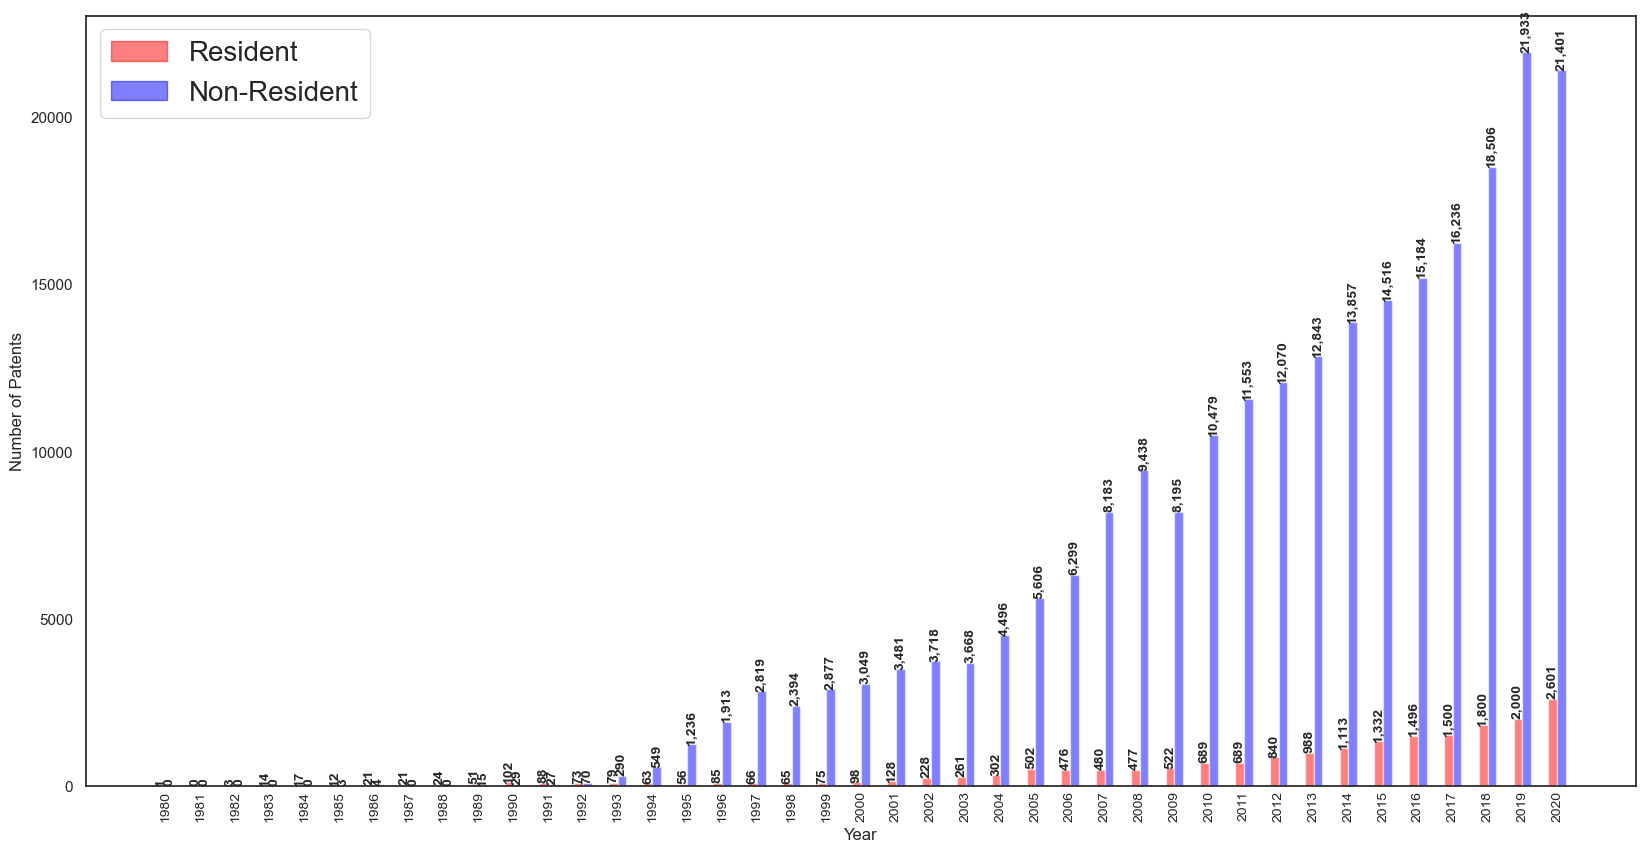

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
temp_list2=[]
for year in temp_years:
    temp_list1.append(np.sum(vnm_patent_df[vnm_patent_df['Năm']==year]['VN']))
    temp_list2.append(np.sum(vnm_patent_df[vnm_patent_df['Năm']==year]['NN']))

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100,format(temp_list1[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90)

bars=ax.bar(temp_years,temp_list2,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100,format(temp_list2[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Resident",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Non-Resident",alpha=0.5)
ax.legend([arr1,arr2],["Resident","Non-Resident"],loc="upper left",fontsize=20)
plt.savefig(output_path+"/Patents of Resident vs. Non-Resident.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_df=pd.DataFrame()
temp_df["year"]=temp_years
temp_df['Resident']=temp_list1
temp_df['Non-Resident']=temp_list2

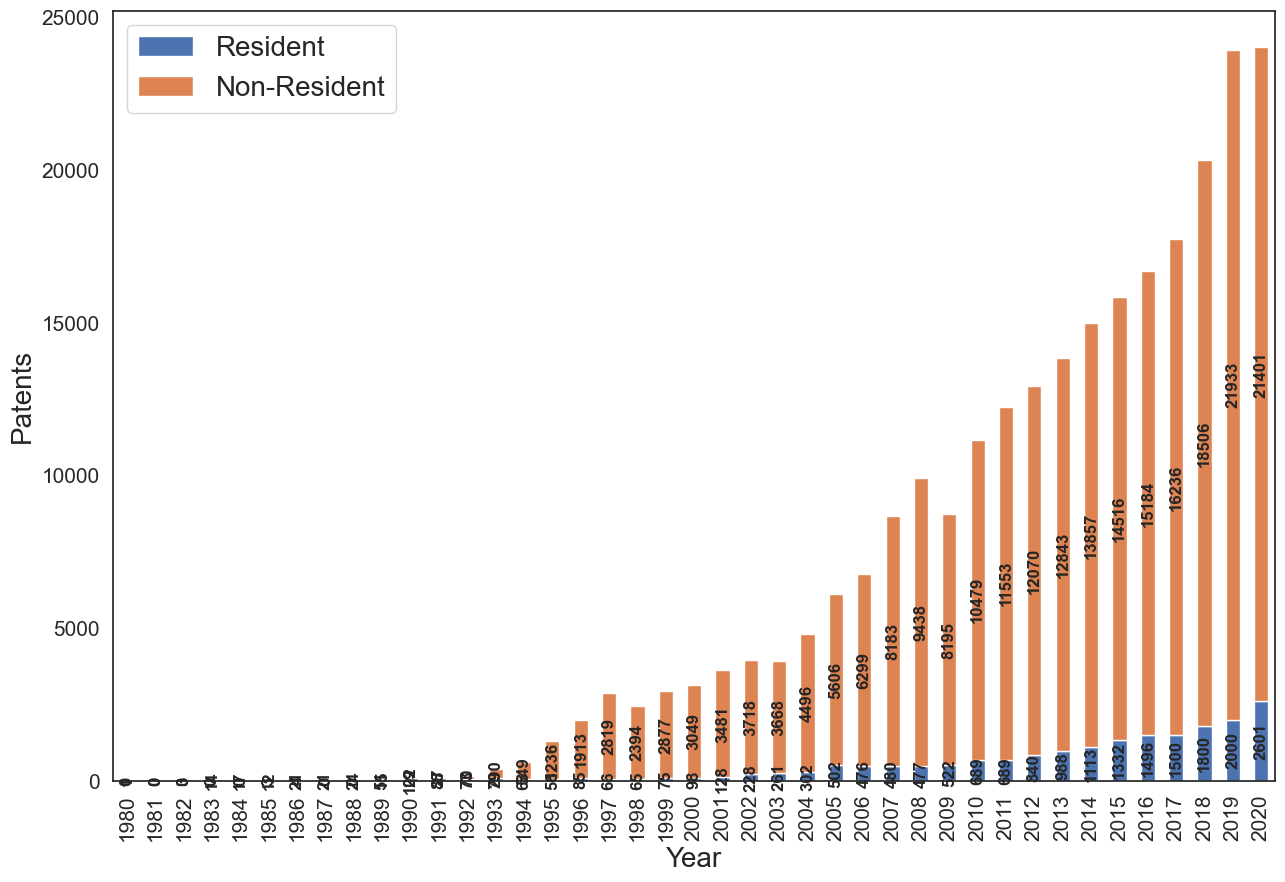

In [ ]:
year = temp_df['year']
data = {
    "Resident":list(temp_df['Resident']),
    "Non-Resident":list(temp_df['Non-Resident'])
}

df = pd.DataFrame(data,index=year)
ax = df.plot(kind="bar",stacked=True,figsize=(15,10),alpha=1)      # stacked

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=[format(item,'.0f') for item in labels], label_type='center',rotation=90,fontweight='bold')
ax.legend(fontsize=20,loc='upper left')
ax.tick_params(axis='x', labelsize=15,rotation=90)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Patents',fontsize=20)
plt.savefig(output_path+"/Patents of Resident vs. Non-Resident_stacked.jpg",dpi=300,transparent=True,bbox_inches="tight")

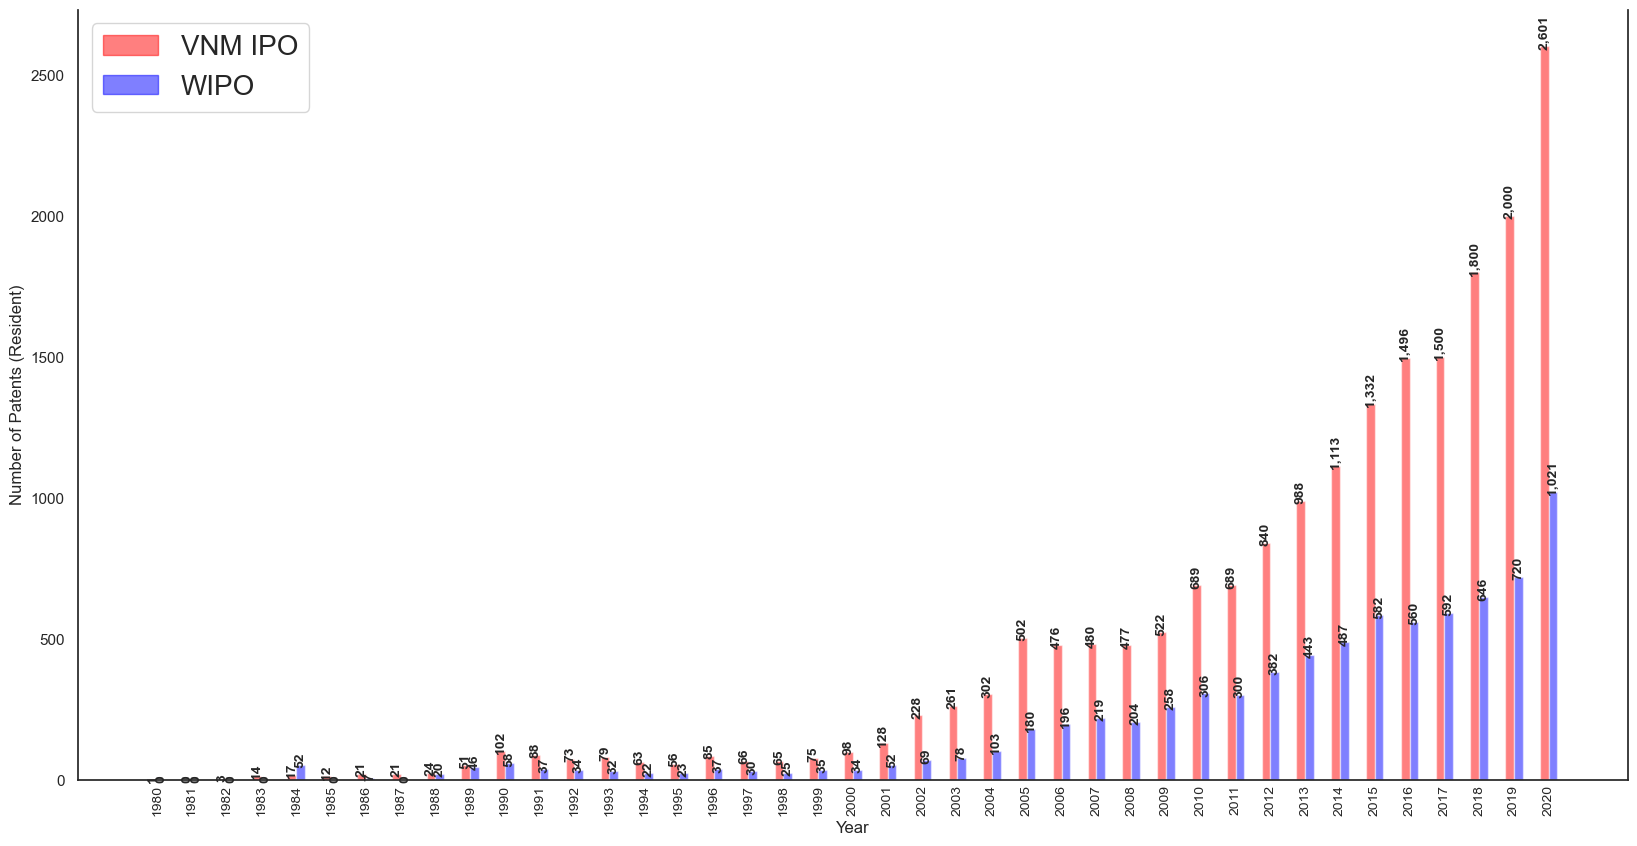

In [ ]:
# https://data.worldbank.org/indicator/IP.PAT.RESD?locations=VN
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
temp_wipo_wb_list=[0,0,0,0,52,0,7,0,20,46,58,37,34,32,22,23,37,30,25,35,34,52,69,78,103,180,196,219,204,258,306,300,382,443,487,582,560,592,646,720,1021]
for year in temp_years:
    temp_list1.append(np.sum(vnm_patent_df[vnm_patent_df['Năm']==year]['VN']))

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height(),format(temp_list1[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90)

bars=ax.bar(temp_years,temp_wipo_wb_list,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height(),format(temp_wipo_wb_list[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents (Resident)")
ax.spines['top'].set_visible(False)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="VNM IPO",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="WIPO",alpha=0.5)
ax.legend([arr1,arr2],["VNM IPO","WIPO"],loc="upper left",fontsize=20)
plt.savefig(output_path+"/Patents of Resident_WIPO vs. Resident_local filling.jpg",dpi=300,transparent=True,bbox_inches="tight")

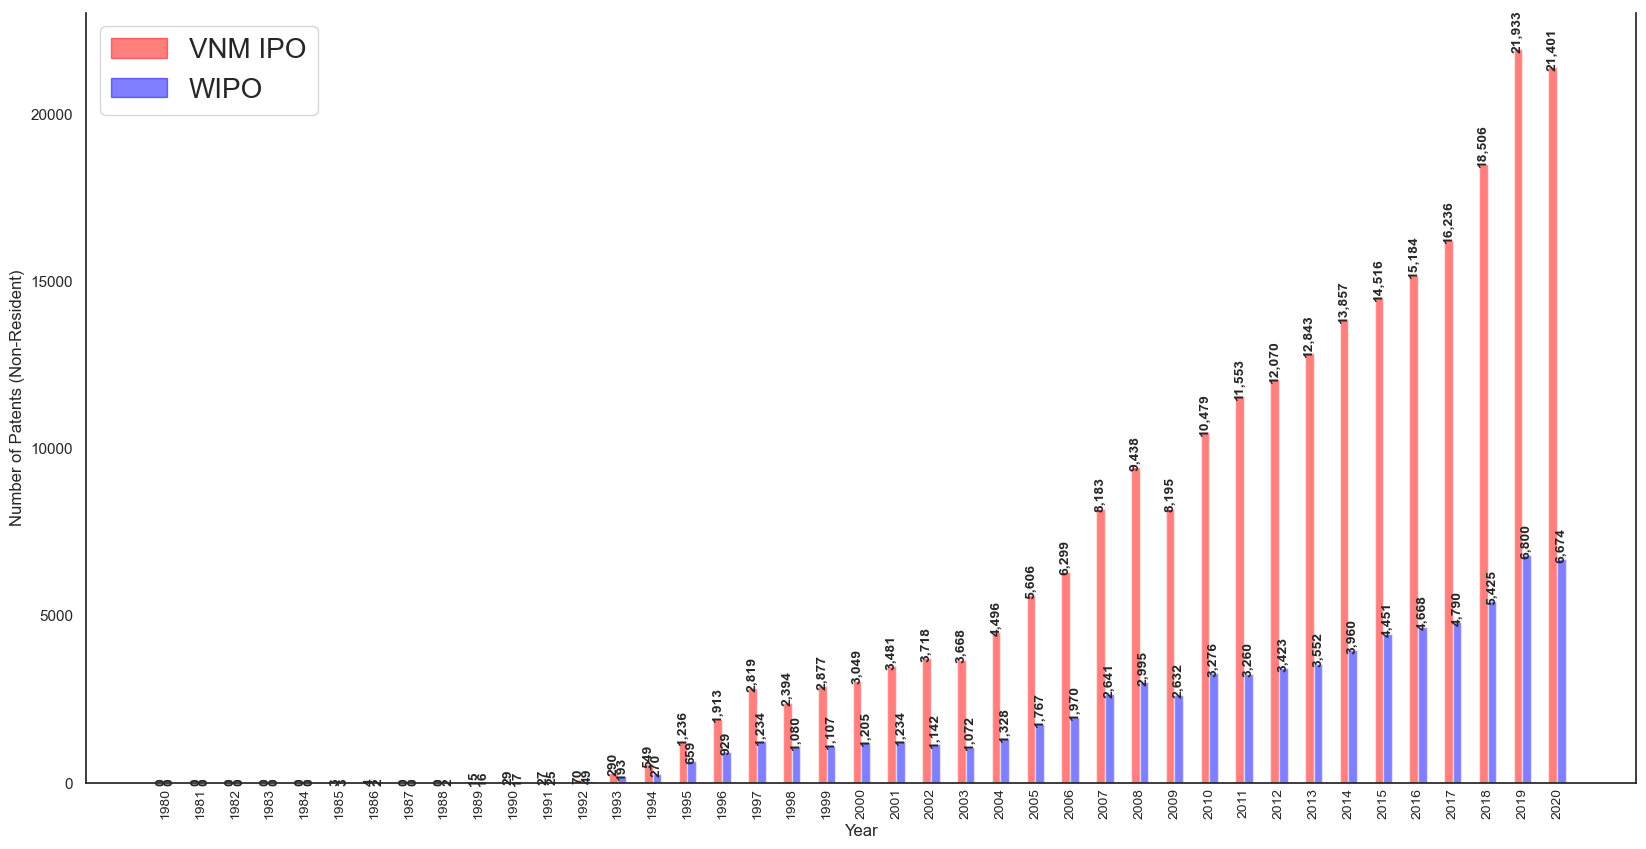

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
temp_wipo_wb_list=[0,0,0,0,0,3,2,0,2,16,17,25,49,193,270,659,929,1234,1080,1107,1205,1234,1142,1072,1328,1767,1970,2641,2995,2632,3276,3260,3423,3552,3960,4451,4668,4790,5425,6800,6674]
for year in temp_years:
    temp_list1.append(np.sum(vnm_patent_df[vnm_patent_df['Năm']==year]['NN']))

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height(),format(temp_list1[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90)

bars=ax.bar(temp_years,temp_wipo_wb_list,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height(),format(temp_wipo_wb_list[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents (Non-Resident)")
ax.spines['top'].set_visible(False)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="VNM IPO",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="WIPO",alpha=0.5)
ax.legend([arr1,arr2],["VNM IPO","WIPO"],loc="upper left",fontsize=20)
plt.savefig(output_path+"/Patents of Non-Resident_WIPO vs. Non-Resident_local filling.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_df=pd.read_excel(r'C:\Users\jdwoo\Desktop\논문\World Bank\(231019) Final_Report\Total patent applications by applicant’s origin.xlsx')
temp_df=temp_df.fillna(0)
temp_df.describe()

year  Vietnamese residing in Vietnam  \
count    42.000000                       42.000000   
mean   2000.500000                      213.238095   
std      12.267844                      281.117267   
min    1980.000000                        0.000000   
25%    1990.250000                       26.250000   
50%    2000.500000                       55.000000   
75%    2010.750000                      304.500000   
max    2021.000000                     1066.000000   

       Vietnamese residing outside Vietnam  
count                            42.000000  
mean                             23.500000  
std                              40.154124  
min                               0.000000  
25%                               0.000000  
50%                               0.500000  
75%                              21.250000  
max                             139.000000

In [ ]:
temp_df['Vietnamese residing outside Vietnam']=temp_df['Vietnamese residing outside Vietnam'].astype(int)

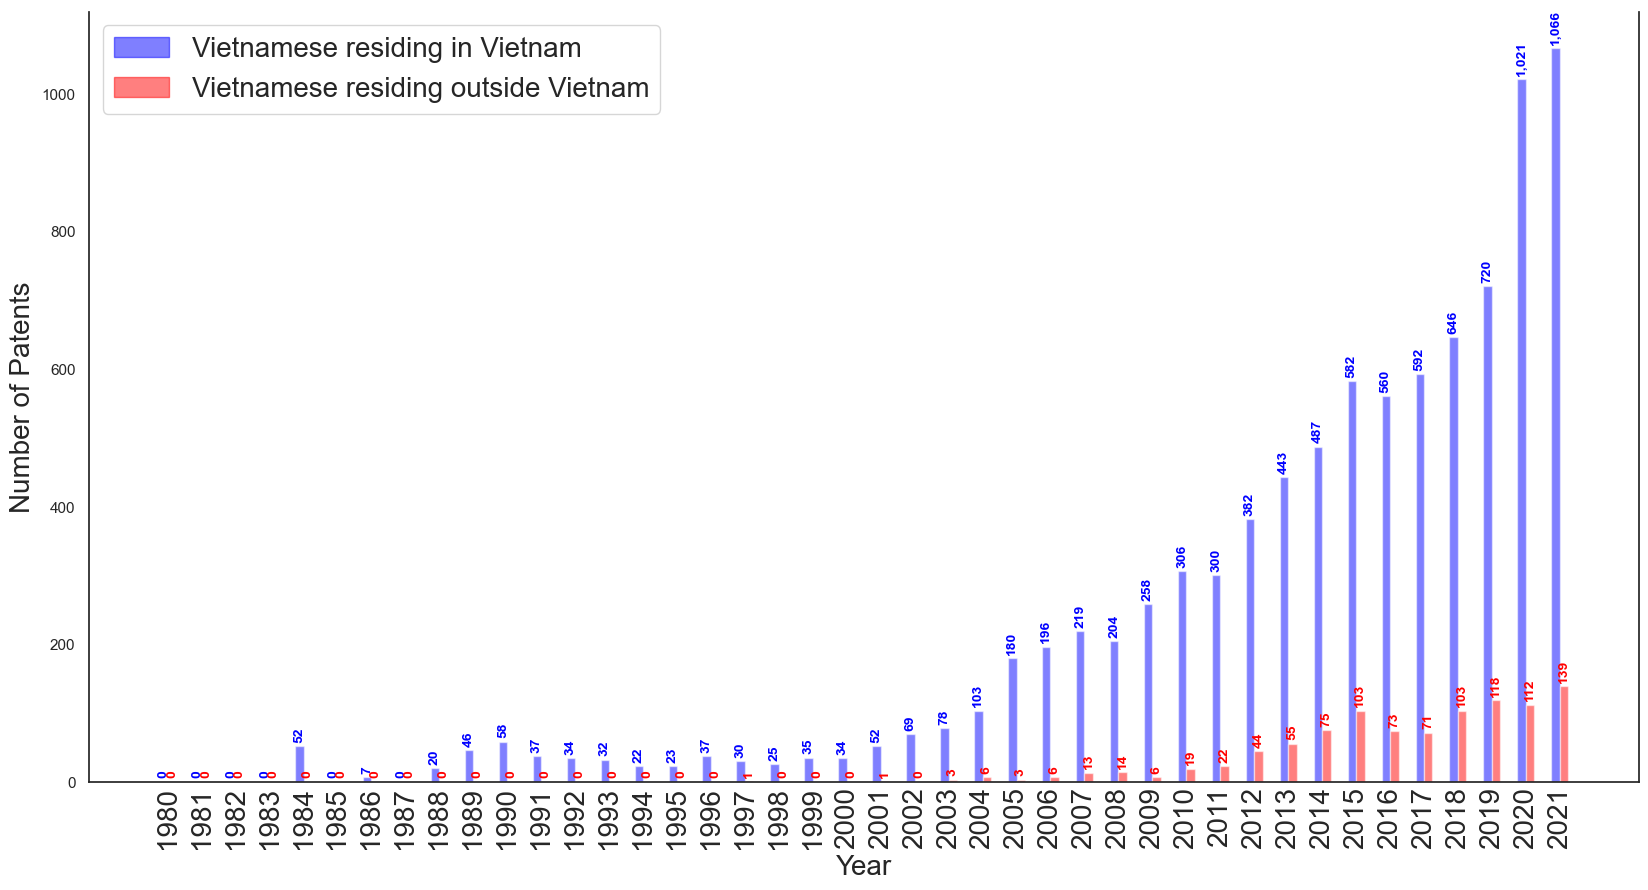

In [ ]:
# Total patent applications by applicant’s origin

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=temp_df['Vietnamese residing in Vietnam']
temp_list2=temp_df['Vietnamese residing outside Vietnam']

bars=ax.bar(temp_df['year']
,temp_list1,color='blue',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+10,format(temp_list1[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90,color='blue')

bars=ax.bar(temp_df['year'],temp_list2,color='red',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+10,format(temp_list2[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90,color='red')

ax.set_xticks(temp_df['year'])
ax.set_xticklabels(temp_df['year'],rotation=90)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of Patents",fontsize=20)
ax.spines['top'].set_visible(False)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Resident",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Non-Resident",alpha=0.5)
ax.legend([arr1,arr2],["Vietnamese residing in Vietnam","Vietnamese residing outside Vietnam"],loc="upper left",fontsize=20)
plt.savefig(output_path+"/Total patent applications by applicant’s origin.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_df.columns

Index(['year', 'Vietnamese residing in Vietnam',
       'Vietnamese residing outside Vietnam'],
      dtype='object')

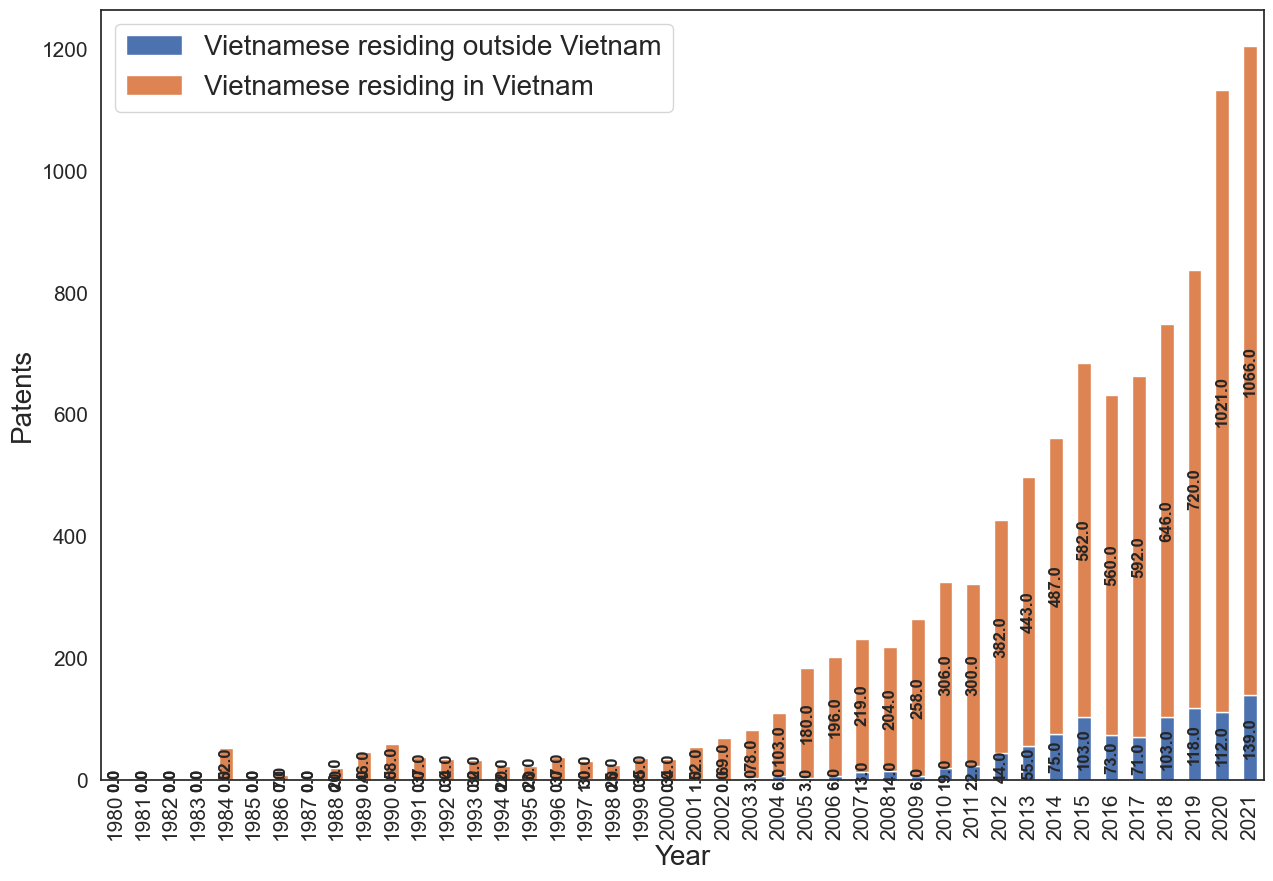

In [ ]:
year = temp_df['year']
data = {
    "Vietnamese residing outside Vietnam":list(temp_df['Vietnamese residing outside Vietnam']),
    "Vietnamese residing in Vietnam":list(temp_df['Vietnamese residing in Vietnam'])
}

df = pd.DataFrame(data,index=year)
ax = df.plot(kind="bar",stacked=True,figsize=(15,10),alpha=1)      # stacked

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=[format(item,'.1f') for item in labels], label_type='center',rotation=90,fontweight='bold')
ax.legend(fontsize=20,loc='upper left')
ax.tick_params(axis='x', labelsize=15,rotation=90)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Patents',fontsize=20)
plt.savefig(output_path+"/Total patent applications by applicant’s origin_stacked.jpg",dpi=300,transparent=True,bbox_inches="tight")

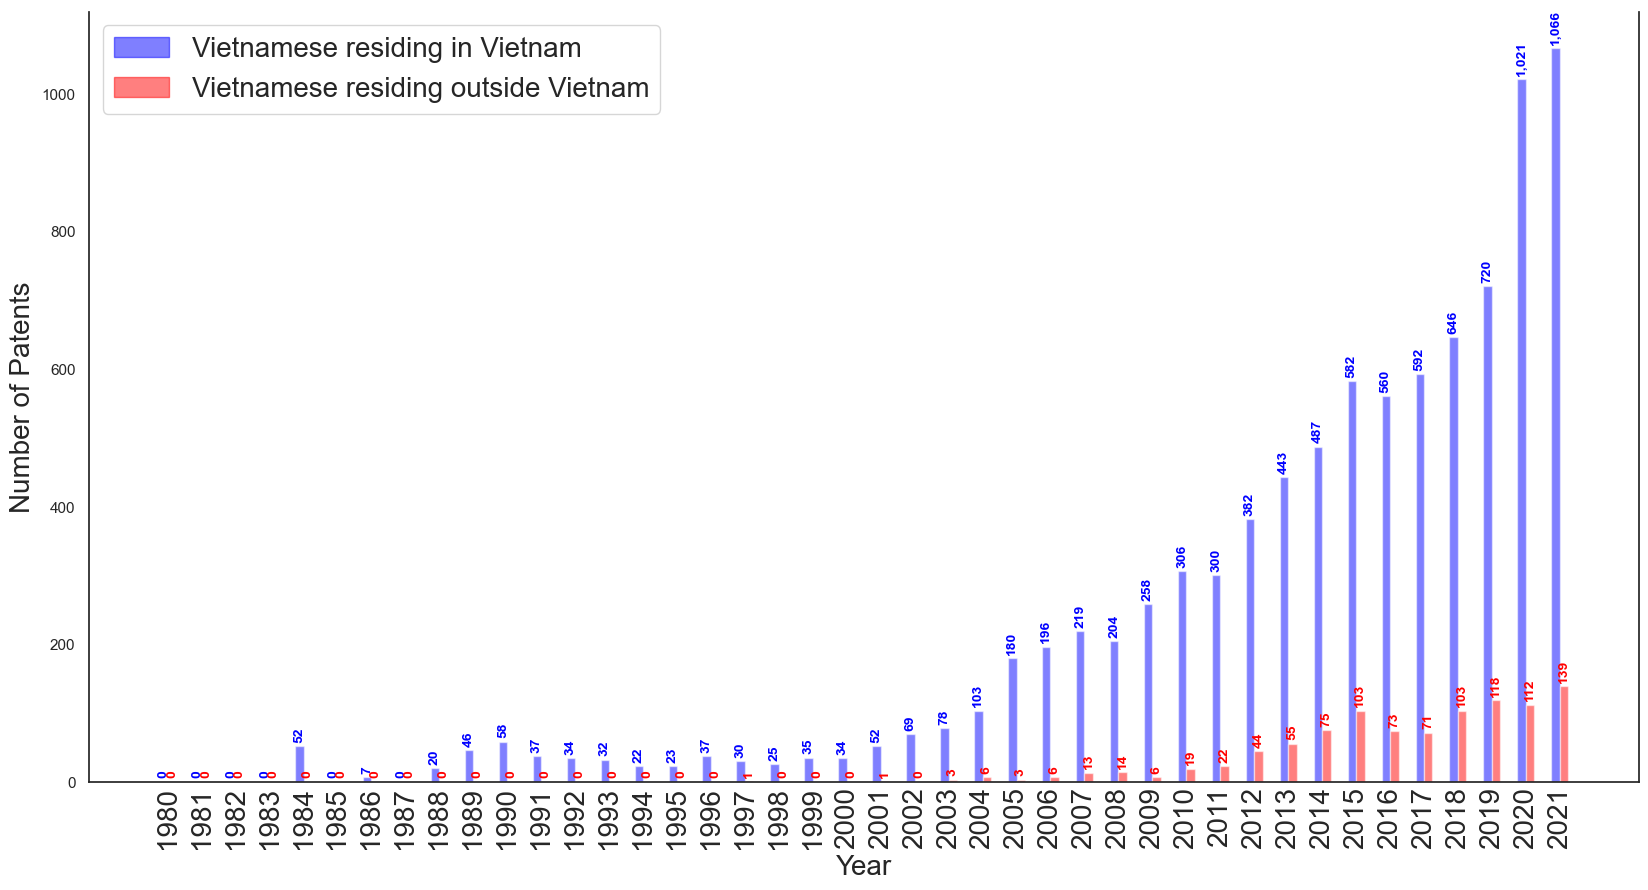

In [ ]:
# Total patent applications by applicant’s origin
# Stacked

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=temp_df['Vietnamese residing in Vietnam']
temp_list2=temp_df['Vietnamese residing outside Vietnam']

bars=ax.bar(temp_df['year']
,temp_list1,color='blue',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+10,format(temp_list1[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90,color='blue')

bars=ax.bar(temp_df['year'],temp_list2,color='red',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+10,format(temp_list2[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90,color='red')

ax.set_xticks(temp_df['year'])
ax.set_xticklabels(temp_df['year'],rotation=90)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of Patents",fontsize=20)
ax.spines['top'].set_visible(False)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Resident",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Non-Resident",alpha=0.5)
ax.legend([arr1,arr2],["Vietnamese residing in Vietnam","Vietnamese residing outside Vietnam"],loc="upper left",fontsize=20)
plt.savefig(output_path+"/Total patent applications by applicant’s origin_stacked.jpg",dpi=300,transparent=True,bbox_inches="tight")

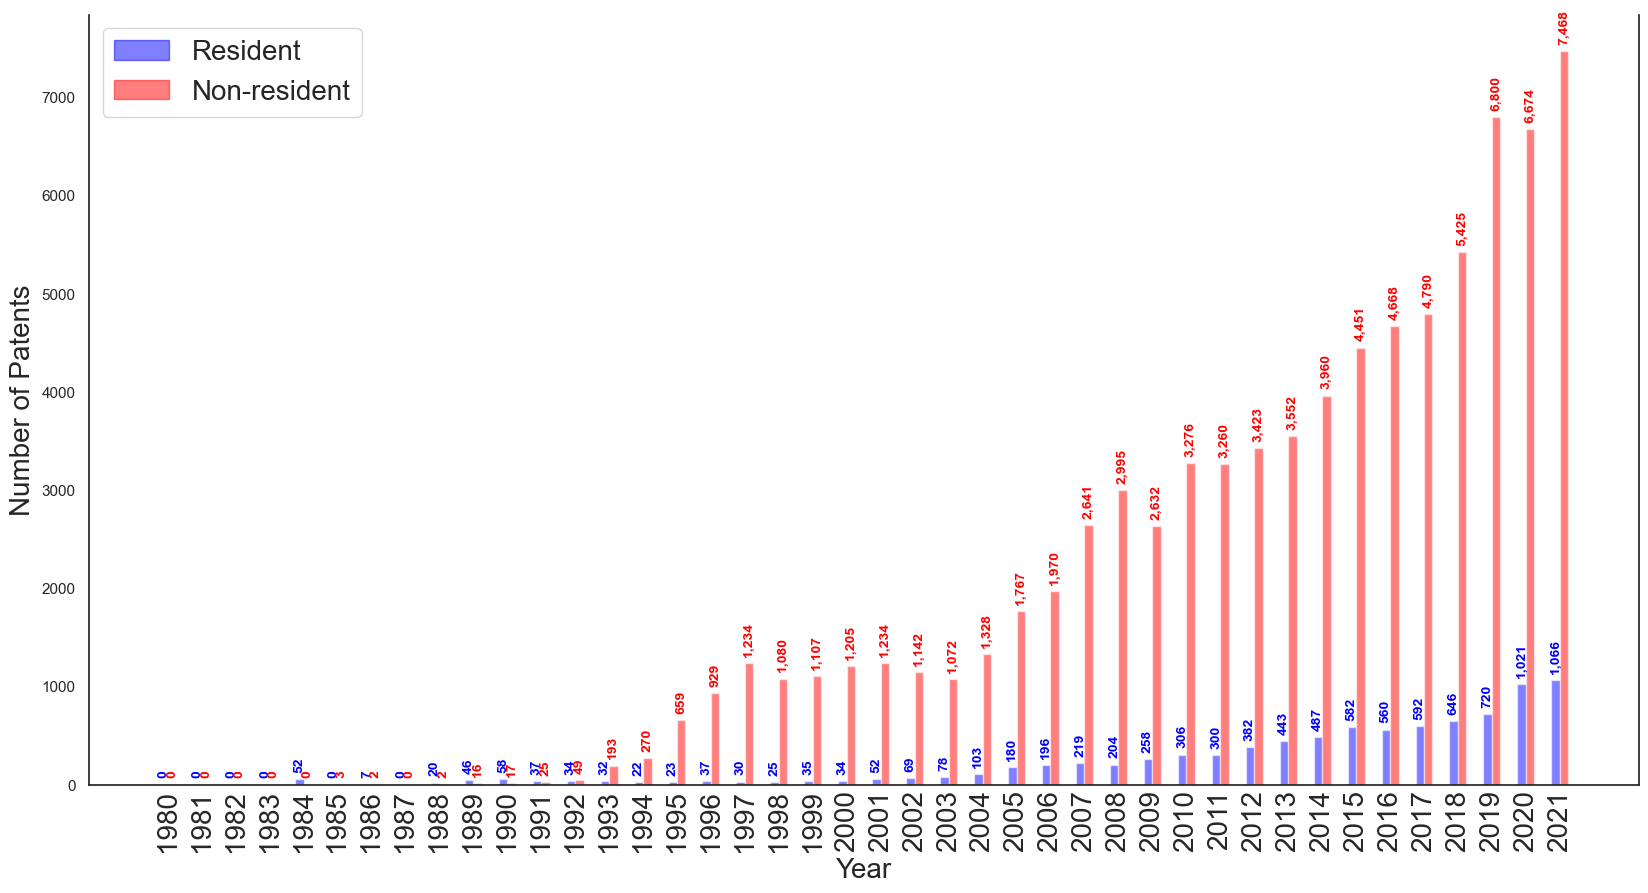

In [ ]:
# Patents filed in Vietnam IP office by resident and non-resident

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_df=pd.read_excel(r'C:\Users\jdwoo\Desktop\논문\World Bank\(231019) Final_Report\Patents filed in Vietnam IP office by resident and non-resident.xlsx')

temp_list1=temp_df['Resident']
temp_list2=temp_df['Non-resident']

bars=ax.bar(temp_df['year']
,temp_list1,color='blue',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100,format(temp_list1[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90,color='blue')

bars=ax.bar(temp_df['year'],temp_list2,color='red',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+100,format(temp_list2[i],",d"),ha='center',fontsize=10,fontweight="bold",rotation=90,color='red')

ax.set_xticks(temp_df['year'])
ax.set_xticklabels(temp_df['year'],rotation=90)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of Patents",fontsize=20)
ax.spines['top'].set_visible(False)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Resident",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Non-Resident",alpha=0.5)
ax.legend([arr1,arr2],["Resident","Non-resident"],loc="upper left",fontsize=20)
plt.savefig(output_path+"/Patents filed in Vietnam IP office by resident and non-resident.jpg",dpi=300,transparent=True,bbox_inches="tight")

## USPTO patent

In [ ]:
#vnm_patent_df=pd.read_excel(input+r'\Vietnam_patent.xlsx',sheet_name="CNTT")
vnm_patent_df=pd.read_csv(r'C:\Users\jdwoo\Desktop\Python\National Diversification\Data\temp_vnm_ipc_df.csv')
vnm_patent_df.index=vnm_patent_df['Unnamed: 0']
vnm_patent_df=vnm_patent_df[list(vnm_patent_df.columns)[1:]]
vnm_patent_df.head()

A01G  A01J  A01K  A01N  A21B  A21D  A23F  A23J  A23L  A23N  ...  \
Unnamed: 0                                                              ...   
1995         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1997         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1998         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1999         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2000         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

            H03L  H03M  H04B  H04J  H04L  H04M  H04N  H04W  H05B  H05K  
Unnamed: 0                                                              
1995         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1997         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1998         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1999         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2000         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 217 columns]

In [ ]:
temp_years=[year for year in range(1995,2021)]

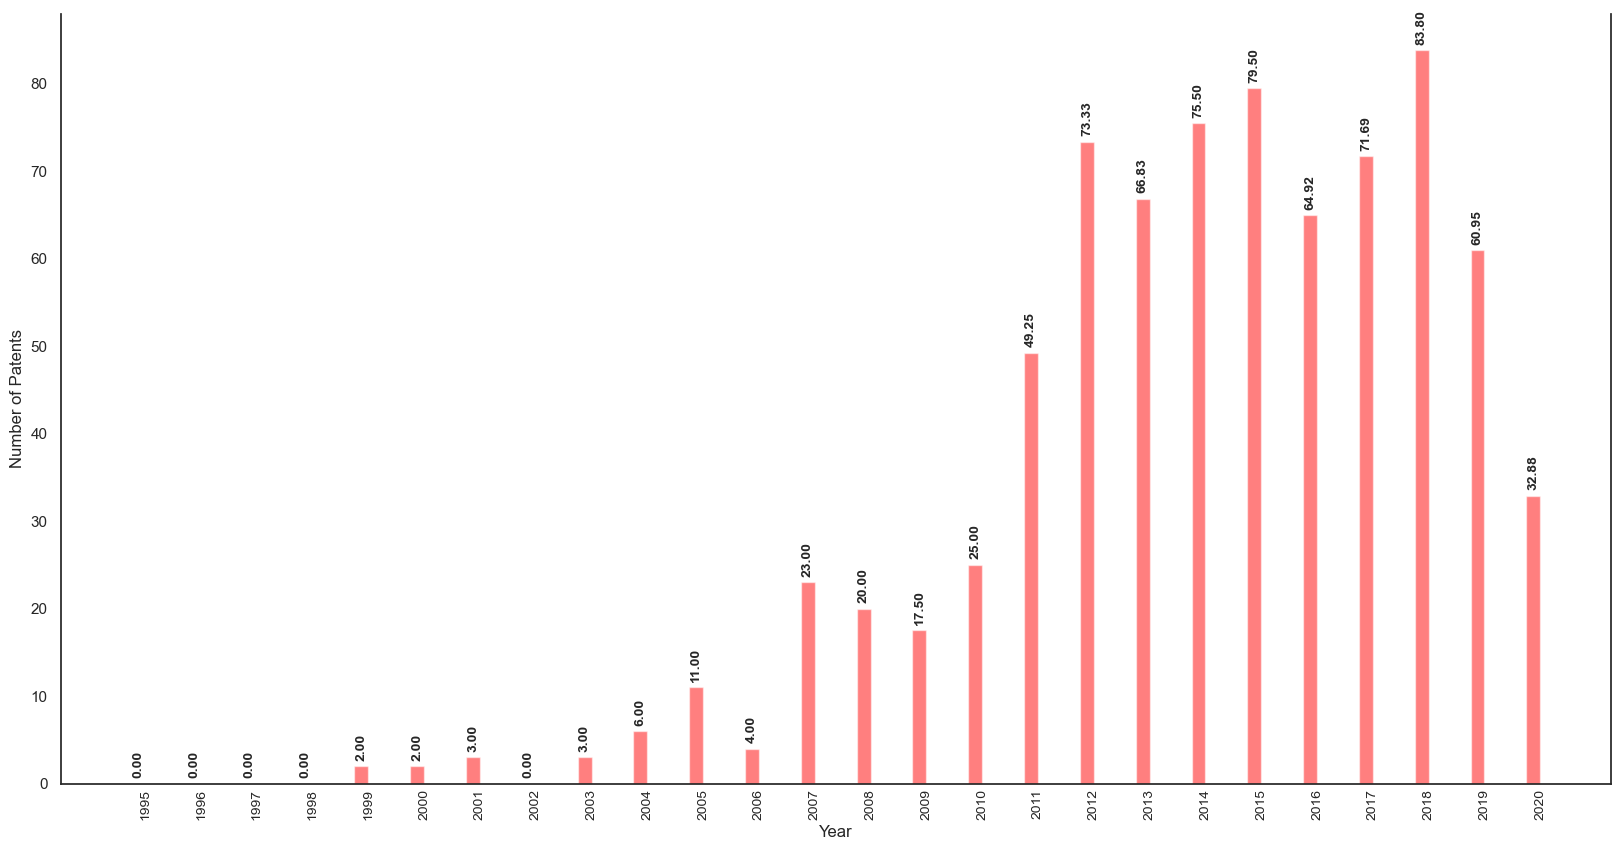

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
for year in temp_years:
    try:
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Resident",alpha=0.5)
#arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Non-Resident",alpha=0.5)
#ax.legend([arr1,arr2],["Resident","Non-Resident"],loc="upper left",fontsize=20)
ax.spines['top'].set_visible(False)
plt.savefig(output_path+"/Patents of VNM.jpg",dpi=300,transparent=True,bbox_inches="tight")

# Product & Patent 데이터 전처리 시작

In [ ]:
year_list=[year for year in range(1960,2019)]

patent_df=pd.read_csv(r'C:\Users\jdwoo\Desktop\Python\National Diversification\Data\PATS_IPC-en (2).csv')
ipc_list=[x for x in list(set(patent_df["IPC"])) if len(x)==4]
patent_df=patent_df[patent_df["KINDDATE"]=='GRANT']
patent_df=patent_df[patent_df["TIME"].isin(year_list)]
patent_df=patent_df[patent_df["IPC"].isin(ipc_list)]
patent_df=patent_df[patent_df["KINDPATENT"]=='USPTO_G']
patent_df=patent_df[patent_df['KINDCOUNTRY']=='INVENTORS']
patent_df.reset_index(inplace=True,drop=True)
patent_df.head()

In [ ]:
temp_years=[year for year in range(2000,2019)]

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_years=[year for year in range(2000,2019)]
temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_ylim(0,4000)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")
plt.savefig(output_path+"/Patents of VNM.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_years=[year for year in range(2000,2019)]
temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_df=patent_df[patent_df['LOCATION']=='KOR']
      temp_df=temp_df[temp_df['TIME']==year-20]
      temp_list1.append(np.sum(temp_df['Value']))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels([str(temp_year)+'(VNM)\n'+str(temp_year-20)+'(KOR)' for temp_year in temp_years],rotation=90)
ax.set_ylim(0,4000)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Patents of Vietnam",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Patents of Korea",alpha=0.5)
ax.legend([arr1,arr2],["Patents of Vietnam","Patents of Korea"],loc="upper left",fontsize=20)
ax.spines['top'].set_visible(False)
plt.savefig(output_path+"/Patents of KOR vs. VNM.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_years=[year for year in range(2000,2019)]
temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+2,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_df=patent_df[patent_df['LOCATION']=='KOR']
      temp_df=temp_df[temp_df['TIME']==year-20]
      temp_list1.append(np.sum(temp_df['Value']))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+2,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels([])
#ax.set_xticklabels([str(temp_year)+'(VNM)\n'+str(temp_year-20)+'(KOR)' for temp_year in temp_years],rotation=90)
ax.set_ylim(0,4000)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Patents of Vietnam",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Patents of Korea",alpha=0.5)
ax.legend([arr1,arr2],["Patents of Vietnam","Patents of Korea"],loc="upper left",fontsize=20)
ax.spines['top'].set_visible(False)
plt.savefig(output_path+"/Patents of KOR vs. VNM_no legend.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_years=[year for year in range(1980,2019)]

temp_list1=[]
for year in temp_years:
    try:
      temp_df=patent_df[patent_df['LOCATION']=='KOR']
      temp_df=temp_df[temp_df['TIME']==year]
      temp_list1.append(np.sum(temp_df['Value']))
    except:
      temp_list1.append(0)

ax.plot(temp_years,temp_list1,color='red',alpha=1)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
#for i in range(len(temp_list1)):
#   ax.text(temp_years[i],temp_list1[i],format(temp_list1[i],".2f"),rotation=90)
ax.spines['top'].set_visible(False)

temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
    except:
      temp_list1.append(0)

ax.plot(temp_years,temp_list1,color='blue',alpha=1)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=20
)
ax.tick_params(
    axis="y",width=1,direction="in",labelsize=20
)
#for i in range(len(temp_list1)):
#   ax.text(temp_years[i],temp_list1[i],format(temp_list1[i],".2f"),rotation=90)
#ax.spines['top'].set_visible(False)

ax.set_ylim(0,1000)

ax.axhline(y=temp_list1[-1],linestyle='dotted',linewidth=3,color='black')
ax.axvline(x=1987,linestyle='dotted',linewidth=3,color='black')

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,fontsize=15,rotation=90)

ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of Patents",fontsize=20)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Patents of Korea",alpha=1)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Patents of Vietnam",alpha=1)
ax.legend([arr1,arr2],["Patents of Korea","Patents of Vietnam"],loc="upper right",fontsize=20)
plt.savefig(output_path+"/Patents of KOR vs. VNM.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_df=patent_df[patent_df['LOCATION']=='KOR']
      temp_df=temp_df[temp_df['TIME']==year-20]
      temp_list1.append(np.sum(temp_df['Value']))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+2,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels([])
#ax.set_xticklabels([str(temp_year)+'(VNM)\n'+str(temp_year-20)+'(KOR)' for temp_year in temp_years],rotation=90)
ax.set_ylim(0,4000)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Patents of Vietnam",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Patents of Korea",alpha=0.5)
ax.legend([arr1,arr2],["Patents of Vietnam","Patents of Korea"],loc="upper left",fontsize=20)

In [ ]:
temp_years=[year for year in range(2000,2019)]

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
for year in temp_years:
    try:
      #temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_ylim(0,100)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

In [ ]:
sitc_df=pd.read_csv(input+r'\country_sitcproduct4digit_year.csv')
sitc_df['sitc_product_code']=sitc_df['sitc_product_code'].astype(str)
sitc_df=sitc_df[sitc_df["year"].isin(year_list)]
sitc_df.head()

In [ ]:
location_codes=list(set(sitc_df['location_code']))
temp_countries=list(set(patent_df["LOCATION"]))
location_codes=[country for country in location_codes if country in temp_countries]
len(location_codes)

In [ ]:
location_codes+=["VNM"]

In [ ]:
patent_df=patent_df[patent_df["LOCATION"].isin(location_codes)]
patent_df=patent_df[['LOCATION',"IPC","TIME",'Value']]
patent_df.reset_index(inplace=True,drop=True)
patent_df.head()

In [ ]:
patent_df.TIME.unique()

In [ ]:
vnm_patent_df.head()

In [ ]:
temp_add_df=pd.DataFrame()
temp_list1=[]
temp_list2=[]
temp_list3=[]
temp_list4=[]

for temp_ipc in ipc_list:
    for year in sorted(list(set(patent_df.TIME))):

        temp_list1.append("VNM")
        temp_list2.append(temp_ipc)
        temp_list3.append(year)
        try:
            temp_list4.append(vnm_patent_df.loc[year,temp_ipc])
        except:
            temp_list4.append(0)

In [ ]:
patent_df.head(1)

In [ ]:
temp_add_df['LOCATION']=temp_list1
temp_add_df['IPC']=temp_list2
temp_add_df['TIME']=temp_list3
temp_add_df['Value']=temp_list4
temp_add_df.head()

In [ ]:
len(patent_df), len(temp_add_df)

In [ ]:
patent_df=pd.concat([patent_df,temp_add_df])
patent_df.reset_index(inplace=True,drop=True)

# Product Space & Metric

In [ ]:
# sitc_product_code 부분을 string으로 11을 0011같은걸로 표현하기 위해서
sitc_df['sitc_product_code']=sitc_df['sitc_product_code'].astype(str)
sitc_df['sitc_product_code']=sitc_df['sitc_product_code'].apply(lambda item:str(item).zfill(4))

# 숫자 코드이외의 코드들 삭제 (error_list)
error_list=[]
for item in list(set(sitc_df['sitc_product_code'])):
    try:
        int(item)
    except:
        error_list.append(item)
error_list

# error_list를 포함하는 행들 다 삭제, 인덱스 리셋
sitc_df=sitc_df.drop(sitc_df[sitc_df["sitc_product_code"].isin(error_list)].index)
sitc_df.reset_index(inplace=True,drop=True)

import numpy as np
# sitc_df에 country_export, product_export, world_export열 추가
sitc_df["country_export"]=sitc_df[["year","location_code","export_value"]].groupby(by=["year",'location_code']).transform(np.sum)
sitc_df["product_export"]=sitc_df[["year","sitc_product_code","export_value"]].groupby(by=["year",'sitc_product_code']).transform(np.sum)
sitc_df["world_export"]=sitc_df[["year","export_value"]].groupby(by=["year"]).transform(np.sum)

# sitc_df에 rca열 추가
sitc_df["rca"] = (sitc_df["export_value"] / sitc_df["country_export"]) / (sitc_df["product_export"] / sitc_df["world_export"])

In [ ]:
sitc_codes=list(set(sitc_df['sitc_product_code']))
len(sitc_codes)

In [ ]:
country_list=[]

for country_name in tqdm(location_codes):
    for year in year_list:
        country_list.append(COUNTRY(country_name,year))
        temp_df=sitc_df[(sitc_df['location_code']==country_name) & (sitc_df['year']==year)]
        country_list[-1].export_dict=dict(zip(temp_df['sitc_product_code'],temp_df['export_value']))
        for item in list(set(sitc_codes).difference(set(country_list[-1].export_dict.keys()))):
            country_list[-1].export_dict[item]=0

        country_list[-1].rca_dict=dict(zip(temp_df['sitc_product_code'],temp_df['rca']))
        for item in list(set(sitc_codes).difference(set(country_list[-1].rca_dict.keys()))):
            country_list[-1].rca_dict[item]=0

In [ ]:
def proximity(input_code_i, input_code_j,temp_countries):
    # input_code_1, input_code_2: proximity를 계산할 SITC 코드들입니다
    # temp_countries = 특정 연도의 국가 객체들입니다

    # Assignment 3-1: 아래 4개를 만들어서 rca값을 return 하시면 됩니다
    RCA_x_i=[country for country in temp_countries if country.rca_dict[input_code_i]>1]# temp_countries들 중 rca_dict[input_code_i]>1인 국가들
    RCA_x_i_and_RCA_x_j=[country for country in RCA_x_i if country.rca_dict[input_code_j]>1] # RCA_x_i에 있는 국가들 중 rca[input_code_j]>1인 국가들
    RCA_x_j=[country for country in temp_countries if country.rca_dict[input_code_j]>1] # temp_countries들 중 rca_dict[input_code_j]>1인 국가들
    RCA_x_j_and_RCA_x_i=[country for country in RCA_x_j if country.rca_dict[input_code_i]>1] # RCA_x_j에 있는 국가들 중 rca_dict[input_code_i]>1인 국가들

    try:
        temp_proximity = min(len(RCA_x_i_and_RCA_x_j)/len(RCA_x_i),len(RCA_x_j_and_RCA_x_i)/len(RCA_x_j))

    except: # 옛날에는 모든 국가들이 sitc code i, j를 생산 안하고 있었을 떄가 있음, 이 문제로 발생하는 에러는 None으로 처리
        temp_proximity = None

    return temp_proximity

In [ ]:
Product_PM_list=[]

for year in tqdm(year_list):
    temp_countries=[country for country in country_list if country.year==year]

    # temp_sitcs는 sitc코드값
    temp_sitcs=[]
    for country in temp_countries:
        temp_sitcs+=country.export_dict.keys()
    temp_sitcs=sorted(list(set(temp_sitcs)))

    # temp_proximity_matrix를 0 행렬로 구축
    temp_proximity_matrix=np.zeros(shape=(len(temp_sitcs),len(temp_sitcs)))

    for i in (range(len(temp_sitcs))):
        for j in range(len(temp_sitcs)):
            temp_proximity_matrix[i][j]=proximity(temp_sitcs[i], temp_sitcs[j],temp_countries)
    temp_df=pd.DataFrame(temp_proximity_matrix,index=temp_sitcs,columns=temp_sitcs)

    Product_PM_list.append(Proximity_Matrix(year))
    Product_PM_list[-1].df=temp_df
    Product_PM_list[-1].codes=sorted(list(temp_df.index))

In [ ]:
for item in Product_PM_list:
  temp_name="Product_PM_"+str(item.year)
  with open(class_directory+f'/Product_PM/%s'%(temp_name), 'wb') as file:
    pickle.dump(item, file)

In [ ]:
# M 매트릭스
Product_M_list=[]
for year in tqdm(year_list):
    temp_Product_PM=[item for item in Product_PM_list if item.year==year][0]
    temp_countries=[country for country in country_list if country.year==year]
    temp_countries=sorted(temp_countries,key=lambda item:item.name)
    M=np.zeros(shape=(len(temp_countries),len(temp_Product_PM.df.index)))
    for i in range(len(temp_countries)):
        for j in range(len(list(temp_Product_PM.df.index))):
            if temp_countries[i].rca_dict[list(temp_Product_PM.df.index)[j]]>1:
                M[i][j]=1
    M=pd.DataFrame(M,index=[country.name for country in temp_countries],columns=list(temp_Product_PM.df.index))
    Product_M_list.append(M)

In [ ]:
for year in tqdm(year_list):
    temp_Product_PM=[item for item in Product_PM_list if item.year==year][0]
    temp_Product_PM_df=temp_Product_PM.df
    temp_Product_PM_df=temp_Product_PM_df.fillna(0)

    for i in temp_Product_PM_df.index:
        temp_Product_PM_df.loc[i][i]=0

    M=Product_M_list[year_list.index(year)]
    temp_countries=[country for country in country_list if country.year==year]

    for temp_country in temp_countries:
        temp_country.production_density_dict={}
        for temp_sitc in temp_country.rca_dict.keys():
            if np.sum(temp_Product_PM_df.loc[temp_sitc])==0:
                temp_country.production_density_dict[temp_sitc]=0
            else:
                temp_country.production_density_dict[temp_sitc]=np.sum(M.loc[temp_country.name]*temp_Product_PM_df.loc[temp_sitc])/np.sum(temp_Product_PM_df.loc[temp_sitc])

In [ ]:
# Density Plot Test

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_xs=[temp_country.rca_dict[sitc] for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]
temp_ys=[temp_country.production_density_dict[sitc] for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]
ax.scatter(temp_xs,temp_ys,color='red',label='RCA>1')

temp_xs=[temp_country.rca_dict[sitc] for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]<=1]
temp_ys=[temp_country.production_density_dict[sitc] for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]<=1]
ax.scatter(temp_xs,temp_ys,color='blue',label='RCA<=1')

ax.legend()
ax.set_xlabel("RCA")
ax.set_ylabel("Production Density")

# Technology Space & Metric

In [ ]:
import numpy as np
# patent_df에 country_IPC, product_IPC, world_IPC열 추가
patent_df["country_IPC"]=patent_df[["TIME","LOCATION","Value"]].groupby(by=["TIME",'LOCATION']).transform(np.sum)
patent_df["product_IPC"]=patent_df[["TIME","IPC","Value"]].groupby(by=["TIME",'IPC']).transform(np.sum)
patent_df["world_IPC"]=patent_df[["TIME","Value"]].groupby(by=["TIME"]).transform(np.sum)
patent_df["rta"] = (patent_df["Value"] / patent_df["country_IPC"]) / (patent_df["product_IPC"] / patent_df["world_IPC"])

In [ ]:
ipc_codes=list(set(patent_df['IPC']))
len(ipc_codes)

In [ ]:
for temp_country in tqdm(country_list):
    country_name=temp_country.name
    year=temp_country.year
    temp_df=patent_df[(patent_df['LOCATION']==country_name) & (patent_df['TIME']==year)]

    temp_country.ipc_dict={}
    temp_country.ipc_dict=dict(zip(temp_df['IPC'],temp_df['Value']))
    for item in list(set(ipc_codes).difference(set(temp_country.ipc_dict.keys()))):
        temp_country.ipc_dict[item]=0

    temp_country.rta_dict=dict(zip(temp_df['IPC'],temp_df['rta']))
    for item in list(set(ipc_codes).difference(set(temp_country.rta_dict.keys()))):
        temp_country.rta_dict[item]=0

In [ ]:
def tech_proximity(input_code_i, input_code_j,temp_countries):
    rta_x_i=[country for country in temp_countries if country.rta_dict[input_code_i]>1]
    rta_x_i_and_rta_x_j=[country for country in rta_x_i if country.rta_dict[input_code_j]>1]
    rta_x_j=[country for country in temp_countries if country.rta_dict[input_code_j]>1]
    rta_x_j_and_rta_x_i=[country for country in rta_x_j if country.rta_dict[input_code_i]>1]

    try:
        temp_proximity = min(len(rta_x_i_and_rta_x_j)/len(rta_x_i),len(rta_x_j_and_rta_x_i)/len(rta_x_j))
    except:
        temp_proximity = None

    return temp_proximity

In [ ]:
Technology_PM_list=[]

for year in tqdm(year_list):
    temp_countries=[country for country in country_list if country.year==year]

    temp_ipcs=[]
    for country in temp_countries:
        temp_ipcs+=country.ipc_dict.keys()
    temp_ipcs=sorted(list(set(temp_ipcs)))

    # temp_proximity_matrix를 0 행렬로 구축
    temp_proximity_matrix=np.zeros(shape=(len(temp_ipcs),len(temp_ipcs)))

    for i in (range(len(temp_ipcs))):
        for j in range(len(temp_ipcs)):
            temp_proximity_matrix[i][j]=tech_proximity(temp_ipcs[i], temp_ipcs[j],temp_countries)
    temp_df=pd.DataFrame(temp_proximity_matrix,index=temp_ipcs,columns=temp_ipcs)

    Technology_PM_list.append(Proximity_Matrix(year))
    Technology_PM_list[-1].df=temp_df
    Technology_PM_list[-1].codes=sorted(list(temp_df.index))

In [ ]:
for item in Technology_PM_list:
    temp_name="Technology_PM_"+str(item.year)
    with open(class_directory+f'/Technology_PM/%s'%(temp_name), 'wb') as file:
        pickle.dump(item, file)

In [ ]:
# M 매트릭스
Technology_M_list=[]
for year in tqdm(year_list):
    temp_Technology_PM=[item for item in Technology_PM_list if item.year==year][0]
    temp_countries=[country for country in country_list if country.year==year]
    temp_countries=sorted(temp_countries,key=lambda item:item.name)
    M=np.zeros(shape=(len(temp_countries),len(temp_Technology_PM.df.index)))
    for i in range(len(temp_countries)):
        for j in range(len(list(temp_Technology_PM.df.index))):
            if temp_countries[i].rta_dict[list(temp_Technology_PM.df.index)[j]]>1:
                M[i][j]=1
    M=pd.DataFrame(M,index=[country.name for country in temp_countries],columns=list(temp_Technology_PM.df.index))
    Technology_M_list.append(M)

In [ ]:
for year in tqdm(year_list):
    temp_Technology_PM=[item for item in Technology_PM_list if item.year==year][0]
    temp_Technology_PM_df=temp_Technology_PM.df
    temp_Technology_PM_df=temp_Technology_PM_df.fillna(0)

    for i in temp_Technology_PM_df.index:
        temp_Technology_PM_df.loc[i][i]=0

    M=Technology_M_list[year_list.index(year)]
    temp_countries=[country for country in country_list if country.year==year]

    for temp_country in temp_countries:
        temp_country.technology_density_dict={}
        for temp_ipc in temp_country.rta_dict.keys():
            if np.sum(temp_Technology_PM_df.loc[temp_ipc])==0:
                temp_country.technology_density_dict[temp_ipc]=0
            else:
                temp_country.technology_density_dict[temp_ipc]=np.sum(M.loc[temp_country.name]*temp_Technology_PM_df.loc[temp_ipc])/np.sum(temp_Technology_PM_df.loc[temp_ipc])

In [ ]:
# Density Plot Test

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_xs=[temp_country.rta_dict[ipc] for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]
temp_ys=[temp_country.technology_density_dict[ipc] for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]
ax.scatter(temp_xs,temp_ys,color='red',label='RTA>1')

temp_xs=[temp_country.rta_dict[ipc] for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]<=1]
temp_ys=[temp_country.technology_density_dict[ipc] for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]<=1]
ax.scatter(temp_xs,temp_ys,color='blue',label='RTA<=1')

ax.legend()
ax.set_xlabel("RTA")
ax.set_ylabel("Technology Density")

# Technology Complexity

In [ ]:
temp_ipc_dict_df_A=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="A")
temp_ipc_dict_df_B=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="B")
temp_ipc_dict_df_C=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="C")
temp_ipc_dict_df_D=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="D")
temp_ipc_dict_df_E=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="E")
temp_ipc_dict_df_F=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="F")
temp_ipc_dict_df_G=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="G")
temp_ipc_dict_df_H=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name="H")

In [ ]:
temp_list_1=list(temp_ipc_dict_df_A["코드"])+list(temp_ipc_dict_df_B["코드"])+list(temp_ipc_dict_df_C["코드"])+list(temp_ipc_dict_df_D["코드"])+list(temp_ipc_dict_df_E["코드"])+list(temp_ipc_dict_df_F["코드"])+list(temp_ipc_dict_df_G["코드"])+list(temp_ipc_dict_df_H["코드"])
temp_list_2=list(temp_ipc_dict_df_A["영문 타이틀"])+list(temp_ipc_dict_df_B["영문 타이틀"])+list(temp_ipc_dict_df_C["영문 타이틀"])+list(temp_ipc_dict_df_D["영문 타이틀"])+list(temp_ipc_dict_df_E["영문 타이틀"])+list(temp_ipc_dict_df_F["영문 타이틀"])+list(temp_ipc_dict_df_G["영문 타이틀"])+list(temp_ipc_dict_df_H["영문 타이틀"])
temp_ipc_dict=dict(zip(temp_list_1,temp_list_2))

In [ ]:
year_list=sorted(list(set([country.year for country in country_list])))

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

# n = number of countries, k = number of IPC codes
for temp_year in year_list:
    try:
        temp_Technology_PM=[item for item in Technology_PM_list if item.year==temp_year][0]
        temp_codes=sorted(temp_Technology_PM.codes)
        temp_countries=[country for country in country_list if country.year==temp_year]
        temp_countries=sorted(temp_countries, key=lambda item:item.name)
        M=np.zeros(shape=(len(temp_countries),len(temp_Technology_PM.codes)))
        for i in range(len(temp_countries)):
            for j in range(len(temp_codes)):
                if temp_countries[i].rta_dict[temp_codes[j]]>1:
                    M[i][j]=1

        M=pd.DataFrame(M,index=[country.name for country in temp_countries],columns=temp_codes)

        # k_c_0 numpy
        k_c_0_vector=np.zeros(len(M.index))
        for temp_country_name in M.index:
            k_c_0_vector[list(M.index).index(temp_country_name)]=np.sum(M.loc[temp_country_name])
        k_c_0_vector=k_c_0_vector.reshape(len(k_c_0_vector),1)

        k_c_0_np=k_c_0_vector
        for j in range(len(M.columns)-1):
            k_c_0_np=np.concatenate((k_c_0_np,k_c_0_vector),axis=1)

        Mcp1=M/k_c_0_np
        Mcp1=pd.DataFrame(np.nan_to_num(Mcp1),index=list(Mcp1.index),columns=Mcp1.columns)

        # k_p_0 numpy
        k_p_0_vector=np.zeros(len(M.columns))
        for temp_product_name in M.columns:
            k_p_0_vector[list(M.columns).index(temp_product_name)]=np.sum(M[temp_product_name])
        k_p_0_vector=k_p_0_vector.reshape(1,len(k_p_0_vector))

        k_p_0_np=k_p_0_vector
        for j in range(len(M.index)-1):
            k_p_0_np=np.concatenate((k_p_0_np,k_p_0_vector),axis=0)

        Mcp2=M/k_p_0_np
        Mcp2=pd.DataFrame(np.nan_to_num(Mcp2),index=list(Mcp2.index),columns=Mcp2.columns)

        #M_pp
        Mcp2_t=np.transpose(Mcp2)
        M_pp=Mcp2_t@Mcp1

        # 결측값을 0으로
        M_pp=pd.DataFrame(np.nan_to_num(M_pp),index=list(M_pp.index),columns=temp_codes)

        TCI_dict={}
        eigenvalue, eigenvector = np.linalg.eig(M_pp)
        eigenvector=np.real(eigenvector)
        eig_index = eigenvalue.argsort()[-2]
        kp=eigenvector[:,eig_index]
        kp.shape
        TCI_dict[temp_year]=dict(zip(M.columns,kp))

        # z-표준화
        temp_mean=np.average(list(TCI_dict[temp_year].values()))
        temp_std=np.std(list(TCI_dict[temp_year].values()))
        TCI_dict[temp_year]={n:(TCI_dict[temp_year][n]-temp_mean)/temp_std for n in TCI_dict[temp_year].keys()}

        # 부호 조정
        temp_sign=np.corrcoef(list(TCI_dict[temp_year].values()),[x for x in k_p_0_vector[0]])
        TCI_dict[temp_year]={ipc:temp_sign[0,1]*TCI_dict[temp_year][ipc] for ipc in TCI_dict[temp_year].keys()}

        temp_TCI=sorted(TCI_dict[temp_year].items(), key=lambda item:-item[1])

        temp_list_1+=[x[0] for x in temp_TCI]
        temp_list_2+=[temp_year for x in temp_TCI]
        temp_list_3+=[x[1] for x in temp_TCI]
        for x in [x[0] for x in temp_TCI]:
            if x in temp_ipc_dict.keys():
                temp_list_4.append(temp_ipc_dict[x])
            else:
                temp_list_4.append(None)


    except:
        print(temp_year)
        pass

temp_df=pd.DataFrame()
temp_df["IPC code"]=temp_list_1
temp_df["Year"]=temp_list_2
temp_df["TCI"]=temp_list_3
temp_df["Description"]=temp_list_4
temp_df.to_csv(r'E:\이게 WB 과제 진짜 마지막\Input\TCI_dict_230902.csv',index=False)

# Co-evolutionary Space & Metric

In [ ]:
def co_proximity(temp_sitc_code,temp_ipc_code,temp_countries):
    x_sitc_ipc=[x for x in temp_countries if temp_ipc_code in x.rta_dict.keys()]
    x_sitc_ipc=[x for x in x_sitc_ipc if x.rta_dict[temp_ipc_code]>1]
    temp_1=len(x_sitc_ipc)
    x_sitc_ipc=[x for x in x_sitc_ipc if temp_sitc_code in x.rca_dict.keys()]
    x_sitc_ipc=[x for x in x_sitc_ipc if x.rca_dict[temp_sitc_code]>1]

    x_ipc_sitc=[x for x in temp_countries if temp_sitc_code in x.rca_dict.keys()]
    x_ipc_sitc=[x for x in x_ipc_sitc if x.rca_dict[temp_sitc_code]>1]
    temp_2=len(x_ipc_sitc)
    x_ipc_sitc=[x for x in x_ipc_sitc if temp_ipc_code in x.rta_dict.keys()]
    x_ipc_sitc=[x for x in x_ipc_sitc if x.rta_dict[temp_ipc_code]>1]
    try:
        return min(len(x_sitc_ipc)/temp_1,len(x_ipc_sitc)/temp_2)
    except:
        return None

In [ ]:
CO_PM_list=[]

for year in tqdm(year_list):
    temp_countries=[country for country in country_list if country.year==year]

    temp_sitcs=[]
    for country in temp_countries:
        temp_sitcs+=country.export_dict.keys()
    temp_sitcs=sorted(list(set(temp_sitcs)))

    temp_ipcs=[]
    for country in temp_countries:
        temp_ipcs+=country.ipc_dict.keys()
    temp_ipcs=sorted(list(set(temp_ipcs)))

    # temp_proximity_matrix를 0 행렬로 구축
    temp_proximity_matrix=np.zeros(shape=(len(temp_sitcs),len(temp_ipcs)))

    for i in (range(len(temp_sitcs))):
        for j in range(len(temp_ipcs)):
            temp_proximity_matrix[i][j]=co_proximity(temp_sitcs[i], temp_ipcs[j],temp_countries)
    temp_df=pd.DataFrame(temp_proximity_matrix,index=temp_sitcs,columns=temp_ipcs)

    CO_PM_list.append(Proximity_Matrix(year))
    CO_PM_list[-1].df=temp_df
    CO_PM_list[-1].codes=sorted(list(temp_df.index))+sorted(list(temp_df.columns))

In [ ]:
for item in CO_PM_list:
    temp_name="CO_PM_"+str(item.year)
    with open(class_directory+f'/CO_PM/%s'%(temp_name), 'wb') as file:
        pickle.dump(item, file)

In [ ]:
for i in tqdm(range(len(country_list))):
    temp_country=country_list[i]
    temp_name="country_"+str(temp_country.name)+'_'+str(temp_country.year)
    temp_year=country.year
    index=year_list.index(temp_year)
    temp_country.coevolutionary_density_dict={}

    temp_df=CO_PM_list[index].df
    temp_df=temp_df.fillna(0)

    # Technology --> Production
    for temp_sitc in temp_country.rca_dict.keys():
        nominator=np.sum(temp_df.loc[temp_sitc][[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]])
        denominator=np.sum(temp_df.loc[temp_sitc])
        if denominator==0:
            temp_country.coevolutionary_density_dict[temp_sitc]=0
        else:
            temp_country.coevolutionary_density_dict[temp_sitc]=nominator/denominator


    # Production --> Technology
    for temp_ipc in temp_country.rta_dict.keys():
        nominator=np.sum(temp_df.loc[[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]][temp_ipc])
        denominator=np.sum(temp_df[temp_ipc])
        if denominator==0:
            temp_country.coevolutionary_density_dict[temp_ipc]=0
        else:
            temp_country.coevolutionary_density_dict[temp_ipc]=nominator/denominator

    with open(class_directory+f'/Country_w_density/%s'%(temp_name), 'wb') as file:
        pickle.dump(country_list[i], file)

# Object Load

In [ ]:
class_directory=r'F:\이게 WB 과제 진짜 마지막\Class'

In [ ]:
country_list=[]
file_list = os.listdir(class_directory+'/Country_w_density/')
for f in tqdm(file_list):
  with open(class_directory+f'/Country_w_density/%s'%(f), 'rb') as file:
    try:
      country = pickle.load(file)
      country_list.append(country)
    except:
      print(f)
      pass

Product_PM_list=[]
file_list = os.listdir(class_directory+'/Product_PM/')
for f in file_list:
  with open(class_directory+f'/Product_PM/%s'%(f), 'rb') as file:
    try:
      Product_PM = pickle.load(file)
      Product_PM_list.append(Product_PM)
    except:
      print(f)

Technology_PM_list=[]
file_list = os.listdir(class_directory+'/Technology_PM/')
for f in file_list:
  with open(class_directory+f'/Technology_PM/%s'%(f), 'rb') as file:
    try:
      Technology_PM = pickle.load(file)
      Technology_PM_list.append(Technology_PM)
    except:
      print(f)

CO_PM_list=[]
file_list = os.listdir(class_directory+'/CO_PM/')
for f in file_list:
  with open(class_directory+f'/CO_PM/%s'%(f), 'rb') as file:
    try:
      CO_PM = pickle.load(file)
      CO_PM_list.append(CO_PM)
    except:
      print(f)

100%|██████████| 5841/5841 [01:38<00:00, 59.29it/s]


# Analysis

In [ ]:
#for year in year_list:
#    temp_KOR=[country for country in country_list if country.name=="KOR" if country.year==year][0]
#    temp_VNM=[country for country in country_list if country.name=="VNM" if country.year==year][0]
#    print(year, len([ipc for ipc in temp_KOR.rta_dict.keys() if temp_KOR.rta_dict[ipc]>1]),len([ipc for ipc in temp_VNM.rta_dict.keys() if temp_VNM.rta_dict[ipc]>1]))

In [ ]:
output_path

'F:\\이게 WB 과제 진짜 마지막\\Output_Final_231110_시나리오 분석 수정'

In [ ]:
year_list=[year for year in range(1960,2019)]

In [ ]:
for year in year_list:
    temp_countries=[country for country in country_list if country.year==year]
    print(year, sum([sum(country.ipc_dict.values()) for country in temp_countries]))

1960 0.0
1961 0.0
1962 0.0
1963 0.0
1964 0.0
1965 0.0
1966 0.0
1967 0.0
1968 0.0
1969 0.0
1970 0.0
1971 0.0
1972 0.0
1973 0.0
1974 0.0
1975 0.0
1976 69955.89589999999
1977 65031.90899999999
1978 65918.99390000002
1979 48767.042399999984
1980 nan
1981 65640.16009999995
1982 nan
1983 nan
1984 nan
1985 71590.37839999999
1986 70813.99279999999
1987 nan
1988 77855.73180000004
1989 95503.93089999995
1990 90446.8672034482
1991 96160.07520101004
1992 97428.43140000002
1993 98344.2777815364
1994 101650.34289692945
1995 101342.49150517803
1996 109573.68749722945
1997 111983.20529613337
1998 147431.29340827072
1999 153399.0783431352
2000 157443.15983138722
2001 166099.76686681996
2002 167396.8671995696
2003 169137.2977712105
2004 164410.42044697507
2005 143987.78669707454
2006 173829.70727429763
2007 157330.49568986925
2008 157926.18970432293
2009 167545.61159481385
2010 219902.74109759516
2011 224752.82159684066
2012 253533.3841811101
2013 278274.430743915
2014 301241.9830460706
2015 299213.8654

In [ ]:
year_list=[year for year in range(1960,2019)]

In [ ]:
df=pd.read_csv(input+r'\country_sitcproduct4digit_year.csv')
df['sitc_product_code']=df['sitc_product_code'].astype(str)
df=df[df["year"].isin(year_list)]

In [ ]:
pci_dict={}
for year in year_list:
    pci_dict[year]={}
    temp_df=df[df["year"]==year]
    temp_df.reset_index(inplace=True,drop=True)
    pci_dict[year]=dict(zip(temp_df["sitc_product_code"],temp_df["pci"]))

In [ ]:
color_list=list(mcolors.TABLEAU_COLORS)

sitc_code_dict={
    "0":"Food and Live Animals",
    "1":"Beverage and Tobacco",
    "2":"Crude Materials",
    "3":"Mineral, Fuels, Lubricants and Related Material",
    "4":"Animal and Vegetable Oils and Fats",
    "5":"Chemicals and Related Products",
    "6":"Manufacturing and Goods",
    "7":"Machinerary and Transport Equipment",
    "8":"Miscellaneous Manufacturing Articles",
    "9":"Commodities and Transactions not classified elsewhere in SITC"
}

sitc_code_color_dict={
    "0":color_list[0],
    "1":color_list[1],
    "2":color_list[2],
    "3":color_list[3],
    "4":color_list[4],
    "5":color_list[5],
    "6":color_list[6],
    "7":color_list[7],
    "8":color_list[8],
    "9":color_list[9]
    }

## VNM의 Product Capability 증가 추세

In [ ]:
temp_years=[1980,1990,2000,2010,2018]

for temp_year in temp_years:
    temp_CHN=[country for country in country_list if country.name=='CHN' if country.year==temp_year][0]
    print(temp_year,len(list(temp_CHN.rca_dict.values())))
    print(temp_year,np.average(list(temp_CHN.rca_dict.values())))
    print(temp_year,len([sitc for sitc in temp_CHN.rca_dict.keys() if temp_CHN.rca_dict[sitc]>1]))
    print(temp_year,np.average(list(temp_CHN.production_density_dict.values())))
    print('----------------------')


1980 782
1980 2.26338426810441
1980 252
1980 0.3317177459180907
----------------------
1990 782
1990 1.555300272243446
1990 250
1990 0.3292883680484539
----------------------
2000 782
2000 1.409037567194364
2000 274
2000 0.36169629184839897
----------------------
2010 782
2010 1.2100742024007212
2010 312
2010 0.4195033865936196
----------------------
2018 782
2018 1.153646038726427
2018 332
2018 0.44546243767703547
----------------------


In [ ]:
temp_years=[1980,1990,2000,2010,2018]

for temp_year in temp_years:
    temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==temp_year][0]
    print(temp_year,np.average(list(temp_VNM.rta_dict.values())))
    print(temp_year,len([sitc for sitc in temp_VNM.rta_dict.keys() if temp_VNM.rta_dict[sitc]>1]))
    print(temp_year,np.average(list(temp_VNM.technology_density_dict.values())))
    print('----------------------')


1980 nan
1980 0
1980 0.0
----------------------
1990 nan
1990 0
1990 0.0
----------------------
2000 nan
2000 2
2000 0.002581453586640919
----------------------
2010 nan
2010 22
2010 0.030210222523679154
----------------------
2018 nan
2018 42
2018 0.06132621934374646
----------------------


In [ ]:
temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==2018][0]
len([sitc for sitc in temp_VNM.rta_dict.keys() if temp_VNM.rta_dict[sitc]>1])

42

In [ ]:
temp_KOR=[country for country in country_list if country.name=='KOR' if country.year==1984][0]
len([sitc for sitc in temp_KOR.rta_dict.keys() if temp_KOR.rta_dict[sitc]>1])

43

Text(0, 0.5, 'Number of Patents')

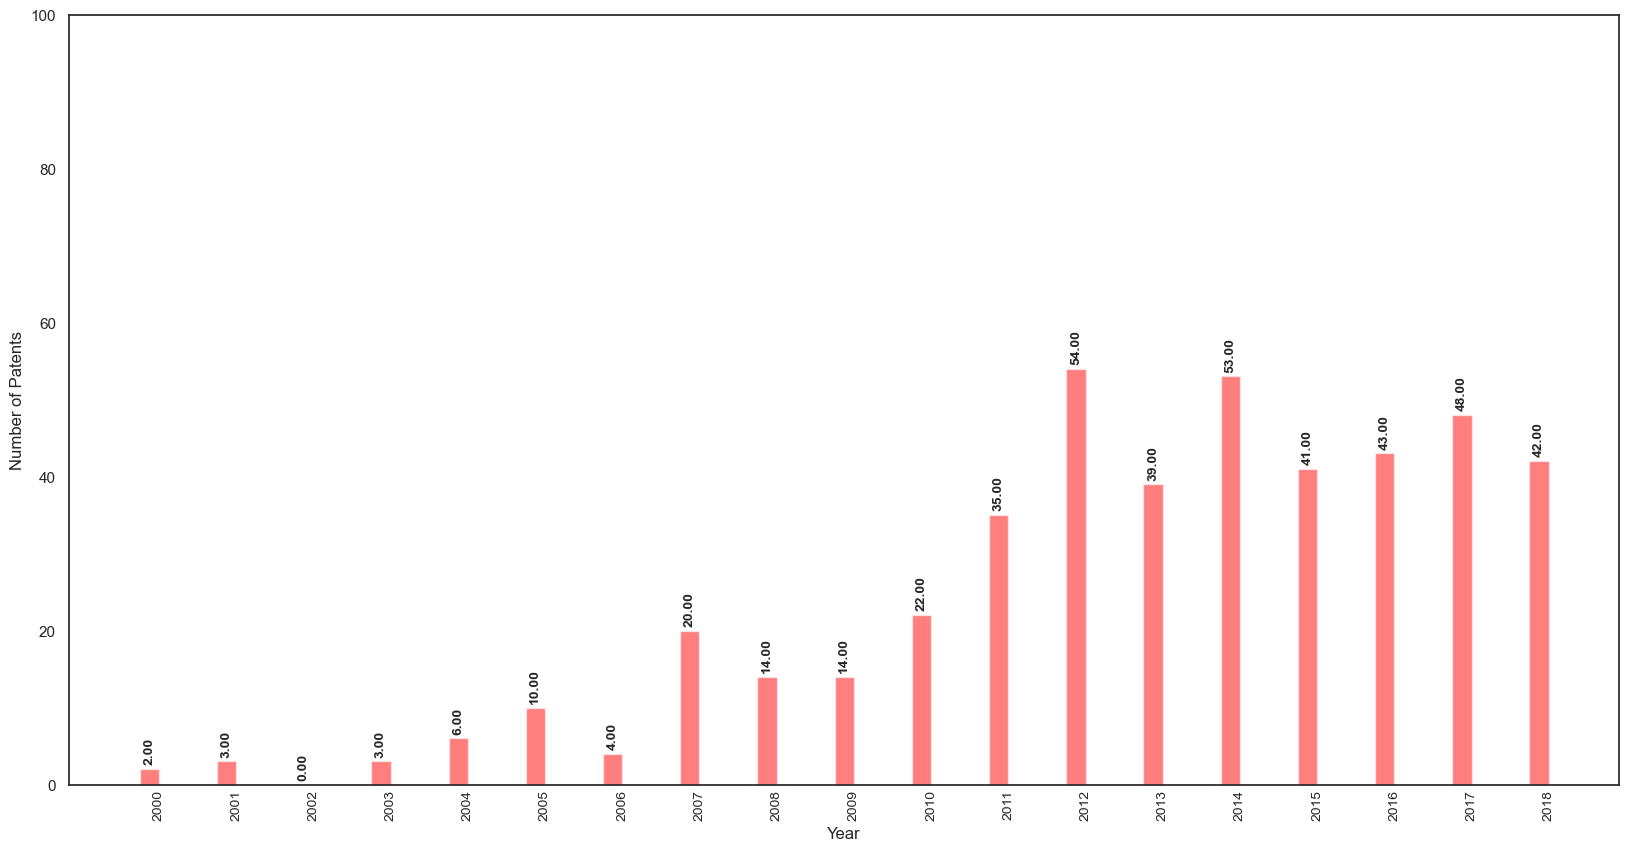

In [ ]:
temp_years=[year for year in range(2000,2019)]

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
for year in temp_years:
    try:
      temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==year][0]
      temp_list1.append(len([sitc for sitc in temp_VNM.rta_dict.keys() if temp_VNM.rta_dict[sitc]>1]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_ylim(0,100)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

Text(0, 0.5, 'Number of Patents')

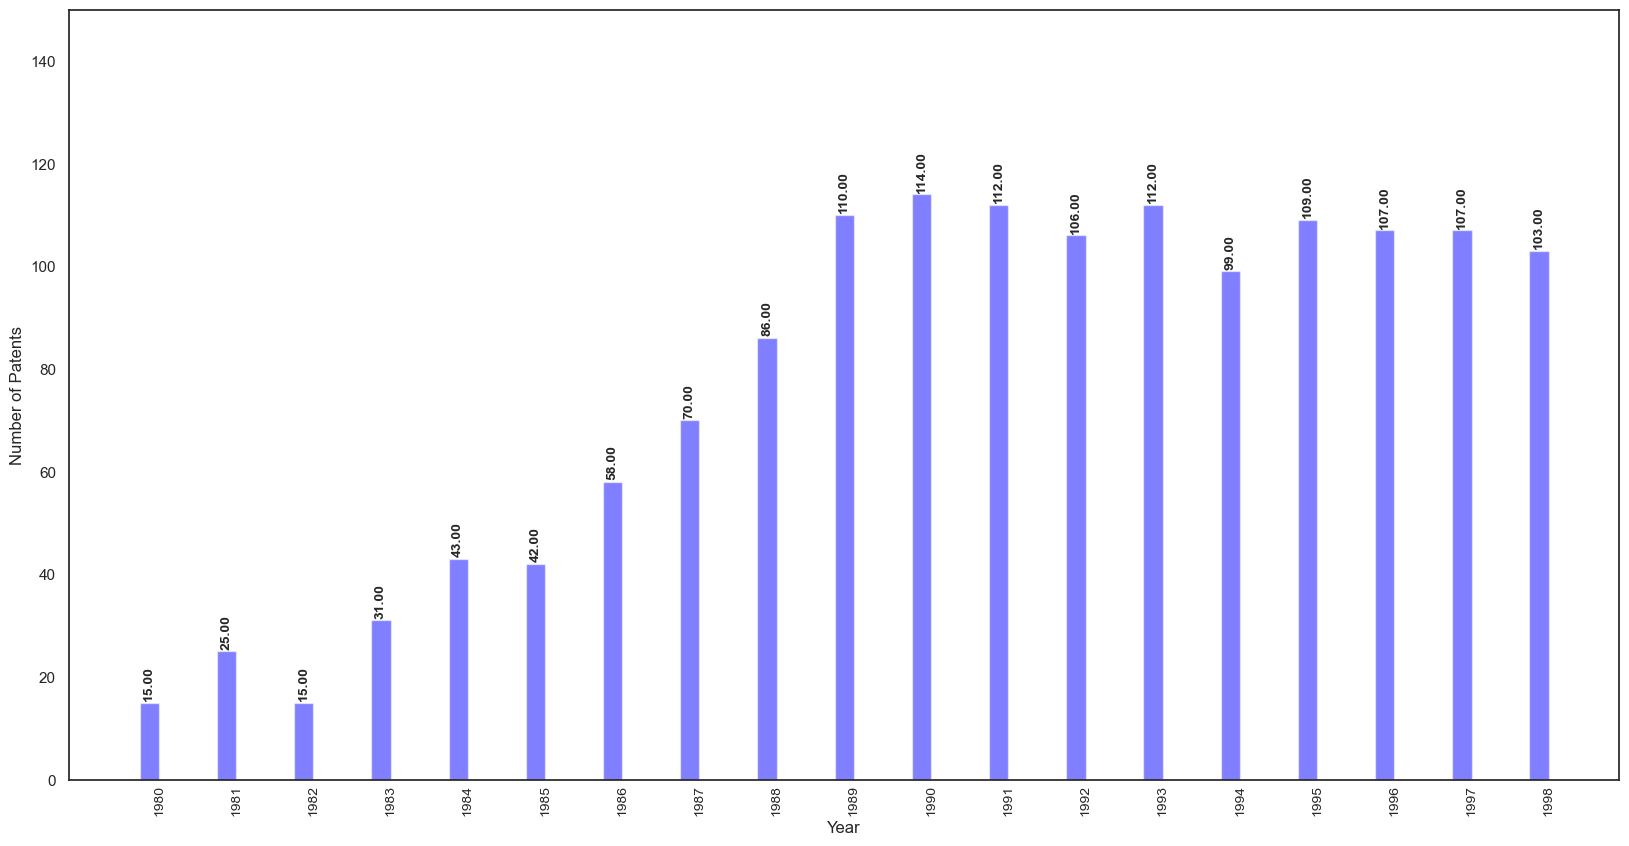

In [ ]:
temp_years=[year for year in range(1980,1999)]

fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
for year in temp_years:
    try:
      temp_KOR=[country for country in country_list if country.name=='KOR' if country.year==year][0]
      temp_list1.append(len([sitc for sitc in temp_KOR.rta_dict.keys() if temp_KOR.rta_dict[sitc]>1]))
    except:
      temp_list1.append(0)

bars=ax.bar(temp_years,temp_list1,color='blue',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_ylim(0,150)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

In [ ]:
##
temp_list2=[]
for year in temp_years:
    try:
      temp_KOR=[country for country in country_list if country.name=='KOR' if country.year==year-34][0]
      temp_list2.append(len([sitc for sitc in temp_KOR.rta_dict.keys() if temp_KOR.rta_dict[sitc]>1]))
    except:
      temp_list2.append(0)

bars=ax.bar(temp_years,temp_list2,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list2[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)


ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Resident",alpha=0.5)
#arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Non-Resident",alpha=0.5)
#ax.legend([arr1,arr2],["Resident","Non-Resident"],loc="upper left",fontsize=20)
ax.spines['top'].set_visible(False)
#plt.savefig(output_path+"/Patents of VNM.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_years=[1980,1990,2000,2010,2018]

for temp_year in temp_years:
    temp_VNM=[country for country in country_list if country.name=='VNM' if country.year==temp_year][0]
    print(temp_year,np.average(list(temp_VNM.rca_dict.values())))
    print(temp_year,len([sitc for sitc in temp_VNM.rca_dict.keys() if temp_VNM.rca_dict[sitc]>1]))
    print(temp_year,np.average(list(temp_VNM.production_density_dict.values())))
    print('----------------------')


1980 1.3894940981520278
1980 57
1980 0.06627667709383134
----------------------
1990 1.412866514199965
1990 86
1990 0.10373533429979014
----------------------
2000 1.5183723778434848
2000 156
2000 0.19897477695224425
----------------------
2010 1.4134456699060767
2010 190
2010 0.2538487640056322
----------------------
2018 0.8249685774729192
2018 163
2018 0.210527480622659
----------------------


## GDP 분석

In [ ]:
from adjustText import adjust_text

In [ ]:
input

'E:\\이게 WB 과제 진짜 마지막\\Input'

In [ ]:
#GDP_per_capita_WB_df=pd.read_csv(input+r'\GDP_WB.csv',error_bad_lines=False)
GDP_per_capita_WB_df=pd.read_csv(input+r'\GDP_WB.csv')
GDP_per_capita_WB_df.head()

temp_dict_1970=dict(zip(GDP_per_capita_WB_df["Country Code"],GDP_per_capita_WB_df["1970"]))
#temp_USA=temp_dict_1970['USA']
temp_dict_1970={n:temp_dict_1970[n] for n in temp_dict_1970.keys() if str(temp_dict_1970[n])!='nan'}

temp_dict_2019=dict(zip(GDP_per_capita_WB_df["Country Code"],GDP_per_capita_WB_df["2019"]))
#temp_USA=temp_dict_2019['USA']
temp_dict_2019={n:temp_dict_2019[n] for n in temp_dict_2019.keys() if str(temp_dict_2019[n])!='nan'}

In [ ]:
for country in country_list:
    try:
        if str(GDP_per_capita_WB_df[GDP_per_capita_WB_df["Country Code"]==country.name][str(country.year)].iloc[0])=='nan':
            temp_GDP_per_capita=None
        else:
            temp_GDP_per_capita=GDP_per_capita_WB_df[GDP_per_capita_WB_df["Country Code"]==country.name][str(country.year)].iloc[0]
    except:
        temp_GDP_per_capita=None
    country.GDP_per_capita=temp_GDP_per_capita

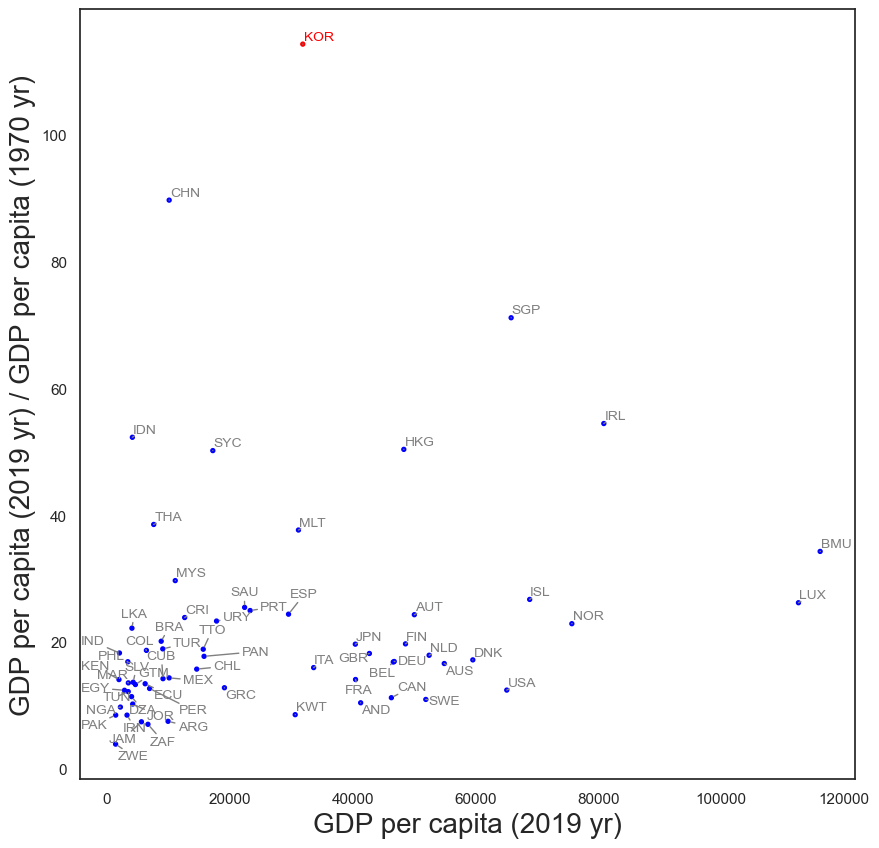

In [ ]:
temp_list1=[]
temp_list2=[]
temp_list3=[]
temp_list4=[]

for key in temp_dict_1970.keys():
    if key in temp_dict_2019.keys():
        # 미국보다 GDP per capita 높은 나라는 제외
        if key in list(set([country.name for country in country_list])):
            color='blue'
            if key=='KOR':
                color='red'
            temp_list1.append(temp_dict_2019[key])
            temp_list2.append(temp_dict_2019[key]/temp_dict_1970[key])
            temp_list3.append(key)
            temp_list4.append(color)

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
ax.scatter(temp_list1,temp_list2,s=8,color=temp_list4)

texts=[]
for i in range(len(temp_list3)):
    color='grey'
    if i==temp_list4.index('red'):
        color='red'
    texts.append(ax.text(temp_list1[i],temp_list2[i],temp_list3[i],fontsize=10,color=color))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))

ax.set_xlabel("GDP per capita (2019 yr)",fontsize=20)
ax.set_ylabel("GDP per capita (2019 yr) / GDP per capita (1970 yr)",fontsize=20)
plt.savefig(output_path+"/GDP per capita_WB.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_RD_data=pd.read_excel(input+r'\investment.xlsx')
temp_RD_data.head()

Year  Investment  GDP_per_RD
0  1970       105.0        0.38
1  1971       107.0        0.31
2  1972       120.0        0.28
3  1973       156.0        0.28
4  1974       230.0        0.29

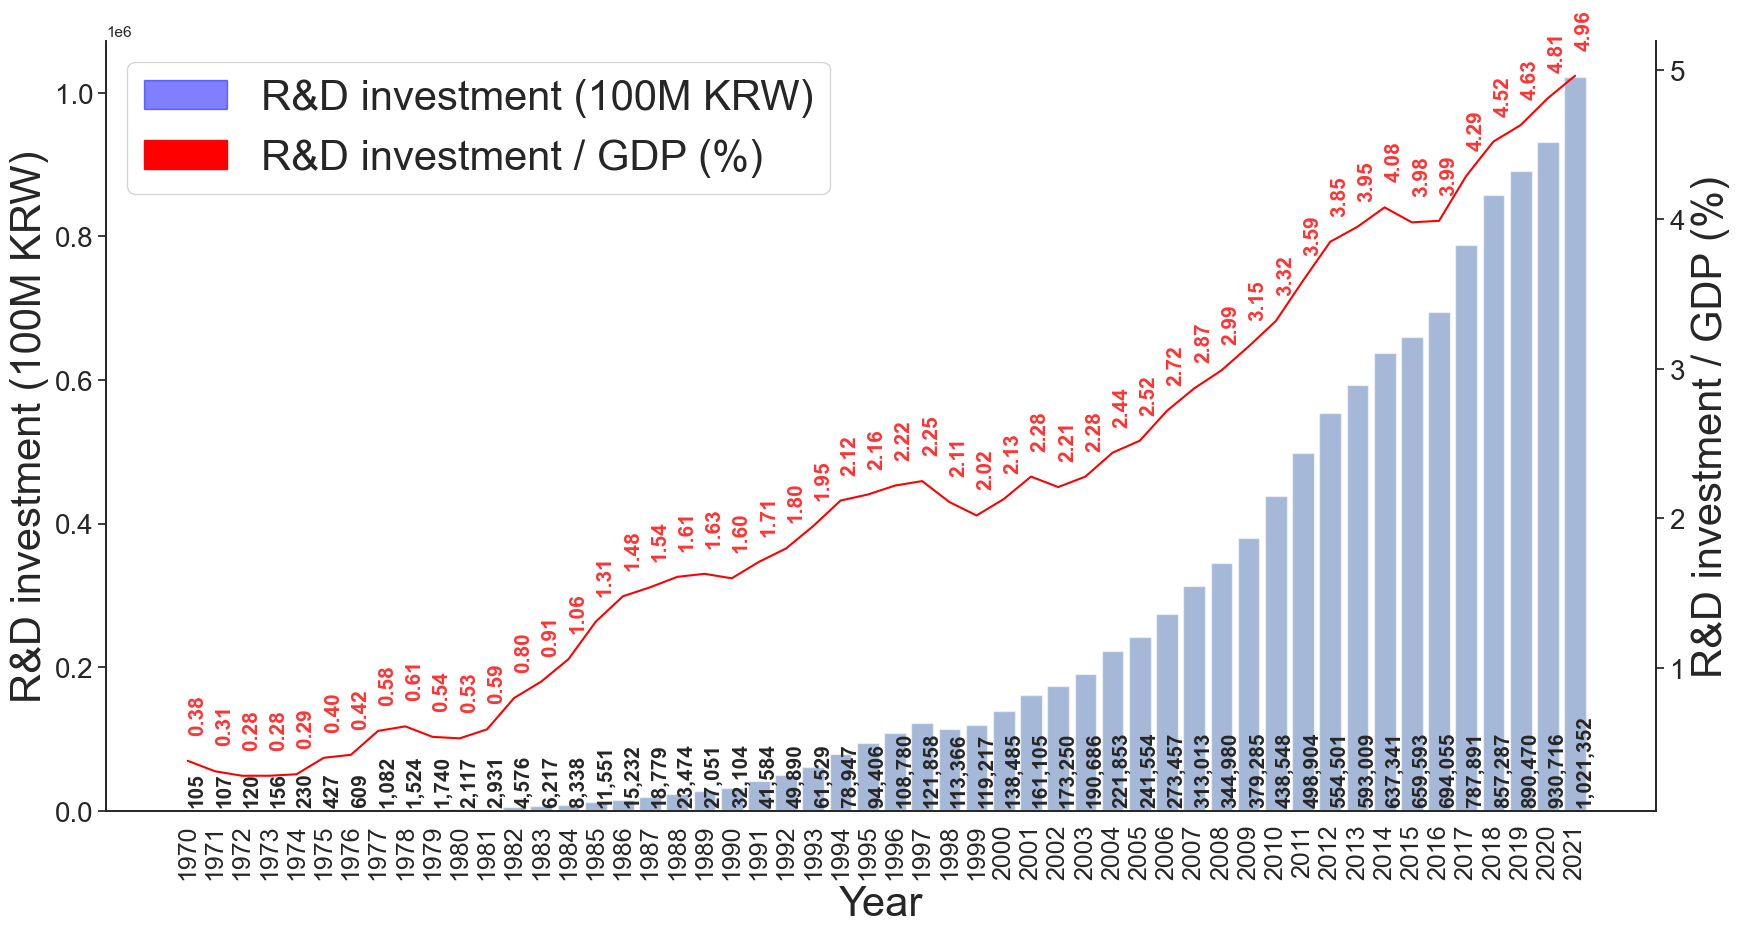

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_x_list=temp_RD_data['Year']
temp_y_list1=temp_RD_data['Investment']
temp_y_list2=temp_RD_data['GDP_per_RD']

ax.bar(temp_x_list, temp_y_list1,alpha=0.5)
ax.set_ylabel('R&D investment (100M KRW)',fontsize=30)
ax.set_xlabel('Year',fontsize=30)

ax1=ax.twinx()
ax1.plot(temp_x_list,temp_y_list2,color='red')

for i in range(len(temp_x_list)):
    ax.text(temp_x_list[i],10000,format(int(temp_y_list1[i]),','),rotation=90,fontweight='bold',fontsize=15)

for i in range(len(temp_x_list)):
    ax1.text(temp_x_list[i],temp_y_list2[i]+0.2,format(temp_y_list2[i],'.2f'),rotation=90,fontweight='bold',fontsize=15,color='red',alpha=0.8)


ax1.set_xticks(temp_x_list)
ax.set_xticklabels(temp_x_list,rotation=90)

ax.tick_params(axis='x', labelsize=18,rotation=90)
ax.tick_params(axis='y', labelsize=20)
ax1.set_ylabel('R&D investment / GDP (%)',fontsize=30)
ax1.tick_params(axis='y', labelsize=20)

ax1.spines['top'].set_visible(False)
ax.spines['top'].set_visible(False)

temp_arr_list=[]
temp_key_list=[]
temp_arr_list.append(
    plt.arrow(0,0, 0,0, head_width=0, color='blue', alpha=0.5, length_includes_head=True,label='R&D investment (100M KRW)')
)
temp_arr_list.append(
    plt.arrow(0,0, 0,0, head_width=0, color='red', alpha=1, length_includes_head=True,label='R&D investment / GDP (%)')
)
temp_key_list.append(
    'R&D investment (100M KRW)'
)
temp_key_list.append(
    'R&D investment / GDP (%)'
)
ax.legend(temp_arr_list,temp_key_list,fontsize=30, loc='upper left')

plt.savefig(output_path+"/R&D investment in Korea.jpg",dpi=300,transparent=True,bbox_inches="tight")


In [ ]:
temp_RD_data=pd.read_excel(input+r'\investment_subject_pro.xlsx')
temp_RD_data.head()

Year  Government  University  Private
0  1976        71.9         3.2     24.9
1  1977        56.4         5.1     38.5
2  1978        51.2        13.5     35.3
3  1979        56.4         9.5     34.1
4  1980        49.3        12.2     38.4

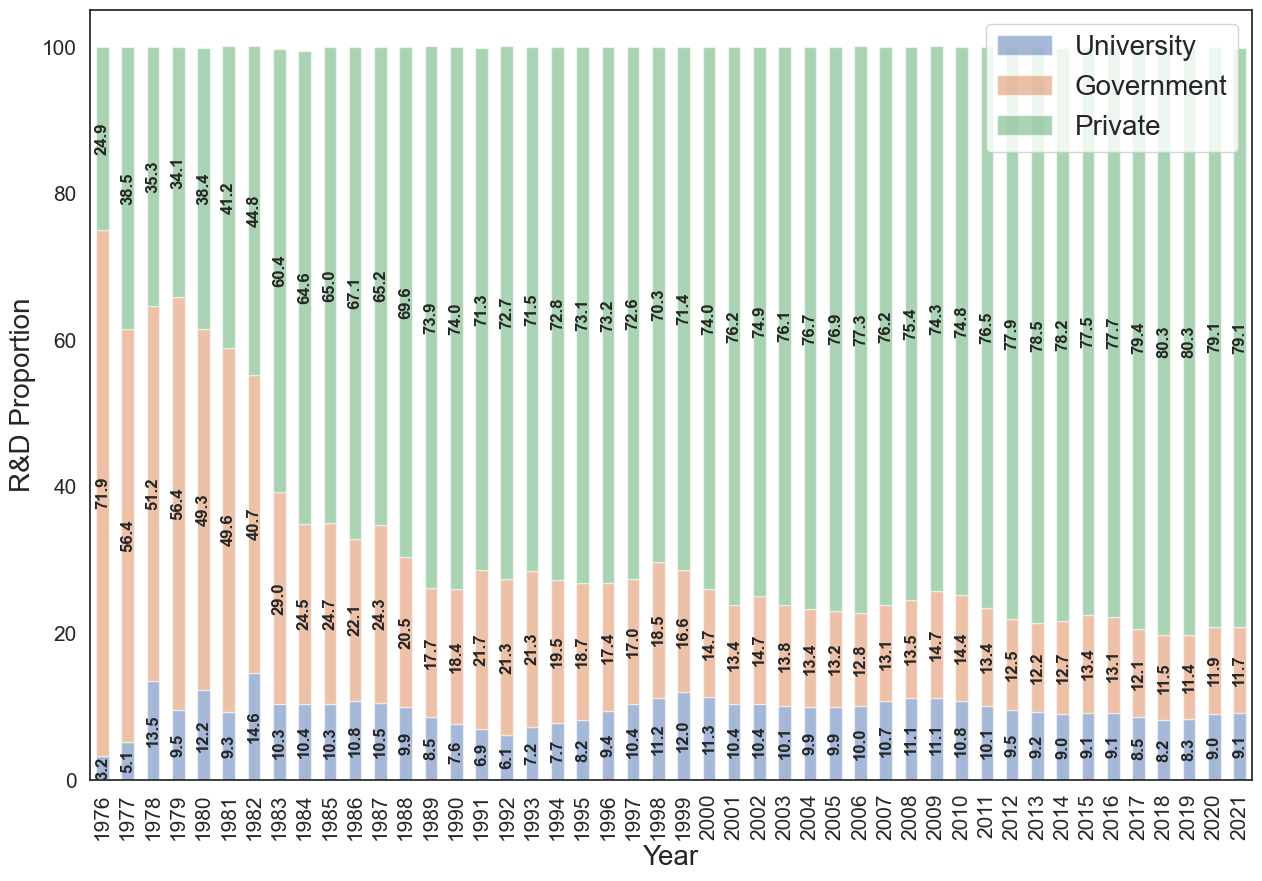

In [ ]:
year = temp_RD_data['Year']
data = {
    "University":list(temp_RD_data['University']),
    "Government":list(temp_RD_data['Government']),
    "Private":list(temp_RD_data['Private'])
}

df = pd.DataFrame(data,index=year)
ax = df.plot(kind="bar",stacked=True,figsize=(15,10),alpha=0.5)      # stacked

for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=[format(item,'.1f') for item in labels], label_type='center',rotation=90,fontweight='bold')
ax.legend(fontsize=20,loc='upper right')
ax.tick_params(axis='x', labelsize=15,rotation=90)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('R&D Proportion',fontsize=20)
plt.savefig(output_path+"/R&D investment proportion in Korea.jpg",dpi=300,transparent=True,bbox_inches="tight")

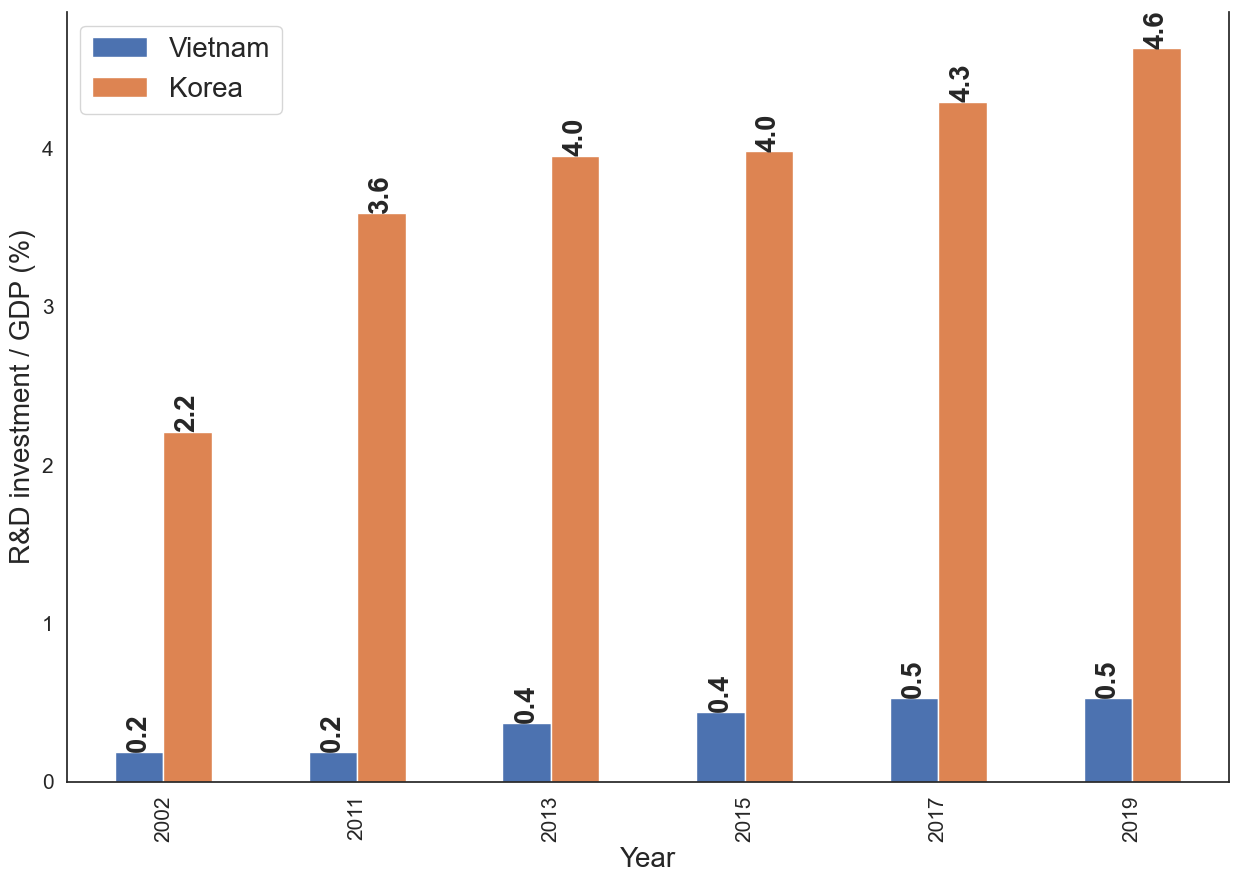

In [ ]:
import pandas as pd

years = [2002,2011,2013,2015,2017,2019]

data = {
    "Vietnam":[0.19,0.19,0.37,0.44,0.53,0.53],
    "Korea":[2.21,3.59,3.95,3.98,4.29,4.63]
}

df = pd.DataFrame(data,index=years)

ax=df.plot(kind="bar",figsize=(15,10))
for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, labels=[format(item,'.1f') for item in labels], label_type='edge',rotation=90,fontweight='bold',fontsize=20)
ax.legend(fontsize=20,loc='upper left')
ax.tick_params(axis='x', labelsize=15,rotation=90)
ax.tick_params(axis='y', labelsize=15)

ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('R&D investment / GDP (%)',fontsize=20)

ax.spines['top'].set_visible(False)
plt.savefig(output_path+"/R&D investment_GDP (%) Vietnam vs. Korea.jpg",dpi=300,transparent=True,bbox_inches="tight")

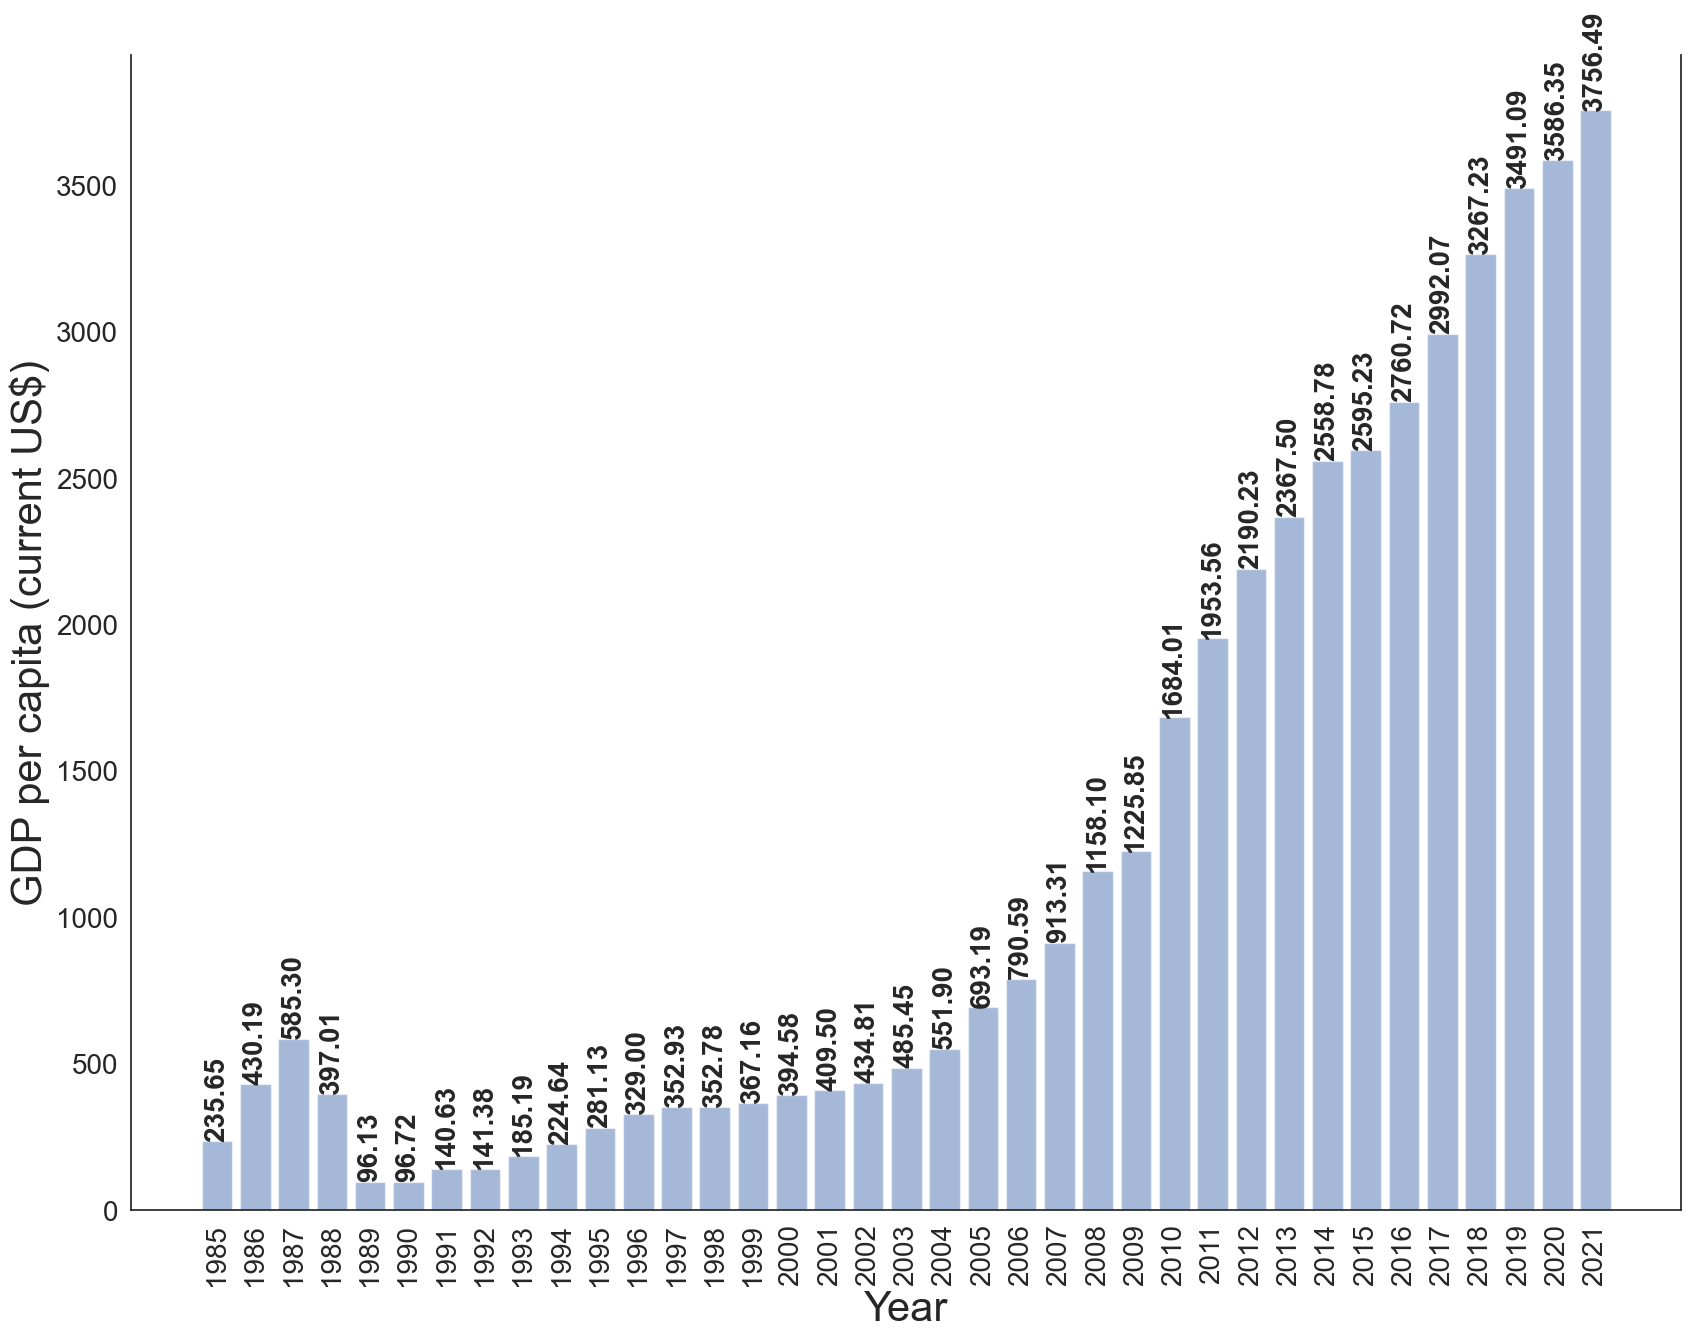

In [ ]:
fig=plt.figure(figsize=(20,15))
ax=plt.subplot(111)

temp_x_list=GDP_per_capita_WB_df[GDP_per_capita_WB_df["Country Code"]=='VNM'].iloc[0][4:].index[25:-1]
temp_y_list=GDP_per_capita_WB_df[GDP_per_capita_WB_df["Country Code"]=='VNM'].iloc[0][4:][25:-1]
bar=ax.bar(temp_x_list, temp_y_list,alpha=0.5)

ax.set_ylabel('GDP per capita (current US$)',fontsize=30)
ax.set_xlabel('Year',fontsize=30)

ax.tick_params(axis='x', labelsize=20,rotation=90)
ax.tick_params(axis='y', labelsize=20)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0, height,format(height,'.2f'), ha = 'center',va='bottom',size=20,rotation=90,fontweight='bold')

ax.spines['top'].set_visible(False)
plt.savefig(output_path+"/Vietnam GDP per capita_WB.jpg",dpi=300,transparent=True,bbox_inches="tight")


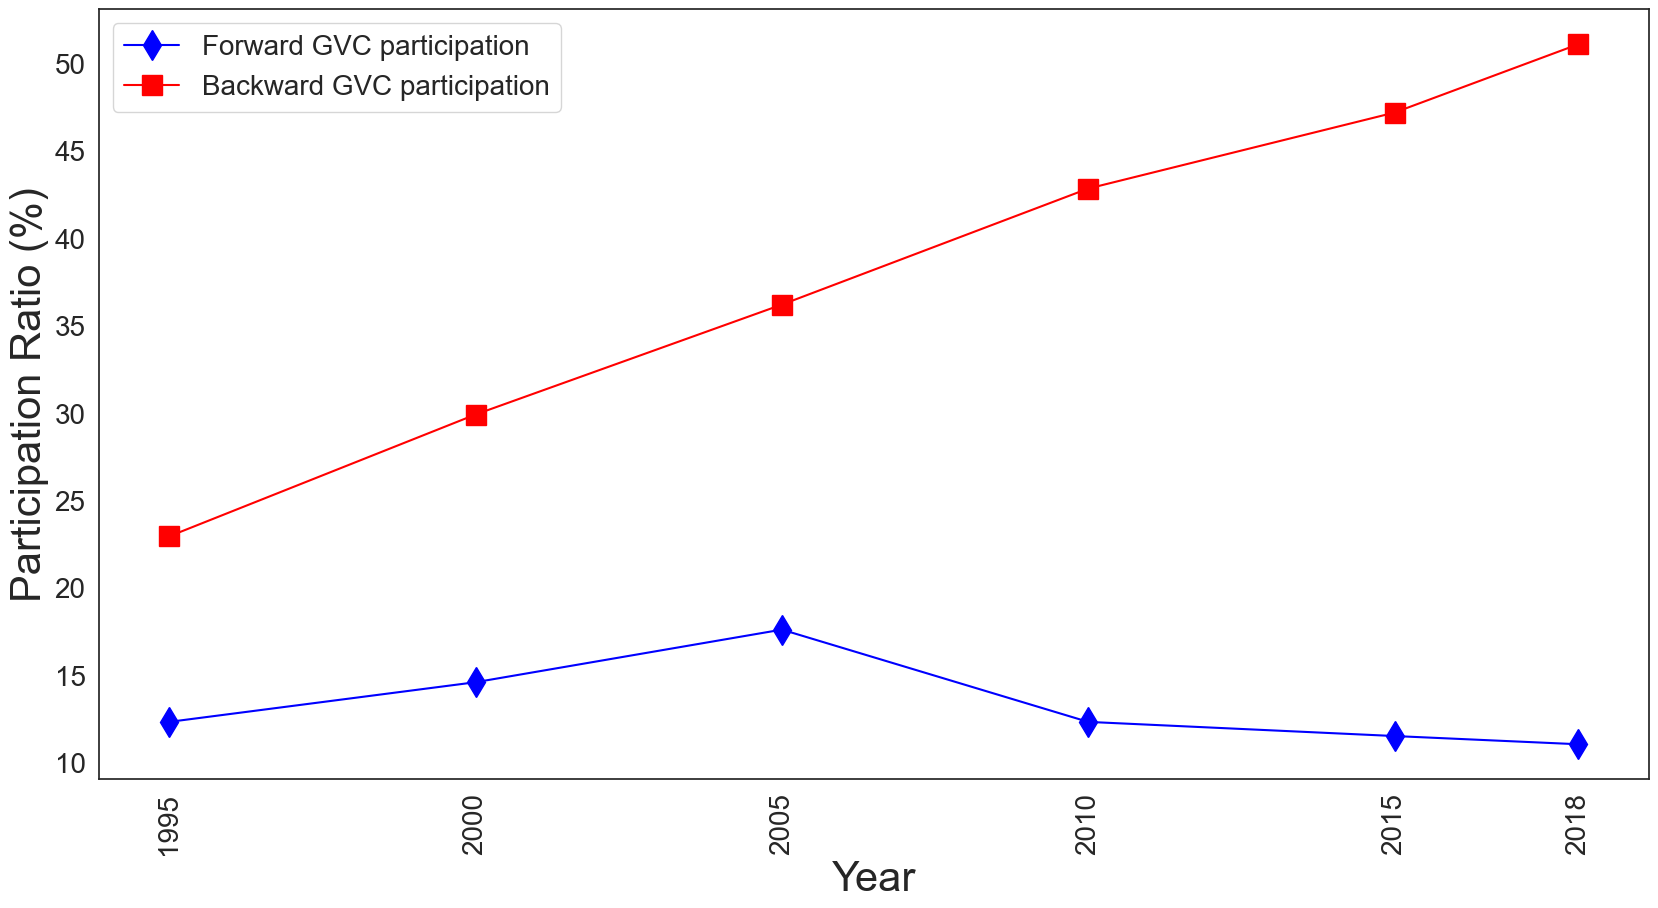

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_forward_gvc=[12.31, 14.58, 17.59, 12.31, 11.50, 11.03]
temp_backward_gvc=[22.93,29.90,36.19,42.83,47.18,51.09]
temp_x_list=[1995,2000,2005,2010,2015,2018]

ax.plot(temp_x_list,temp_forward_gvc,color='blue',label='Forward GVC participation',marker='d',markersize=15)
ax.plot(temp_x_list,temp_backward_gvc,color='red',label='Backward GVC participation',marker='s',markersize=15)

ax.set_ylabel('Participation Ratio (%)',fontsize=30)
ax.set_xlabel('Year',fontsize=30)

ax.set_xticks(temp_x_list)

ax.tick_params(axis='x', labelsize=20,rotation=90)
ax.tick_params(axis='y', labelsize=20)

ax.legend(fontsize=20)
plt.savefig(output_path+"/Vietnam GVC.jpg",dpi=300,transparent=True,bbox_inches="tight")

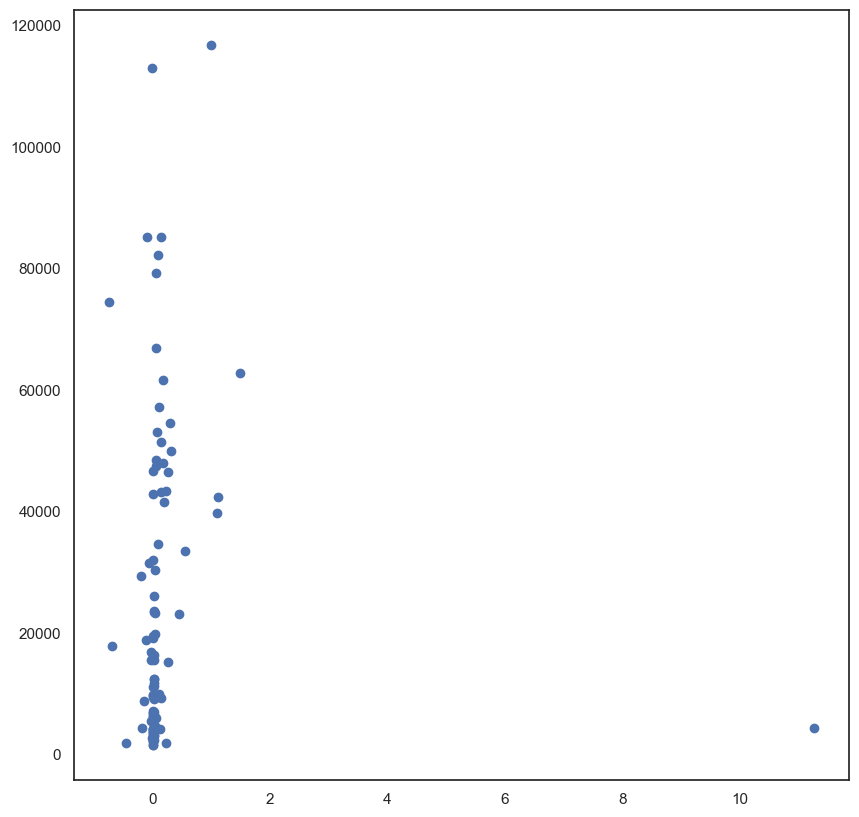

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

temp_countries = [country for country in country_list if country.year==2018]

temp_max_tech = max([np.sum(list(country.ipc_dict.values())) for country in temp_countries])
temp_min_tech = min([np.sum(list(country.ipc_dict.values())) for country in temp_countries])
temp_max_prod = max([np.sum(list(country.export_dict.values())) for country in temp_countries])
temp_min_prod = min([np.sum(list(country.export_dict.values())) for country in temp_countries])

ax.scatter([((np.sum(list(country.ipc_dict.values()))-temp_min_tech)/(temp_max_tech-temp_min_tech))/((np.sum(list(country.export_dict.values()))-temp_min_prod)/(temp_max_prod-temp_min_prod)) for country in temp_countries],
           [country.GDP_per_capita for country in temp_countries])

In [ ]:
import math

In [ ]:
[item.name for item in temp_countries]

['ISR',
 'CYP',
 'VEN',
 'LUX',
 'UKR',
 'PAN',
 'UZB',
 'GEO',
 'ITA',
 'TTO',
 'URY',
 'HKG',
 'NLD',
 'DEU',
 'NOR',
 'GTM',
 'DZA',
 'BGR',
 'CZE',
 'FRA',
 'BRA',
 'MEX',
 'ARG',
 'AUT',
 'CYM',
 'PRT',
 'LBN',
 'ROU',
 'IND',
 'CHE',
 'MLT',
 'SVN',
 'KAZ',
 'SGP',
 'ISL',
 'MNG',
 'NGA',
 'EST',
 'PRK',
 'LVA',
 'KOR',
 'BMU',
 'DNK',
 'SYC',
 'JOR',
 'THA',
 'IDN',
 'RUS',
 'IRN',
 'SVK',
 'ESP',
 'CUB',
 'ZAF',
 'EGY',
 'USA',
 'MAR',
 'SWE',
 'DJI',
 'GBR',
 'PER',
 'PHL',
 'LKA',
 'LTU',
 'ECU',
 'BLR',
 'POL',
 'SAU',
 'IRL',
 'ARE',
 'YUG',
 'AND',
 'CRI',
 'FIN',
 'MKD',
 'TUN',
 'KEN',
 'TWN',
 'NZL',
 'BIH',
 'TUR',
 'AUS',
 'ZWE',
 'CHL',
 'HUN',
 'COL',
 'CAN',
 'JPN',
 'MYS',
 'HRV',
 'SLV',
 'ARM',
 'KWT',
 'PAK',
 'GRC',
 'JAM',
 'MDA',
 'CHN',
 'BEL',
 'VNM']

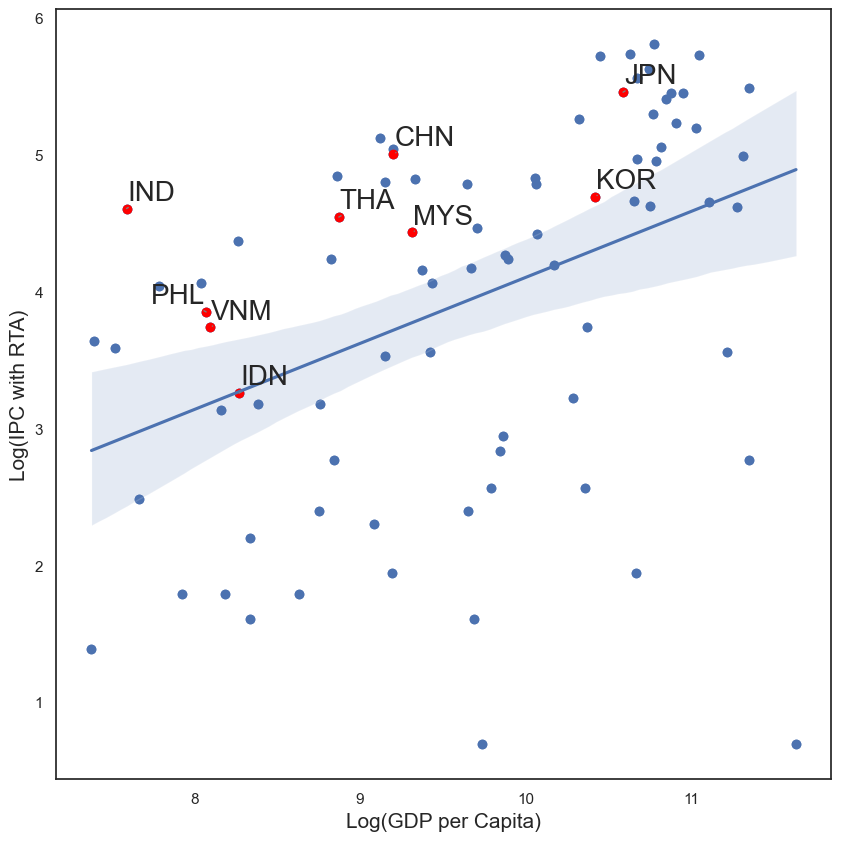

In [ ]:
import plotly.express as px

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

temp_countries = [country for country in country_list if country.year==2018 if np.sum(list(country.ipc_dict.values()))/np.sum(list(country.export_dict.values()))>0 if country.GDP_per_capita]

temp_xs=[math.log(country.GDP_per_capita) for country in temp_countries]
#temp_ys=[math.log(np.sum(list(country.ipc_dict.values()))/np.sum(list(country.export_dict.values()))) for country in temp_countries]
temp_ys=[math.log(np.sum(list([1 for i in country.rta_dict.keys() if country.rta_dict[i]>1]))) for country in temp_countries]
#temp_ys=[math.log(np.sum(list(country.ipc_dict.values()))) for country in temp_countries]


ax.scatter(temp_xs,temp_ys)
temp_df=pd.DataFrame()
temp_df['GDP']=temp_xs
temp_df['RTA/RCA']=temp_ys

sns.regplot(x='GDP',y='RTA/RCA',data=temp_df)

#temp_targets=['VNM','KOR','USA',"IND",'IND',"CHN",'MYS',"PHL","SGP",'CAN','CAM',"MAR","TWN"]

temp_targets=['CHN',"JPN","KOR","IND","MYS","THA","IDN","VNM",'PHL']
texts=[]
for i in range(len(temp_countries)):
    if temp_countries[i].name in temp_targets:
        texts.append(ax.text(temp_xs[i], temp_ys[i], temp_countries[i].name,fontsize=20))
        ax.scatter(temp_xs[i], temp_ys[i],color='red')

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))
ax.set_xlabel('Log(GDP per Capita)',fontsize=15)
ax.set_ylabel('Log(IPC with RTA)',fontsize=15)
plt.savefig(output_path+"/GDP_IPC.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_dict={}
temp_targets=['CHN',"JPN","KOR","IND","MYS","THA","IDN","VNM",'PHL']
texts=[]
for i in range(len(temp_countries)):
    if temp_countries[i].name in temp_targets:
        temp_dict[temp_countries[i].name]=temp_ys[i]/temp_xs[i]
sorted(temp_dict.items(),key=lambda item:-item[1])

[('IND', 1.1028276735031337),
 ('CHN', 1.0449276935389866),
 ('JPN', 1.017054134275827),
 ('KOR', 0.9495118325473599),
 ('MYS', 0.592642703449514),
 ('VNM', 0.5465415896458068),
 ('PHL', 0.5436031159396881),
 ('THA', 0.4907860973843798),
 ('IDN', 0.2956830745953029)]

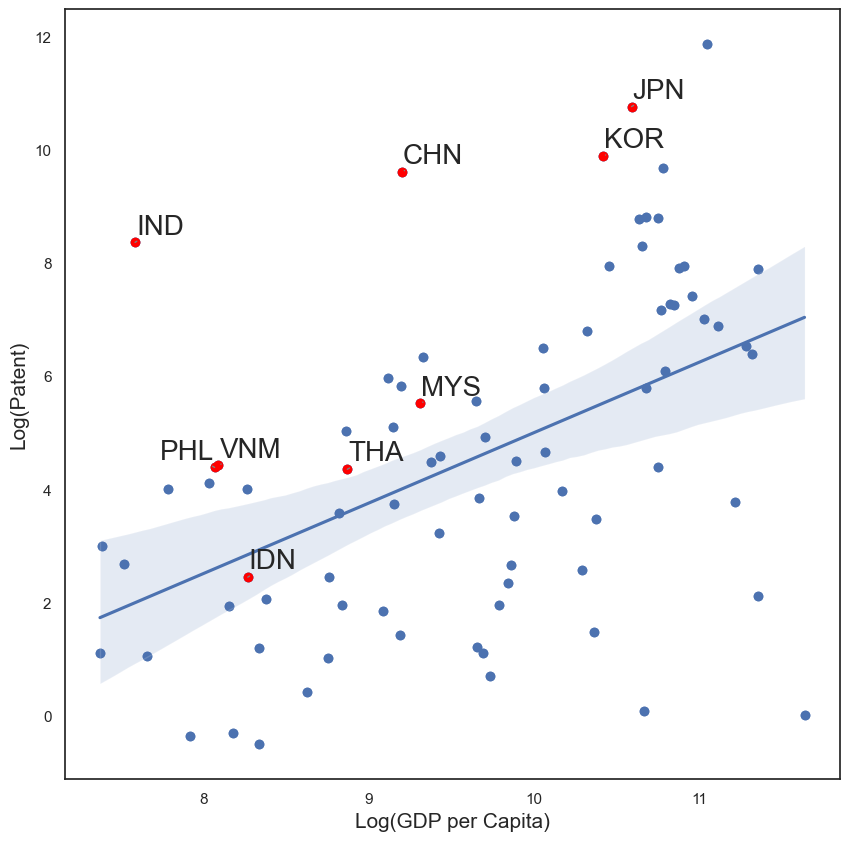

In [ ]:
import plotly.express as px

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

temp_countries = [country for country in country_list if country.year==2018 if np.sum(list(country.ipc_dict.values()))/np.sum(list(country.export_dict.values()))>0 if country.GDP_per_capita]

temp_xs=[math.log(country.GDP_per_capita) for country in temp_countries]
#temp_ys=[math.log(np.sum(list(country.ipc_dict.values()))/np.sum(list(country.export_dict.values()))) for country in temp_countries]
#temp_ys=[math.log(np.sum(list([1 for i in country.rta_dict.keys() if country.rta_dict[i]>1]))) for country in temp_countries]
temp_ys=[math.log(np.sum(list(country.ipc_dict.values()))) for country in temp_countries]


ax.scatter(temp_xs,temp_ys)
temp_df=pd.DataFrame()
temp_df['GDP']=temp_xs
temp_df['RTA/RCA']=temp_ys

sns.regplot(x='GDP',y='RTA/RCA',data=temp_df)

#temp_targets=['VNM','KOR','USA',"IND",'IND',"CHN",'MYS',"PHL","SGP",'CAN','CAM',"MAR","TWN"]

temp_targets=['CHN',"JPN","KOR","IND","MYS","THA","IDN","VNM",'PHL']
texts=[]
for i in range(len(temp_countries)):
    if temp_countries[i].name in temp_targets:
        texts.append(ax.text(temp_xs[i], temp_ys[i], temp_countries[i].name,fontsize=20))
        ax.scatter(temp_xs[i], temp_ys[i],color='red')

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey'))
ax.set_xlabel('Log(GDP per Capita)',fontsize=15)
ax.set_ylabel('Log(Patent)',fontsize=15)
plt.savefig(output_path+"/GDP_Patent.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
output_path

'E:\\이게 WB 과제 진짜 마지막\\Output_Final_231110_시나리오 분석 수정'

## Product Space

In [ ]:
year_list=[year for year in range(1960,2019)]

In [ ]:
def Product_Space(input_Proximity_Matrix,threshold,temp_title):
  ## Construction Network

  temp_node_df=pd.DataFrame()
  temp_node_df_list1=[]
  temp_node_df_list2=[]
  temp_node_df_list3=[]
  temp_node_df_list4=[]

  temp_nodes=sorted(input_Proximity_Matrix.codes)
  temp_G=nx.Graph()
  for i in range(len(temp_nodes)):
    temp_G.add_node(temp_nodes[i])
    for j in range(i+1,len(temp_nodes)):
        if input_Proximity_Matrix.df.loc[temp_nodes[i],temp_nodes[j]]>=threshold:
          temp_G.add_edge(temp_nodes[i],temp_nodes[j],weight=input_Proximity_Matrix.df.loc[temp_nodes[i],temp_nodes[j]])
  pos1=nx.spring_layout(temp_G)

  # Network Figure
  temp_countries=[country for country in country_list if country.year==input_Proximity_Matrix.year]
  temp_list=[]
  for country in temp_countries:
    temp_list+=[country.export_dict[sitc] for sitc in country.export_dict.keys()]
  temp_max=max(temp_list)
  temp_min=min(temp_list)
  fig=plt.figure(figsize=(20,20))
  ax=plt.subplot(111)
  for i in range(1,10):
    temp_sub_nodes=[node for node in temp_nodes if len(node)==4 if node[0]==str(i)]
    node_size_list=[]
    for node in temp_sub_nodes:
      temp_value=0
      temp_value=sum([300*(country.export_dict[node]-temp_min)/(temp_max-temp_min) for country in temp_countries if node in country.export_dict.keys()])
      node_size_list.append(temp_value)
    temp_node_df_list1+=temp_sub_nodes
    temp_node_df_list2+=node_size_list
    temp_node_df_list3+=[sitc_code_color_dict[str(i)] for item in temp_sub_nodes]
    temp_node_df_list4+=[sitc_code_dict[str(i)] for item in temp_sub_nodes]

    nx.draw_networkx_nodes(temp_G,pos=pos1,nodelist=temp_sub_nodes,node_size=node_size_list,node_color=sitc_code_color_dict[str(i)],alpha=0.5,ax=ax)

  temp_sub_nodes=[node for node in temp_nodes if len(node)!=4]
  node_size_list=[]
  for node in temp_sub_nodes:
    temp_value=0
    temp_value=sum([300*(country.export_dict[node]-temp_min)/(temp_max-temp_min) for country in temp_countries if node in country.export_dict.keys()])
    node_size_list.append(temp_value)
  nx.draw_networkx_nodes(temp_G,pos=pos1,nodelist=temp_sub_nodes,node_size=node_size_list,node_color=sitc_code_color_dict[str(0)],alpha=0.5,ax=ax)
  temp_node_df_list1+=temp_sub_nodes
  temp_node_df_list2+=node_size_list
  temp_node_df_list3+=[sitc_code_color_dict[str(i)] for item in temp_sub_nodes]
  temp_node_df_list4+=[sitc_code_dict[str(i)] for item in temp_sub_nodes]

  nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.5 if temp_G[x[0]][x[1]]["weight"]<0.55],alpha=0.5,edge_color="grey",ax=ax)
  nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>0.55 if temp_G[x[0]][x[1]]["weight"]<0.6],alpha=1,edge_color="blue",ax=ax)
  nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.6],alpha=1,edge_color="red",ax=ax)

  temp_node_df['Label']=temp_node_df_list1
  temp_node_df['Id']=temp_node_df_list1
  temp_node_df['size']=temp_node_df_list2
  temp_node_df['color']=temp_node_df_list3
  temp_node_df['class']=temp_node_df_list4
  temp_node_df.to_csv(output_path+"/"+temp_title+" node df.csv",index=False)

  # Boundary
  #ax.set_xlim(min(pos1[x][0] for x in pos1.keys()),
  #          max(pos1[x][0] for x in pos1.keys()))
  #ax.set_ylim(min(pos1[x][1] for x in pos1.keys()),
  #          max(pos1[x][1] for x in pos1.keys()))

  # Legend
  """
  temp_arr_list=[]
  temp_key_list=[]
  for key in sitc_code_dict.keys():
    temp_arr_list.append(
        plt.arrow(0,0, 0,0, head_width=0, color=sitc_code_color_dict[key], length_includes_head=True,label=sitc_code_dict[key])
    )
    temp_key_list.append(
        sitc_code_dict[key]
    )
  ax.legend(temp_arr_list,temp_key_list,fontsize=20, loc='upper left')
  """
  plt.tight_layout()
  plt.savefig(output_path+"/"+temp_title+".jpg",dpi=300,transparent=True,bbox_inches="tight")
  return temp_G, pos1

In [ ]:
#temp_product_space_pos_list=[]
#temp_product_space_list=[]
for year in tqdm(year_list[-1:]):
    try:
      input_Proximity_Matrix=[item for item in Product_PM_list if item.year==year][0]
      threshold=0.5
      temp_title=f"Product Space_wo_legend %s_%s"%(str(input_Proximity_Matrix.year),str(threshold))
      temp_G, pos1 = Product_Space(input_Proximity_Matrix,threshold,temp_title)
      #temp_product_space_list.append(temp_G)
      #temp_product_space_pos_list.append(pos1)
      nx.to_pandas_adjacency(temp_G).to_csv(output_path+r'/%s %s product space adjacency matrix.csv'%(str(year),str(threshold)),index=True)

    except:
      print(year)
      #temp_product_space_list.append(None)
      #temp_product_space_pos_list.append(None)
      pass

In [ ]:
temp_product_space_pos_list=[]
temp_product_space_list=[]
for year in tqdm(year_list):
    try:
      input_Proximity_Matrix=[item for item in Product_PM_list if item.year==year][0]
      threshold=0.5
      temp_title=f"Product Space_%s_%s"%(str(input_Proximity_Matrix.year),str(threshold))
      temp_G, pos1 = Product_Space(input_Proximity_Matrix,threshold,temp_title)
      temp_product_space_list.append(temp_G)
      temp_product_space_pos_list.append(pos1)
      nx.to_pandas_adjacency(temp_G).to_csv(output_path+r'/%s %s product space adjacency matrix.csv'%(str(year),str(threshold)),index=True)

    except:
      print(year)
      temp_product_space_list.append(None)
      temp_product_space_pos_list.append(None)
      pass

In [ ]:
def Product_Space_with_highlight(temp_G,temp_pos,points,temp_title):
      # Network Figure
  year=year_list[temp_product_space_list.index(temp_G)]
  temp_countries=[country for country in country_list if country.year==year]

  temp_countries=[country for country in country_list if country.year==input_Proximity_Matrix.year]
  temp_list=[]
  for country in temp_countries:
    temp_list+=[country.export_dict[sitc] for sitc in country.export_dict.keys()]
  temp_max=max(temp_list)
  temp_min=min(temp_list)

  fig=plt.figure(figsize=(20,20))
  temp_node_size_dict={}
  for i in range(0,10):
    temp_sub_nodes=[node for node in temp_G.nodes() if node[0]==str(i)]
    node_size_list=[]
    for node in temp_sub_nodes:
      temp_value=0
      temp_value=sum([300*(country.export_dict[node]-temp_min)/(temp_max-temp_min) for country in temp_countries if node in country.export_dict.keys()])
      node_size_list.append(temp_value)
      temp_node_size_dict[node]=temp_value
    nx.draw_networkx_nodes(temp_G,pos=temp_pos,nodelist=temp_sub_nodes,node_size=node_size_list,node_color='grey',alpha=0.3)

  temp_sub_nodes=[node for node in temp_G.nodes() if len(node)!=4]
  node_size_list=[]
  for node in temp_sub_nodes:
    temp_value=0
    temp_value=sum([300*(country.export_dict[node]-temp_min)/(temp_max-temp_min) for country in temp_countries if node in country.export_dict.keys()])
    node_size_list.append(temp_value)
    temp_node_size_dict[node]=temp_value
  nx.draw_networkx_nodes(temp_G,pos=temp_pos,nodelist=temp_sub_nodes,node_size=node_size_list,node_color='grey',alpha=0.3)
  nx.draw_networkx_edges(temp_G,pos=temp_pos,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.5 if temp_G[x[0]][x[1]]["weight"]<0.55],alpha=0.5,edge_color="grey")
  nx.draw_networkx_edges(temp_G,pos=temp_pos,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>0.55 if temp_G[x[0]][x[1]]["weight"]<0.6],alpha=1,edge_color="blue")
  nx.draw_networkx_edges(temp_G,pos=temp_pos,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.6],alpha=1,edge_color="red")

  # Highlight
  nx.draw_networkx_nodes(temp_G,pos=temp_pos,nodelist=points,node_size=[temp_node_size_dict[n] for n in points],node_color='black',alpha=0.8)

  # Boundary
  plt.xlim(min(temp_pos[x][0] for x in temp_pos.keys()),
            max(temp_pos[x][0] for x in temp_pos.keys()))

  plt.ylim(min(temp_pos[x][1] for x in temp_pos.keys()),
            max(temp_pos[x][1] for x in temp_pos.keys()))

  # Legend
  plt.savefig(output_path+"/"+temp_title+".jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_product_space_pos_list[year_list.index(year)]
        temp_G=temp_product_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="USA"][0]
        points=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]
        temp_title=temp_title=f"Product Space_USA_%s"%(str(year))
        Product_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_product_space_pos_list[year_list.index(year)]
        temp_G=temp_product_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="KOR"][0]
        points=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]
        temp_title=temp_title=f"Product Space_KOR_%s"%(str(year))
        Product_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_product_space_pos_list[year_list.index(year)]
        temp_G=temp_product_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="VNM"][0]
        points=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]
        temp_title=temp_title=f"Product Space_VNM_%s"%(str(year))
        Product_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_product_space_pos_list[year_list.index(year)]
        temp_G=temp_product_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="CHN"][0]
        points=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]
        temp_title=temp_title=f"Product Space_CHN_%s"%(str(year))
        Product_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

## Korean Electronic Industry

In [ ]:
temp_year=2000
threshold=0.5
input_Proximity_Matrix=[item for item in Product_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_nodes2=[]
for item in temp_nodes:
    if len(item)==4:
        if int(item[0:2]) in [76,77]:
            temp_nodes2.append(item)

temp_G=nx.Graph()
for i in range(len(temp_nodes2)):
    temp_G.add_node(temp_nodes2[i])
    for j in range(i+1,len(temp_nodes2)):
      if input_Proximity_Matrix.df.loc[temp_nodes2[i],temp_nodes2[j]]>=threshold:
        temp_G.add_edge(temp_nodes2[i],temp_nodes2[j],weight=input_Proximity_Matrix.df.loc[temp_nodes2[i],temp_nodes2[j]])

pos1=nx.spring_layout(temp_G)

In [ ]:
temp_year=2000

threshold=0.5
input_Proximity_Matrix=[item for item in Product_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_nodes2=[]
for item in temp_nodes:
    if len(item)==4:
        if int(item[0:2]) in [76,77]:
            temp_nodes2.append(item)

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='red',nodelist=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])
len([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])

plt.box(False)
plt.savefig(output_path+"/electronics product space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=1990

threshold=0.5
input_Proximity_Matrix=[item for item in Product_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_nodes2=[]
for item in temp_nodes:
    if len(item)==4:
        if int(item[0:2]) in [76,77]:
            temp_nodes2.append(item)

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='red',nodelist=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])
len([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])

plt.box(False)
plt.savefig(output_path+"/electronics product space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=1980

threshold=0.5
input_Proximity_Matrix=[item for item in Product_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_nodes2=[]
for item in temp_nodes:
    if len(item)==4:
        if int(item[0:2]) in [76,77]:
            temp_nodes2.append(item)

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='red',nodelist=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])
len([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])

plt.box(False)
plt.savefig(output_path+"/electronics product space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=1970

threshold=0.5
input_Proximity_Matrix=[item for item in Product_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_nodes2=[]
for item in temp_nodes:
    if len(item)==4:
        if int(item[0:2]) in [76,77]:
            temp_nodes2.append(item)

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='red',nodelist=[sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])
len([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1 if sitc in temp_nodes2])

plt.box(False)
plt.savefig(output_path+"/electronics product space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=2000
threshold=0.5
input_Proximity_Matrix=[item for item in Technology_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_CO=[item for item in CO_PM_list if item.year==temp_year][0]

temp_tech_nodes=[]
for sitc in temp_nodes2:
    for ipc in temp_CO.df.columns:
        if temp_CO.df.loc[sitc,ipc]>=0.5:
            temp_tech_nodes.append(ipc)
temp_tech_nodes=list(set(temp_tech_nodes))
len(temp_tech_nodes)

In [ ]:
temp_year=2000
threshold=0.5
input_Proximity_Matrix=[item for item in Technology_PM_list if item.year==temp_year][0]
temp_nodes=sorted(input_Proximity_Matrix.codes)

temp_CO=[item for item in CO_PM_list if item.year==temp_year][0]

temp_tech_nodes=[]
for sitc in temp_nodes2:
    for ipc in temp_CO.df.columns:
        if temp_CO.df.loc[sitc,ipc]>=0.5:
            temp_tech_nodes.append(ipc)
temp_tech_nodes=list(set(temp_tech_nodes))

temp_G=nx.Graph()
for i in range(len(temp_tech_nodes)):
    temp_G.add_node(temp_tech_nodes[i])
    for j in range(i+1,len(temp_tech_nodes)):
      if input_Proximity_Matrix.df.loc[temp_tech_nodes[i],temp_tech_nodes[j]]>=threshold:
        temp_G.add_edge(temp_tech_nodes[i],temp_tech_nodes[j],weight=input_Proximity_Matrix.df.loc[temp_tech_nodes[i],temp_tech_nodes[j]])

pos1=nx.spring_layout(temp_G)

In [ ]:
len(temp_tech_nodes)

In [ ]:
temp_year=1970
threshold=0.5

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='blue',nodelist=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1 if ipc in temp_tech_nodes])
len([ipc for ipc in temp_country.rca_dict.keys() if temp_country.rca_dict[ipc]>1 if ipc in temp_tech_nodes])

plt.box(False)
plt.savefig(output_path+"/electronics technology space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=1980
threshold=0.5

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='blue',nodelist=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1 if ipc in temp_tech_nodes])
len([ipc for ipc in temp_country.rca_dict.keys() if temp_country.rca_dict[ipc]>1 if ipc in temp_tech_nodes])

plt.box(False)
plt.savefig(output_path+"/electronics technology space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=1990
threshold=0.5

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='blue',nodelist=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1 if ipc in temp_tech_nodes])
len([ipc for ipc in temp_country.rca_dict.keys() if temp_country.rca_dict[ipc]>1 if ipc in temp_tech_nodes])

plt.box(False)
plt.savefig(output_path+"/electronics technology space %s.jpg"%str(temp_year),dpi=300)

In [ ]:
temp_year=2000
threshold=0.5

fig=plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=0.5,node_color='grey')
nx.draw_networkx_edges(temp_G,pos=pos1,alpha=0.5)
temp_country=[country for country in country_list if country.year==temp_year if country.name=='KOR'][0]
nx.draw_networkx_nodes(temp_G,pos=pos1,alpha=1,node_color='blue',nodelist=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1 if ipc in temp_tech_nodes])
len([ipc for ipc in temp_country.rca_dict.keys() if temp_country.rca_dict[ipc]>1 if ipc in temp_tech_nodes])

plt.box(False)
plt.savefig(output_path+"/electronics technology space %s.jpg"%str(temp_year),dpi=300)

## Technology Space

In [ ]:
ipc_code_dict={
    "A":"Human Necessities",
    "B":"Performing Operations, Transporting",
    "C":"Chemistry, Metallurgy",
    "D":"Textiles, Paper",
    "E":"Fixed Constructions",
    "F":"Mechnical Engineering, Lighting, Heating, Weapons, Blasting",
    "G":"Physics",
    "H":"Electricity"}

ipc_code_color_dict={
    "A":color_list[0],
    "B":color_list[1],
    "C":color_list[2],
    "D":color_list[3],
    "E":color_list[4],
    "F":color_list[5],
    "G":color_list[6],
    "H":color_list[7]}

In [ ]:
def Technology_Space(input_Proximity_Matrix,threshold,temp_title):
    temp_node_df=pd.DataFrame()
    temp_node_df_list1=[]
    temp_node_df_list2=[]
    temp_node_df_list3=[]
    temp_node_df_list4=[]

    ## Construction Network
    temp_nodes=sorted(input_Proximity_Matrix.codes)
    temp_G=nx.Graph()
    for i in range(len(temp_nodes)):
        temp_G.add_node(temp_nodes[i])
        for j in range(i+1,len(temp_nodes)):
            if input_Proximity_Matrix.df.loc[temp_nodes[i],temp_nodes[j]]>=threshold:
                temp_G.add_edge(temp_nodes[i],temp_nodes[j],weight=input_Proximity_Matrix.df.loc[temp_nodes[i],temp_nodes[j]])

    pos1=nx.spring_layout(temp_G)

    # Network Figure
    temp_countries=[country for country in country_list if country.year==input_Proximity_Matrix.year]
    temp_list=[]
    for country in temp_countries:
        temp_list+=[country.ipc_dict[ipc] for ipc in country.ipc_dict.keys()]
    temp_max=max(temp_list)
    temp_min=min(temp_list)

    fig=plt.figure(figsize=(20,20))
    for i in ipc_code_dict.keys():
        temp_sub_nodes=[node for node in temp_nodes if node[0]==str(i)]
        node_size_list=[]
        for node in temp_sub_nodes:
            temp_value=0
            temp_value=sum([1000*(country.ipc_dict[node]-temp_min)/(temp_max-temp_min) for country in temp_countries if node in country.ipc_dict.keys()])
            node_size_list.append(temp_value)
        nx.draw_networkx_nodes(temp_G,pos=pos1,nodelist=temp_sub_nodes,node_size=node_size_list,node_color=ipc_code_color_dict[str(i)],alpha=0.5)
        temp_node_df_list1+=temp_sub_nodes
        temp_node_df_list2+=node_size_list
        temp_node_df_list3+=[ipc_code_color_dict[str(i)] for item in temp_sub_nodes]
        temp_node_df_list4+=[ipc_code_dict[str(i)] for item in temp_sub_nodes]

    #nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.5 if temp_G[x[0]][x[1]]["weight"]<0.7],alpha=0.5,edge_color="grey")
    nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges()],alpha=0.5,edge_color="grey")
    nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.7 if temp_G[x[0]][x[1]]["weight"]<0.8],alpha=1,edge_color="blue")
    nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.8],alpha=1,edge_color="red")

    # Boundary
    #plt.xlim(min(pos1[x][0] for x in pos1.keys()),
    #            max(pos1[x][0] for x in pos1.keys()))

    #plt.ylim(min(pos1[x][1] for x in pos1.keys()),
    #            max(pos1[x][1] for x in pos1.keys()))
    temp_node_df['Label']=temp_node_df_list1
    temp_node_df['Id']=temp_node_df_list1
    temp_node_df['size']=temp_node_df_list2
    temp_node_df['color']=temp_node_df_list3
    temp_node_df['class']=temp_node_df_list4
    temp_node_df.to_csv(output_path+"/"+temp_title+" node df.csv",index=False)

    # Legend
    """
    temp_arr_list=[]
    temp_key_list=[]
    for key in ipc_code_dict.keys():
        temp_arr_list.append(
            plt.arrow(0,0, 0,0, head_width=0, color=ipc_code_color_dict[key], length_includes_head=True,label=ipc_code_dict[key])
        )
        temp_key_list.append(
            ipc_code_dict[key]
        )
    plt.legend(temp_arr_list,temp_key_list,fontsize=20, loc='upper left')
                #,bbox_to_anchor=(1.05, 1.0), loc='upper left')
    """
    plt.tight_layout()
    plt.savefig(output_path+"/"+temp_title+".jpg",dpi=300,transparent=True,bbox_inches="tight")

    return temp_G, pos1

In [ ]:
temp_technology_space_pos_list=[]
temp_technology_space_list=[]
for year in tqdm(year_list):
    try:
        input_Proximity_Matrix=[item for item in Technology_PM_list if item.year==year][0]
        threshold=0.5
        temp_title=f"Technology Space_wo_legend %s_%s"%(str(input_Proximity_Matrix.year),str(threshold))
        temp_G, pos1 = Technology_Space(input_Proximity_Matrix,threshold,temp_title)
        #temp_technology_space_list.append(temp_G)
        #temp_technology_space_pos_list.append(pos1)
        nx.to_pandas_adjacency(temp_G).to_csv(output_path+r'/%s %s technology space adjacency matrix.csv'%(str(year),str(threshold)),index=True)
    except:
        temp_technology_space_list.append(None)
        temp_technology_space_pos_list.append(None)

In [ ]:
# highlight in technology space
def Technology_Space_with_highlight(temp_G,temp_pos,points,temp_title):
  ## Construction Network
  temp_nodes=temp_G.nodes()
  pos1=temp_pos
  year=year_list[temp_technology_space_list.index(temp_G)]
  temp_countries=[country for country in country_list if country.year==year]
  temp_list=[]
  for country in temp_countries:
    temp_list+=[country.ipc_dict[ipc] for ipc in country.ipc_dict.keys()]
  temp_max=max(temp_list)
  temp_min=min(temp_list)

  # Network Figure
  temp_node_size_dict={}
  fig=plt.figure(figsize=(20,20))
  for i in ipc_code_dict.keys():
    temp_sub_nodes=[node for node in temp_nodes if node[0]==str(i)]
    node_size_list=[]
    for node in temp_sub_nodes:
      temp_value=0
      temp_value=sum([1000*(country.ipc_dict[node]-temp_min)/(temp_max-temp_min) for country in temp_countries if node in country.ipc_dict.keys()])
      node_size_list.append(temp_value)
      temp_node_size_dict[node]=temp_value
    nx.draw_networkx_nodes(temp_G,pos=pos1,nodelist=temp_sub_nodes,node_size=node_size_list,node_color='grey',alpha=0.5)

  nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.6 if temp_G[x[0]][x[1]]["weight"]<0.7],alpha=0.5,edge_color="grey")
  nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>0.7 if temp_G[x[0]][x[1]]["weight"]<0.8],alpha=1,edge_color="blue")
  nx.draw_networkx_edges(temp_G,pos=pos1,edgelist=[x for x in temp_G.edges() if temp_G[x[0]][x[1]]["weight"]>=0.8],alpha=1,edge_color="red")

  # Highlight
  nx.draw_networkx_nodes(temp_G,pos=temp_pos,nodelist=points,node_size=[temp_node_size_dict[n] for n in points],node_color='black',alpha=0.8)

  # Boundary
  plt.xlim(min(temp_pos[x][0] for x in temp_pos.keys()),
            max(temp_pos[x][0] for x in temp_pos.keys()))

  plt.ylim(min(temp_pos[x][1] for x in temp_pos.keys()),
            max(temp_pos[x][1] for x in temp_pos.keys()))

  # Legend
  plt.savefig(output_path+"/"+temp_title+".jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_technology_space_pos_list[year_list.index(year)]
        temp_G=temp_technology_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="USA"][0]
        points=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]
        temp_title=temp_title=f"Technology Space_USA_%s"%(str(year))
        Technology_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_technology_space_pos_list[year_list.index(year)]
        temp_G=temp_technology_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="KOR"][0]
        points=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]
        temp_title=temp_title=f"Technology Space_KOR_%s"%(str(year))
        Technology_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_technology_space_pos_list[year_list.index(year)]
        temp_G=temp_technology_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="CHN"][0]
        points=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]
        temp_title=temp_title=f"Technology Space_CHN_%s"%(str(year))
        Technology_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

In [ ]:
for year in tqdm(year_list):
    try:
        temp_pos=temp_technology_space_pos_list[year_list.index(year)]
        temp_G=temp_technology_space_list[year_list.index(year)]
        temp_country=[country for country in country_list if country.year==year if country.name=="VNM"][0]
        points=[ipc for ipc in temp_country.rta_dict.keys() if temp_country.rta_dict[ipc]>1]
        temp_title=temp_title=f"Technology Space_VNM_%s"%(str(year))
        Technology_Space_with_highlight(temp_G,temp_pos,points,temp_title)
    except:
        pass

## Coevolutionary Space

In [ ]:
temp_Product_PM.df.index

In [ ]:
year=2018

temp_Product_PM=[item for item in Product_PM_list if item.year==year][0]
temp_Technology_PM=[item for item in Technology_PM_list if item.year==year][0]
temp_CO_PM=[item for item in CO_PM_list if item.year==year][0]

temp_Product_PM.df=temp_Product_PM.df.fillna(0)
temp_Technology_PM.df=temp_Technology_PM.df.fillna(0)
temp_threshold=0.5

temp_list1=[]
temp_list2=[]

for i in temp_Product_PM.df.index:
    for j in temp_Product_PM.df.columns:
        if i!=j:
            if temp_Product_PM.df.loc[i,j]>=temp_threshold:
                temp_list1.append(i)
                temp_list2.append(j)

for i in temp_Technology_PM.df.index:
    for j in temp_Technology_PM.df.columns:
        if i!=j:
            if temp_Technology_PM.df.loc[i,j]>=temp_threshold:
                temp_list1.append(i)
                temp_list2.append(j)

temp_edge_df=pd.DataFrame()
temp_edge_df['source']=temp_list1
temp_edge_df['target']=temp_list2

temp_edge_df.to_csv(output_path+'/2018 temp_edge_df.csv',index=False)

In [ ]:
temp_list1=[]
temp_list2=[]
for i in temp_CO_PM.df.index:
    for j in temp_CO_PM.df.columns:
        if i!=j:
            if temp_CO_PM.df.loc[i,j]>=0.6:
                temp_list1.append(i)
                temp_list2.append(j)

temp_edge_df2=pd.DataFrame()
temp_edge_df2['source']=temp_list1
temp_edge_df2['target']=temp_list2

temp_edge_df2.to_csv(output_path+'/2018 temp_edge_df2.csv',index=False)
len(temp_edge_df2)

In [ ]:
temp_edge_df

In [ ]:
temp_edge_df2

In [ ]:
def Multiplex_network(year,threshold1, threshold2, threshold3):
    temp_Product_PM=[item for item in Product_PM_list if item.year==year][0]
    temp_Technology_PM=[item for item in Technology_PM_list if item.year==year][0]
    temp_CO_PM=[item for item in CO_PM_list if item.year==year][0]

    temp_G=nx.Graph()
    temp_nodes=sorted(temp_Product_PM.codes)
    for i in range(len(temp_nodes)):
        temp_G.add_node(temp_nodes[i])
        for j in range(i+1,len(temp_nodes)):
            if temp_Product_PM.df.loc[temp_nodes[i]][temp_nodes[j]]>=threshold1:
                temp_G.add_edge(temp_nodes[i],temp_nodes[j],weight=temp_Product_PM.df.loc[temp_nodes[i]][temp_nodes[j]])

    temp_nodes=sorted(temp_Technology_PM.codes)
    for i in range(len(temp_nodes)):
        temp_G.add_node(temp_nodes[i])
        for j in range(i+1,len(temp_nodes)):
            if temp_Technology_PM.df.loc[temp_nodes[i]][temp_nodes[j]]>=threshold2:
                temp_G.add_edge(temp_nodes[i],temp_nodes[j],weight=temp_Technology_PM.df.loc[temp_nodes[i]][temp_nodes[j]])

    for sitc in temp_CO_PM.df.index:
        for ipc in temp_CO_PM.df.columns:
            if temp_CO_PM.df.loc[sitc][ipc]>=threshold3:
                temp_G.add_edge(sitc,ipc,weight=temp_CO_PM.df.loc[sitc][ipc])

    temp_pos1=temp_product_space_pos_list[year_list.index(year)]
    temp_pos2=temp_technology_space_pos_list[year_list.index(year)]

    temp_product_space=temp_product_space_list[year_list.index(year)]
    temp_technology_space=temp_technology_space_list[year_list.index(year)]

    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(projection='3d')

    z1=0.3
    z0=0

    ax.scatter([temp_pos1[key][0] for key in temp_pos1.keys() if key in temp_product_space.nodes()],
               [temp_pos1[key][1] for key in temp_pos1.keys() if key in temp_product_space.nodes()],
               z1,
               alpha=1,
               color="red")

    for e in temp_G.edges():
        if e[0] in temp_pos1.keys():
            if e[1] in temp_pos1.keys():
                ax.plot([temp_pos1[e[0]][0],temp_pos1[e[1]][0]],
                        [temp_pos1[e[0]][1],temp_pos1[e[1]][1]],
                        [z1,z1],
                        alpha=1,
                        color="red")

    ax.scatter([temp_pos2[key][0] for key in temp_pos2.keys() if key in temp_technology_space.nodes()],
               [temp_pos2[key][1] for key in temp_pos2.keys() if key in temp_technology_space.nodes()],
               z0,
               alpha=1,
               color="blue")

    for e in temp_G.edges():
        if e[0] in temp_pos1.keys():
            if e[1] in temp_pos2.keys():
                ax.plot([temp_pos1[e[0]][0],temp_pos2[e[1]][0]],
                        [temp_pos1[e[0]][1],temp_pos2[e[1]][1]],
                        [z1,z0],
                        alpha=1,
                        color="green")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(elev=20)

    temp_title=f"Multiplex Product and Technology Space %s %s"%(str(year),str(threshold))

    #ax.set_title(temp_title,fontsize=20)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    plt.title(temp_title)
    plt.savefig(output_path+"/"+temp_title+".jpg",dpi=200)

    return temp_G

In [ ]:
threshold1=0.5
threshold2=0.6
threshold3=0.6

year=2018

temp_Product_PM=[item for item in Product_PM_list if item.year==year][0]
temp_Technology_PM=[item for item in Technology_PM_list if item.year==year][0]
temp_CO_PM=[item for item in CO_PM_list if item.year==year][0]

temp_G=nx.Graph()
temp_nodes=sorted(temp_Product_PM.codes)
for i in range(len(temp_nodes)):
    temp_G.add_node(temp_nodes[i])
    for j in range(i+1,len(temp_nodes)):
        if temp_Product_PM.df.loc[temp_nodes[i]][temp_nodes[j]]>=threshold1:
            temp_G.add_edge(temp_nodes[i],temp_nodes[j],weight=temp_Product_PM.df.loc[temp_nodes[i]][temp_nodes[j]])

temp_nodes=sorted(temp_Technology_PM.codes)
for i in range(len(temp_nodes)):
    temp_G.add_node(temp_nodes[i])
    for j in range(i+1,len(temp_nodes)):
        if temp_Technology_PM.df.loc[temp_nodes[i]][temp_nodes[j]]>=threshold2:
            temp_G.add_edge(temp_nodes[i],temp_nodes[j],weight=temp_Technology_PM.df.loc[temp_nodes[i]][temp_nodes[j]])

for sitc in temp_CO_PM.df.index:
    for ipc in temp_CO_PM.df.columns:
        if temp_CO_PM.df.loc[sitc][ipc]>=threshold3:
            temp_G.add_edge(sitc,ipc,weight=temp_CO_PM.df.loc[sitc][ipc])

temp_pos1=temp_product_space_pos_list[year_list.index(year)]
temp_pos2=temp_technology_space_pos_list[year_list.index(year)]

temp_product_space=temp_product_space_list[year_list.index(year)]
temp_technology_space=temp_technology_space_list[year_list.index(year)]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

z1=0.3
z0=0

ax.scatter([temp_pos1[key][0] for key in temp_pos1.keys() if key in temp_product_space.nodes()],
            [temp_pos1[key][1] for key in temp_pos1.keys() if key in temp_product_space.nodes()],
            z1,
            alpha=1,
            color="red")

for e in temp_G.edges():
    if e[0] in temp_pos1.keys():
        if e[1] in temp_pos1.keys():
            ax.plot([temp_pos1[e[0]][0],temp_pos1[e[1]][0]],
                    [temp_pos1[e[0]][1],temp_pos1[e[1]][1]],
                    [z1,z1],
                    alpha=1,
                    color="red")

ax.scatter([temp_pos2[key][0] for key in temp_pos2.keys() if key in temp_technology_space.nodes()],
            [temp_pos2[key][1] for key in temp_pos2.keys() if key in temp_technology_space.nodes()],
            z0,
            alpha=1,
            color="blue")

for e in temp_G.edges():
    if e[0] in temp_pos1.keys():
        if e[1] in temp_pos2.keys():
            ax.plot([temp_pos1[e[0]][0],temp_pos2[e[1]][0]],
                    [temp_pos1[e[0]][1],temp_pos2[e[1]][1]],
                    [z1,z0],
                    alpha=1,
                    color="green")

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(elev=20)

temp_title=f"Multiplex Product and Technology Space for ppt %s %s"%(str(year),str(threshold))

#ax.set_title(temp_title,fontsize=20)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.title(temp_title)
plt.savefig(output_path+"/"+temp_title+".jpg",dpi=200)

In [ ]:
threshold1=0.5
threshold2=0.6
threshold3=0.5
temp_coevolutionary_space_list=[]
for year in tqdm(year_list):
    try:
        temp_coevolutionary_space_list.append(Multiplex_network(year,threshold1,threshold2,threshold3))
    except:
        temp_coevolutionary_space_list.append(None)

## Heatmap

In [ ]:
# 클러스터 맵의 distance metric을 proximity 객체로 customizing
class PROXIMITY:
  def __init__(self,proximity_df):
    self.proximity_df=proximity_df.fillna(0)

    temp_list1=[]
    for code in self.proximity_df.columns:
          if np.sum(self.proximity_df[code])==0:
                temp_list1.append(code)
    self.proximity_df=self.proximity_df.loc[[item for item in self.proximity_df.columns if item not in temp_list1]][[item for item in self.proximity_df.columns if item not in temp_list1]]
    self.codes=self.proximity_df.columns

  def metric(self,A,B):
    A=int(A[0])
    B=int(B[0])
    return 1-self.proximity_df.loc[self.codes[A],self.codes[B]]

In [ ]:
color_list=list(mcolors.TABLEAU_COLORS)

ipc_code_dict={
    "A":"Human Necessities",
    "B":"Performing Operations, Transporting",
    "C":"Chemistry, Metallurgy",
    "D":"Textiles, Paper",
    "E":"Fixed Constructions",
    "F":"Mechnical Engineering, Lighting, Heating, Weapons, Blasting",
    "G":"Physics",
    "H":"Electricity"}

ipc_code_color_dict={
        "A":color_list[0],
        "B":color_list[1],
        "C":color_list[2],
        "D":color_list[3],
        "E":color_list[4],
        "F":color_list[5],
        "G":color_list[6],
        "H":color_list[7]
        }

fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)

for i in ipc_code_color_dict.keys():
  ax.scatter(0,i,color=ipc_code_color_dict[str(i)],s=100)
  ax.text(0,i,s=ipc_code_dict[str(i)])

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(output_path+"/ipc code colors.jpg",transparent=True,bbox_inches="tight")

In [ ]:
sitc_code_dict={
    "0":"Food and Live Animals",
    "1":"Beverage and Tobacco",
    "2":"Crude Materials",
    "3":"Mineral, Fuels, Lubricants and Related Material",
    "4":"Animal and Vegetable Oils and Fats",
    "5":"Chemicals and Related Products",
    "6":"Manufacturing and Goods",
    "7":"Machinerary and Transport Equipment",
    "8":"Miscellaneous Manufacturing Articles",
    "9":"Commodities and Transactions not classified elsewhere in SITC"
}
sitc_code_color_dict={
    "0":color_list[0],
    "1":color_list[1],
    "2":color_list[2],
    "3":color_list[3],
    "4":color_list[4],
    "5":color_list[5],
    "6":color_list[6],
    "7":color_list[7],
    "8":color_list[8],
    "9":color_list[9]
    }
fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)

for i in range(len(sitc_code_color_dict.keys())):
  ax.scatter(0,i,color=sitc_code_color_dict[str(i)],s=100)
  ax.text(0,i,s=sitc_code_dict[str(i)])

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(output_path+f"/sitc code colors.jpg",transparent=True,bbox_inches="tight")

In [ ]:
import pandas as pd

In [ ]:
year_list=[1970,1980,1990,2000,2010,2018]
year_list=[year for year in range(1976,2019)]

In [ ]:
temp_g_list=[]
for temp_year in tqdm(year_list):
    try:
        temp_Product_PM=[item for item in Product_PM_list if item.year==temp_year][0]
        temp_Technology_PM=[item for item in Technology_PM_list if item.year==temp_year][0]
        temp_CO_PM=[item for item in CO_PM_list if item.year==temp_year][0]

        # Product Space Dendrogram
        temp_proximity=PROXIMITY(temp_Product_PM.df)
        temp_sitc_code=temp_proximity.codes
        X=np.array([[i] for i in range(len(temp_sitc_code))])
        row_linkage=linkage(X,metric=temp_proximity.metric,method='average')

        # Technology Space Dendrogram
        temp_proximity=PROXIMITY(temp_Technology_PM.df)
        ipc_list=temp_proximity.codes
        X=np.array([[i] for i in range(len(ipc_list))])
        col_linkage=linkage(X,metric=temp_proximity.metric,method='average')

        Z=np.zeros(shape=(len(temp_sitc_code),len(ipc_list)))

        temp_df=pd.DataFrame()
        for i in range(len(temp_sitc_code)):
            temp_list=[]
            temp_df2=pd.DataFrame()
            for j in range(len(ipc_list)):
                Z[i][j]=temp_CO_PM.df.loc[temp_sitc_code[i],ipc_list[j]]
                #temp_list.append(temp_CO_PM.df.loc[temp_sitc_code[i],ipc_list[j]])

        temp_df=pd.DataFrame(Z)
        temp_df.columns=ipc_list
        temp_df.index=temp_sitc_code

        # Categories
        temp_list=[]
        for code in temp_sitc_code:
            if len(code)!=4:
                temp_list.append(sitc_code_color_dict["0"])
            else:
                temp_list.append(sitc_code_color_dict[str(code[0])])

        row_colors=pd.DataFrame()
        row_colors.index=temp_sitc_code
        row_colors["SITC Categories"]=temp_list

        temp_list=[]
        for code in ipc_list:
            temp_list.append(ipc_code_color_dict[str(code[0])])

        col_colors=pd.DataFrame()
        col_colors.index=ipc_list
        col_colors["IPC Categories"]=temp_list

        fig=plt.figure(figsize=(100,100))

        g=sns.clustermap(temp_df,
                        figsize=(30, 30),
                        row_linkage=row_linkage,
                        col_linkage=col_linkage,
                        cmap="viridis",
                        row_colors=row_colors,
                        col_colors=col_colors, vmin=0, vmax=1,
                        cbar_pos=None
                        )
        temp_g_list.append(g)
        #plt.title(str(temp_year),fontsize=50,loc="left",fontweight="bold",pad=50)

        temp_df.to_csv(output_path+f"/Heatmap %s_wCategories.csv"%str(temp_year),index=True)
        plt.savefig(output_path+f"/Heatmap %s_wCategories.jpg"%str(temp_year),transparent=True,bbox_inches="tight")
    except:
        temp_g_list.append(None)

In [ ]:
temp_country=[country for country in country_list if country.year==1976 if country.name=="VNM"][0]
temp_country.rta_dict

In [ ]:
for country in country_list:
    for key in country.rta_dict.keys():
        if str(country.rta_dict[key])=='nan':
            country.rta_dict[key]=0

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['white','red',"blue","green"]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors)

def rca_rta_Heatmap(input_country):
  temp_year=input_country.year
  index=year_list.index(temp_year)

  temp_Product_PM=[item for item in Product_PM_list if item.year==temp_year][0]
  temp_Technology_PM=[item for item in Technology_PM_list if item.year==temp_year][0]
  temp_sitc_code=sorted(temp_Product_PM.codes)

  # Product Space Dendrogram
  temp_proximity=PROXIMITY(temp_Product_PM.df)
  temp_sitc_code=temp_proximity.codes
  X=np.array([[i] for i in range(len(temp_sitc_code))])
  row_linkage=linkage(X,metric=temp_proximity.metric,method='average')

  # Technology Space Dendrogram
  temp_proximity=PROXIMITY(temp_Technology_PM.df)
  ipc_list=temp_proximity.codes
  X=np.array([[i] for i in range(len(ipc_list))])
  col_linkage=linkage(X,metric=temp_proximity.metric,method='average')

  Z=np.zeros(shape=(len(temp_sitc_code),len(ipc_list)))

  temp_df=pd.DataFrame()
  for i in range(len(temp_sitc_code)):
      temp_list=[]
      for j in range(len(ipc_list)):
        Z[i][j]=temp_CO_PM.df.loc[temp_sitc_code[i],ipc_list[j]]
        #temp_list.append(temp_CO_PM.df.loc[temp_sitc_code[i],ipc_list[j]])
  temp_df=pd.DataFrame(Z)
  temp_df.columns=ipc_list
  temp_df.index=temp_sitc_code


  Z=np.zeros(shape=(len(temp_sitc_code),len(ipc_list)))

  temp_df=pd.DataFrame()
  for i in range(len(temp_sitc_code)):
      temp_list=[]
      for j in range(len(ipc_list)):
        Z[i][j]=temp_CO_PM.df.loc[temp_sitc_code[i],ipc_list[j]]
        #temp_list.append(temp_CO_PM.df.loc[temp_sitc_code[i],ipc_list[j]])
  temp_df=pd.DataFrame(Z)
  temp_df.columns=ipc_list
  temp_df.index=temp_sitc_code

  Z=np.zeros(shape=(len(temp_sitc_code),len(ipc_list)))
  temp_df=pd.DataFrame(Z)
  temp_df.columns=ipc_list
  temp_df.index=temp_sitc_code

  for i in range(len(temp_sitc_code)):
    for j in range(len(ipc_list)):
      if (temp_sitc_code[i] in input_country.rca_dict.keys()) and (ipc_list[j] in input_country.rta_dict.keys()):
        if input_country.rca_dict[temp_sitc_code[i]]>1 and input_country.rta_dict[ipc_list[j]]>1:
          temp_df.loc[temp_sitc_code[i],ipc_list[j]]=1
        if input_country.rca_dict[temp_sitc_code[i]]>1 and input_country.rta_dict[ipc_list[j]]<=1:
          temp_df.loc[temp_sitc_code[i],ipc_list[j]]=0.25
        if input_country.rta_dict[ipc_list[j]]>1 and input_country.rca_dict[temp_sitc_code[i]]<=1:
          temp_df.loc[temp_sitc_code[i],ipc_list[j]]=0.75

  temp_list=[]
  for code in temp_sitc_code:
    if code in input_country.rca_dict.keys():
      if input_country.rca_dict[code]>1:
        temp_list.append("red")
      else:
        temp_list.append("white")
    else:
      temp_list.append("white")

  row_colors=pd.DataFrame()
  row_colors.index=temp_sitc_code
  row_colors["RCA"]=temp_list

  temp_list=[]
  for code in ipc_list:
    if code in input_country.rta_dict.keys():
      if input_country.rta_dict[code]>1:
        temp_list.append("blue")
      else:
        temp_list.append("white")
    else:
      temp_list.append("white")

  col_colors=pd.DataFrame()
  col_colors.index=ipc_list
  col_colors["RTA"]=temp_list

  # Categories
  temp_list=[]
  for code in temp_sitc_code:
    if len(code)!=4:
      temp_list.append(sitc_code_color_dict["0"])
    else:
      temp_list.append(sitc_code_color_dict[str(code[0])])

  row_colors2=pd.DataFrame()
  row_colors2.index=temp_sitc_code
  row_colors2["SITC Categories"]=temp_list
  row_colors=pd.concat([row_colors2,row_colors],axis=1)

  temp_list=[]
  for code in ipc_list:
    temp_list.append(ipc_code_color_dict[str(code[0])])

  col_colors2=pd.DataFrame()
  col_colors2.index=ipc_list
  col_colors2["IPC Categories"]=temp_list
  col_colors=pd.concat([col_colors2,col_colors],axis=1)

  g=sns.clustermap(temp_df,
                figsize=(30, 30),
                row_linkage=row_linkage,
                col_linkage=col_linkage,
                cmap=cmap,
                row_colors=row_colors,
                col_colors=col_colors, vmin=0, vmax=1,
                cbar_pos=None
                )

  #plt.title(str(temp_year)+"_"+input_country.name,fontsize=50,loc="left",fontweight="bold",pad=50)

  temp_df.to_csv(output_path+f"/%s_%s_Heatmap rca_rta.csv"%(str(temp_year),input_country.name),index=True)
  plt.savefig(output_path+f"/%s_%s_Heatmap rca_rta.jpg"%(str(temp_year),input_country.name),transparent=True,bbox_inches="tight")

In [ ]:
year_list=[1970,1980,1990,2000,2010,2018]

In [ ]:
# 클러스터 맵의 distance metric을 proximity 객체로 customizing
"""
class PROXIMITY:
  def __init__(self,proximity_dict,codes):
    self.proximity_dict=proximity_dict
    self.codes=codes

  def metric(self,A,B):
    A=int(A[0])
    B=int(B[0])
    temp_key = (self.codes[A],self.codes[B])
    if temp_key in self.proximity_dict.keys():
      if self.proximity_dict[temp_key]:
        return 1-self.proximity_dict[temp_key]
      else:
        return 1
    else:
      temp_key = (self.codes[B], self.codes[A])
      if temp_key in self.proximity_dict.keys():
        if self.proximity_dict[temp_key]:
          return 1-self.proximity_dict[temp_key]
        else:
          return 1
      # 두 코드가 해당 시기에 존재하나 두 코드가 관계성은 없는 시기
      return 1
"""

In [ ]:
temp_countries=[country for country in country_list if country.name=='KOR' if country.year in year_list]
for temp_country in tqdm(temp_countries):
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

In [ ]:
temp_countries=[country for country in country_list if country.name=='VNM' if country.year in year_list]
for temp_country in tqdm(temp_countries):
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

In [ ]:
temp_countries=[country for country in country_list if country.name=='USA' if country.year in [1970,1980,1990,2010,2018]]
for temp_country in temp_countries:
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

In [ ]:
temp_countries=[country for country in country_list if country.name=='USA' if country.year in [1970,1980,1990,2010,2018]]
for temp_country in temp_countries:
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

In [ ]:
temp_countries=[country for country in country_list if country.name=='CHN' if country.year in [1970,1980,1990,2010,2018]]
for temp_country in temp_countries:
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

In [ ]:
temp_countries=[country for country in country_list if country.name=='IDN' if country.year in [1970,1980,1990,2010,2018]]
for temp_country in temp_countries:
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

In [ ]:
temp_countries=[country for country in country_list if country.name=='IND' if country.year in [1970,1980,1990,2010,2018]]
for temp_country in temp_countries:
    try:
        rca_rta_Heatmap(temp_country)
    except:
        pass

## Diversification Pattern

In [ ]:
def rca_distribution(temp_country_name):
    temp_maintained_list=[]
    temp_diversified_list=[]
    temp_total_list=[]

    for year in year_list[5:]:
        #input_G=temp_coevolutionary_space_list[year_list.index(year)]
        #temp_product_space=temp_product_space_list[year_list.index(year)]
        #temp_technology_space=temp_technology_space_list[year_list.index(year)]
        #previous_G=temp_coevolutionary_space_list[year_list.index(year-1)]

        temp_country=[country for country in country_list if country.year==year if country.name==temp_country_name][0]
        previous_country=[country for country in country_list if country.year==year-5 if country.name==temp_country_name][0]

        # t기의 rca 분포
        # rca_t intersection rca_t-1
        temp_maintained=set([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]).intersection(set([sitc for sitc in previous_country.rca_dict.keys() if previous_country.rca_dict[sitc]>1]))
        temp_maintained=list(temp_maintained)

        # rca_t difference rca_t-1
        temp_diversified=set([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]).difference(set([sitc for sitc in previous_country.rca_dict.keys() if previous_country.rca_dict[sitc]>1]))
        temp_diversified=list(temp_diversified)

        #print(year, len(temp_maintained),len(temp_diversified), len([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]))

        temp_maintained_list.append(len(temp_maintained))
        temp_diversified_list.append(len(temp_diversified))
        temp_total_list.append(len([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc]>1]))

    fig=plt.figure(figsize=(20,10))
    plt.plot(year_list[5:],temp_maintained_list,label="Maintained")
    plt.plot(year_list[5:],temp_diversified_list,label="Diversified")
    plt.plot(year_list[5:],temp_total_list,label="Total")
    plt.legend(fontsize=15)
    plt.title(temp_country_name+"_rca_distribution",fontsize=20)
    plt.ylabel("Number of RCA",fontsize=15)
    plt.xlabel("Year",fontsize=15)
    plt.xticks(year_list[5:],rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.margins(0,0)
    plt.savefig(output_path+"/"+temp_country_name+"_rca_distribution_year.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
def diversification_pattern(temp_country_name):
    #,production_threshold,coevolution_threshold
    temp_diversified_list=[]

    temp_Double_diversification_list=[]
    temp_Technology_based_diversification_list=[]
    temp_Production_based_diversification_list=[]
    temp_Unrelatedness_diversification_list=[]

    for year in year_list[5:]:
        #input_G=temp_coevolutionary_space_list[year_list.index(year)]
        #temp_product_space=temp_product_space_list[year_list.index(year)]
        #temp_technology_space=temp_technology_space_list[year_list.index(year)]
        #previous_G=temp_coevolutionary_space_list[year_list.index(year-1)]
        temp_countries=[country for country in country_list if country.year==year-5]
        temp_list=[]
        for country in temp_countries:
            temp_list+=[country.coevolutionary_density_dict[sitc] for sitc in country.coevolutionary_density_dict.keys() if country.coevolutionary_density_dict[sitc]]
        #coevolution_threshold=np.average(temp_list)
        coevolution_threshold=np.median(temp_list)

        temp_list=[]
        for country in temp_countries:
            temp_list+=[country.production_density_dict[sitc] for sitc in country.production_density_dict.keys() if country.production_density_dict[sitc]]
        #production_threshold=np.average(temp_list)
        production_threshold=np.median(temp_list)

        temp_country=[country for country in country_list if country.year==year if country.name==temp_country_name][0]
        previous_country=[country for country in country_list if country.year==year-5 if country.name==temp_country_name][0]

        temp_country.diversification_dict={}

        # diversified rca
        temp_diversified=set([sitc for sitc in temp_country.rca_dict.keys() if temp_country.rca_dict[sitc] if temp_country.rca_dict[sitc]>1]).intersection(set([sitc for sitc in previous_country.rca_dict.keys() if previous_country.rca_dict[sitc] if previous_country.rca_dict[sitc]<=1]))
        temp_diversified=list(temp_diversified)

        # Double diversification
        Double_diversification=set([sitc for sitc in temp_diversified if sitc in previous_country.production_density_dict.keys() if previous_country.production_density_dict[sitc]!=None if previous_country.production_density_dict[sitc]>=production_threshold]).intersection(
            set([sitc for sitc in temp_diversified if sitc in previous_country.coevolutionary_density_dict.keys() if previous_country.coevolutionary_density_dict[sitc]!=None if previous_country.coevolutionary_density_dict[sitc]>=coevolution_threshold])
        )
        Double_diversification=list(Double_diversification)

        # Technology based diversification
        Technology_based_diversification=set([sitc for sitc in temp_diversified if sitc in previous_country.production_density_dict.keys() if previous_country.production_density_dict[sitc]!=None if previous_country.production_density_dict[sitc]<production_threshold]).intersection(
            set([sitc for sitc in temp_diversified if sitc in previous_country.coevolutionary_density_dict.keys() if previous_country.coevolutionary_density_dict[sitc]!=None if previous_country.coevolutionary_density_dict[sitc]>=coevolution_threshold])
        )
        Technology_based_diversification=list(Technology_based_diversification)

        # Production based diversification
        Production_based_diversification=set([sitc for sitc in temp_diversified if sitc in previous_country.production_density_dict.keys() if previous_country.production_density_dict[sitc]!=None if previous_country.production_density_dict[sitc]>=production_threshold]).intersection(
            set([sitc for sitc in temp_diversified if sitc in previous_country.coevolutionary_density_dict.keys() if previous_country.coevolutionary_density_dict[sitc]!=None if previous_country.coevolutionary_density_dict[sitc]<coevolution_threshold])
        )
        Production_based_diversification=list(Production_based_diversification)

        # Unrelatedness diversification
        Unrelatedness_diversification=set([sitc for sitc in temp_diversified if sitc in previous_country.production_density_dict.keys() if previous_country.production_density_dict[sitc]!=None if previous_country.production_density_dict[sitc]<production_threshold]).intersection(
            set([sitc for sitc in temp_diversified if sitc in previous_country.coevolutionary_density_dict.keys() if previous_country.coevolutionary_density_dict[sitc]!=None if previous_country.coevolutionary_density_dict[sitc]<coevolution_threshold])
        )
        Unrelatedness_diversification=list(Unrelatedness_diversification)

        temp_Double_diversification_list.append(Double_diversification)
        temp_Technology_based_diversification_list.append(Technology_based_diversification)
        temp_Production_based_diversification_list.append(Production_based_diversification)
        temp_Unrelatedness_diversification_list.append(Unrelatedness_diversification)

        temp_country.diversification_dict["diversified"]=temp_diversified
        temp_country.diversification_dict["Complex diversification"]=Double_diversification
        temp_country.diversification_dict["Technology based diversification"]=Technology_based_diversification
        temp_country.diversification_dict["Production based diversification"]=Production_based_diversification
        temp_country.diversification_dict["Unrelated diversification"]=Unrelatedness_diversification


    fig=plt.figure(figsize=(20,10))
    plt.title(f"%s diversification pattern"%(temp_country_name))

    plt.plot(year_list[5:],[len(x) for x in temp_Double_diversification_list],label="Complex diversification",color="green")
    plt.plot(year_list[5:],[len(x) for x in temp_Technology_based_diversification_list],label="Technology based diversification",color="blue")
    plt.plot(year_list[5:],[len(x) for x in temp_Production_based_diversification_list],label="Production based diversification",color="red")
    plt.plot(year_list[5:],[len(x) for x in temp_Unrelatedness_diversification_list],label="Unrelated diversification",color="black")
    plt.ylabel("Number of RCA")
    plt.xlabel("Year")
    plt.xticks(year_list[5:],rotation=90)
    plt.legend(loc="upper right")
    plt.savefig(output_path+"/%s diversification pattern.jpg"%(temp_country_name),dpi=300,transparent=True,bbox_inches="tight")


    fig=plt.figure(figsize=(20,10))
    plt.title(f"%s diversification pattern in product space"%(temp_country_name),fontsize=20)

    plt.plot(year_list[5:],[len(temp_Double_diversification_list[i])+len(temp_Production_based_diversification_list[i]) for i in range(len(temp_Double_diversification_list))],label="Related diversification in Product Space",linestyle="dotted",color="Black")
    plt.plot(year_list[5:],[len(temp_Technology_based_diversification_list[i])+len(temp_Unrelatedness_diversification_list[i]) for i in range(len(temp_Double_diversification_list))],label="Unrelated diversification in Product Space",linestyle="dotted",color="Red")
    plt.ylabel("Number of RCA",fontsize=20)
    plt.xlabel("Year",fontsize=20)
    plt.xticks(year_list[5:],rotation=90,fontsize=20)
    plt.legend(loc="upper right",fontsize=20)
    plt.margins(0,0)
    plt.savefig(output_path+"/%s diversification pattern in product space.jpg"%(temp_country_name),dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
# Stacked Plot
def diversification_pattern_stacked(temp_country_name):
  temp_Double_diversification_list=[]
  temp_Technology_based_diversification_list=[]
  temp_Production_based_diversification_list=[]
  temp_Unrelatedness_diversification_list=[]

  for year in year_list[5:]:
    temp_country=[country for country in country_list if country.year==year if country.name==temp_country_name][0]

    temp_Double_diversification_list.append(len(temp_country.diversification_dict["Complex diversification"]))
    temp_Technology_based_diversification_list.append(len(temp_country.diversification_dict["Technology based diversification"]))
    temp_Production_based_diversification_list.append(len(temp_country.diversification_dict["Production based diversification"]))
    temp_Unrelatedness_diversification_list.append(len(temp_country.diversification_dict["Unrelated diversification"]))

  fig=plt.figure(figsize=(20,10))

  plt.stackplot(
      year_list[5:],
      [i for i in temp_Double_diversification_list],
      [i for i in temp_Technology_based_diversification_list],
      [i for i in temp_Production_based_diversification_list],
      [i for i in temp_Unrelatedness_diversification_list],

      labels=[
          "Complex diversification",
          "Technology based diversification",
          "Production based diversification",
          "Unrelated diversification"
      ],
      colors=[
          "green",'blue','red','black'
      ]
      )

  plt.legend(loc="upper right",fontsize=20)
  plt.title(temp_country.name,fontsize=20)
  plt.xticks(year_list[5:],rotation=90,fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel("Year",fontsize=30)
  plt.ylabel("Number of Diversification",fontsize=30)
  plt.margins(0,0)
  plt.savefig(output_path+"/%s diversification pattern_stacked_plot.jpg"%(temp_country_name),dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
year_list=[year for year in range(1960,2019)]

In [ ]:
for year in year_list[5:]:
    temp_countries=[country for country in country_list if country.year==year]
    temp_list_1=[]
    temp_list_2=[]
    temp_list_3=[]
    temp_list_4=[]
    temp_list_5=[]
    for country in temp_countries:
        temp_list_1+=[country.production_density_dict[sitc_code] for sitc_code in country.export_dict.keys()]
    for country in temp_countries:
        temp_list_2+=[country.technology_density_dict[ipc_code] for ipc_code in country.ipc_dict.keys()]
    for country in temp_countries:
        temp_list_3+=[country.coevolutionary_density_dict[item] for item in country.coevolutionary_density_dict.keys() if country.coevolutionary_density_dict[item]!=None]
    for country in temp_countries:
        temp_list_4+=[country.coevolutionary_density_dict[item] for item in country.coevolutionary_density_dict.keys() if item in country.export_dict.keys()]
    for country in temp_countries:
        temp_list_5+=[country.coevolutionary_density_dict[item] for item in country.coevolutionary_density_dict.keys() if item in country.ipc_dict.keys()]

    print(year,
          np.average([x for x in temp_list_1 if x]),
          np.average([x for x in temp_list_2 if x]),
          np.average([x for x in temp_list_3 if x]),
          np.average([x for x in temp_list_4 if x]),
          np.average([x for x in temp_list_5 if x]))

1965 0.14498849139117082 nan 0.1352956997738469 nan 0.1352956997738469
1966 0.15345943588158298 nan 0.14276888251331485 nan 0.14276888251331485
1967 0.15456549637313574 nan 0.1432503607531375 nan 0.1432503607531375
1968 0.1594363848409052 nan 0.1470322161923292 nan 0.1470322161923292
1969 0.16175867804078048 nan 0.14890329461145943 nan 0.14890329461145943
1970 0.16201030246001216 nan 0.1488872734823933 nan 0.1488872734823933
1971 0.16399742140563717 nan 0.1501803814991977 nan 0.1501803814991977
1972 0.17031802630237491 nan 0.15550027782100448 nan 0.15550027782100448
1973 0.17410816912838212 nan 0.15872569643388484 nan 0.15872569643388484
1974 0.18927266227243686 nan 0.17251904918200806 nan 0.17251904918200806
1975 0.1904132929658429 nan 0.1746957599112295 nan 0.1746957599112295
1976 0.17197081049623297 0.11417554207060672 0.1408438313880656 0.1202129213431283 0.15878738309648793
1977 0.17691457207923564 0.11474176030613115 0.14309261945860896 0.1202850036787261 0.1629944053990971
1978 

In [ ]:
color_dict=dict(zip(
    ['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],
    ["Green","Blue","Red","black"]
))

100%|██████████| 2/2 [00:18<00:00,  9.18s/it]


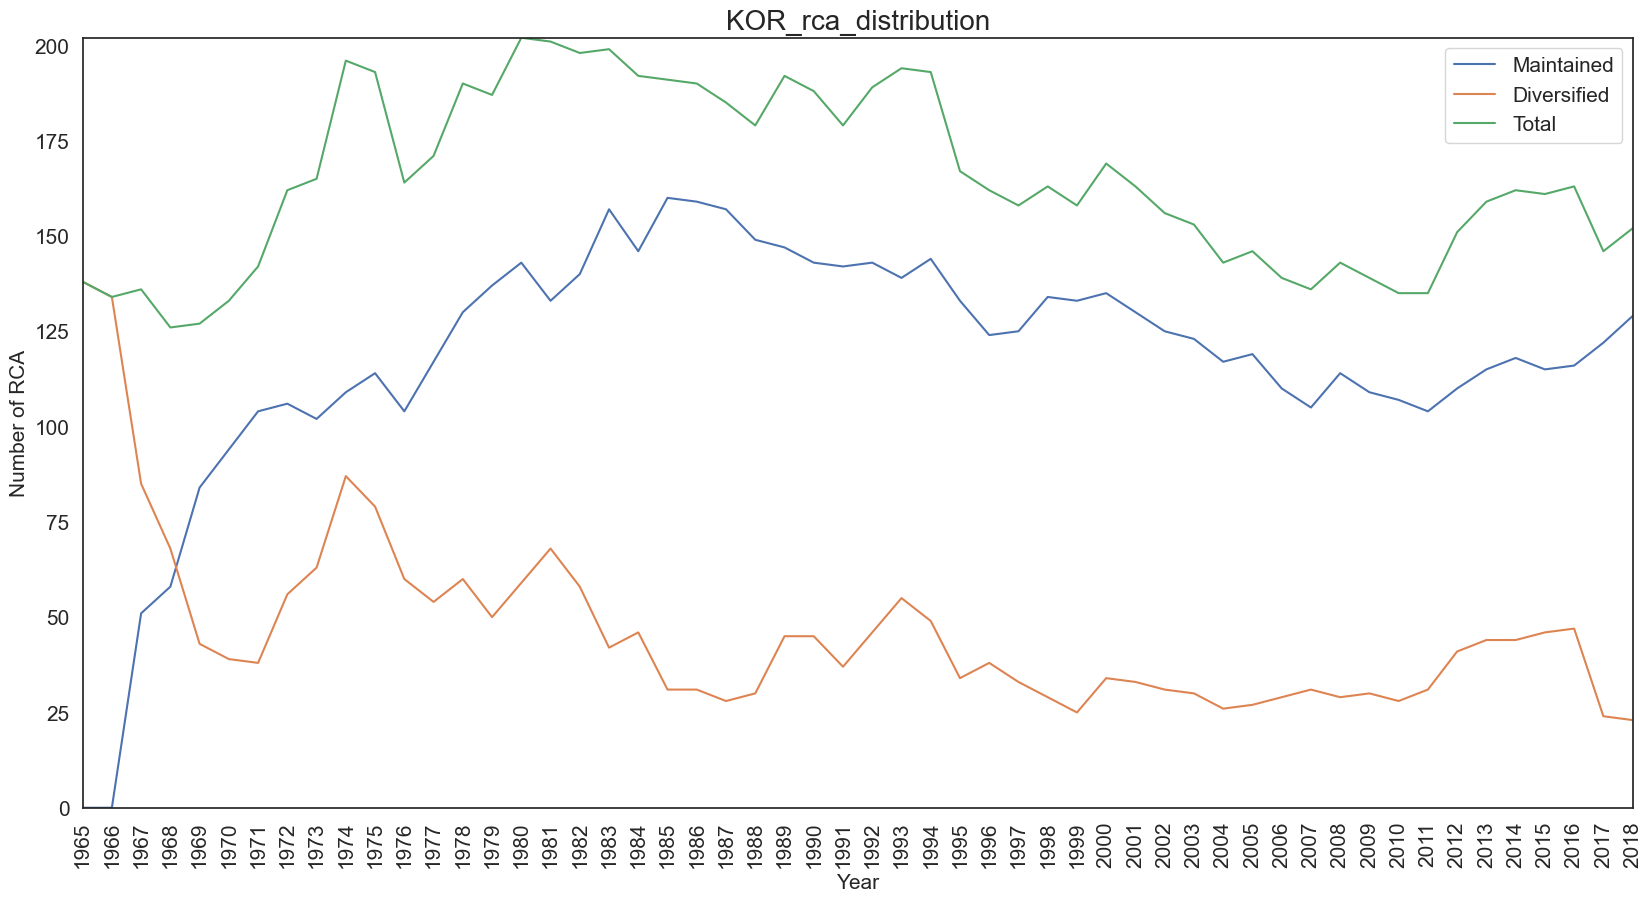

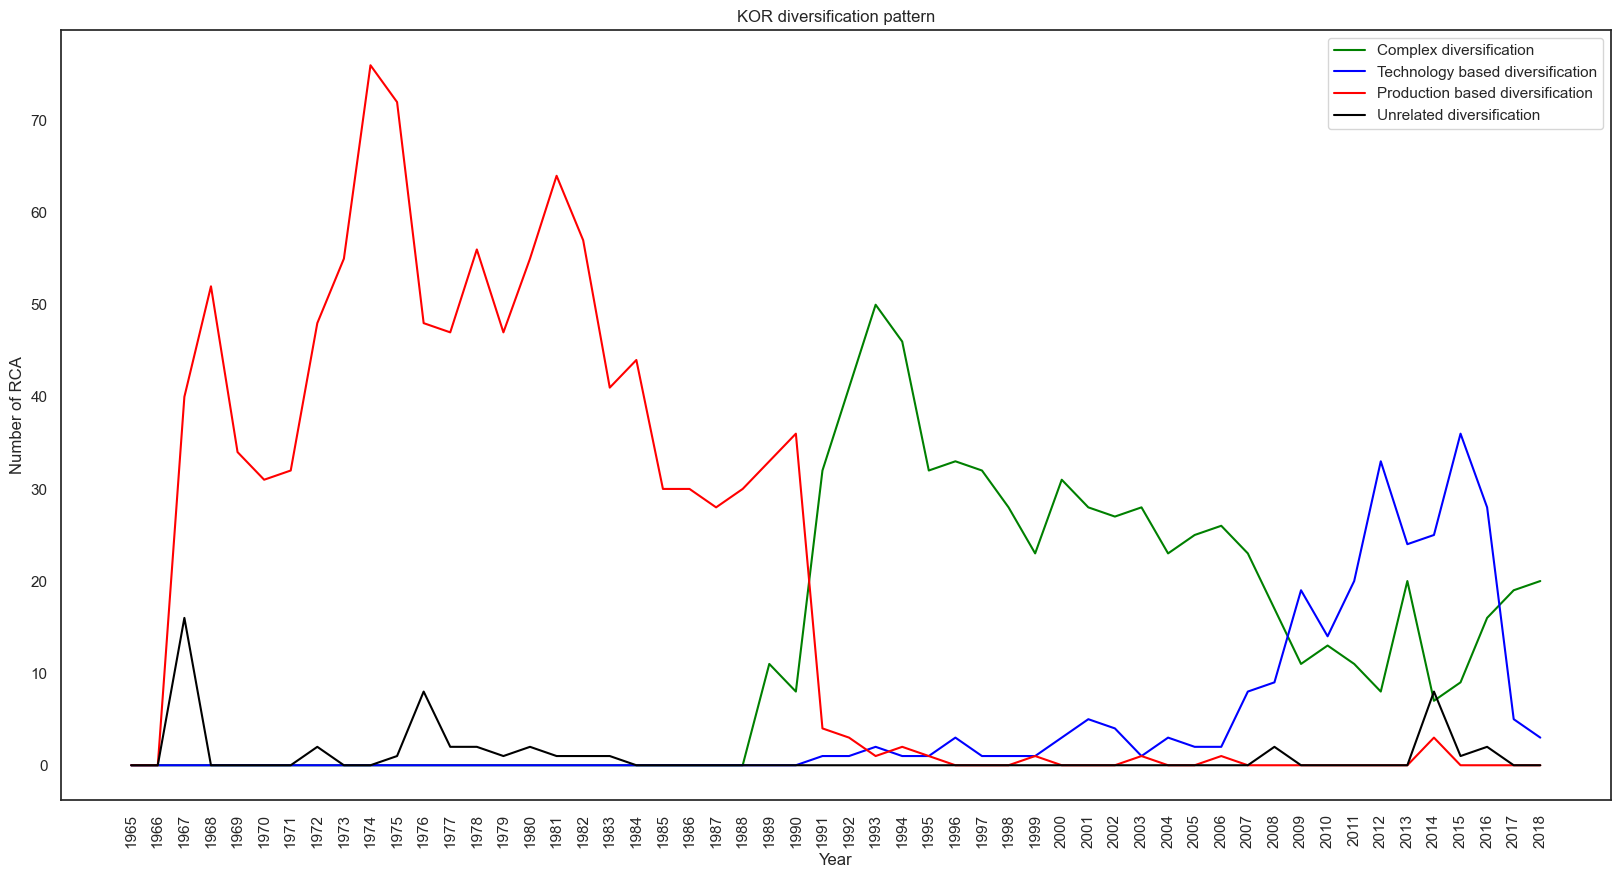

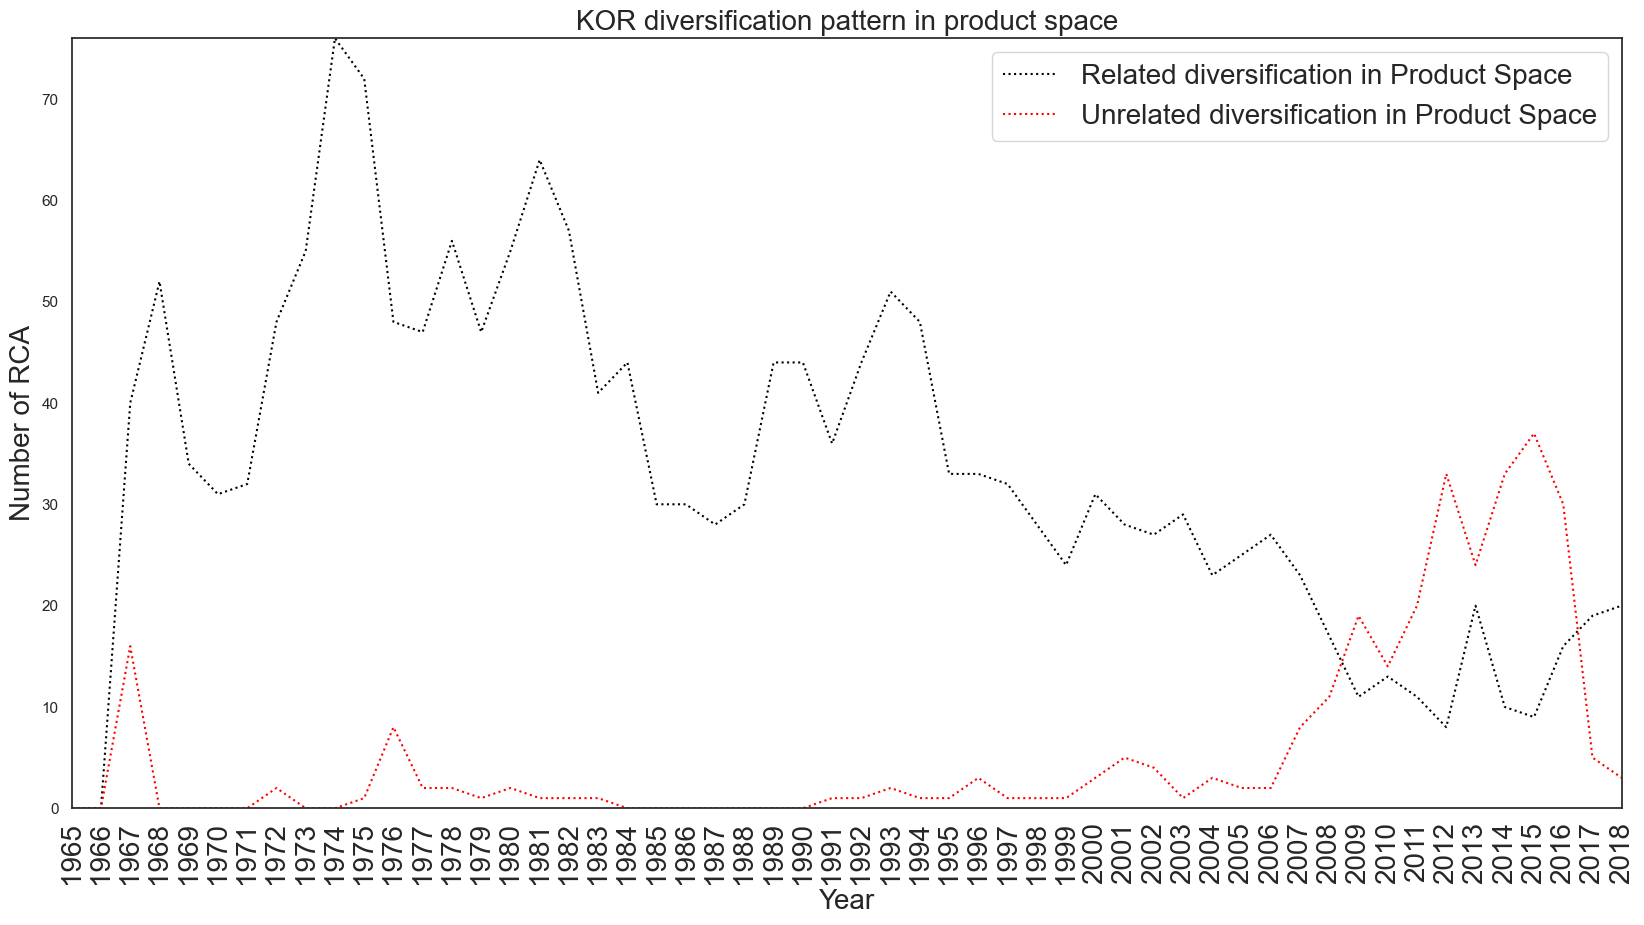

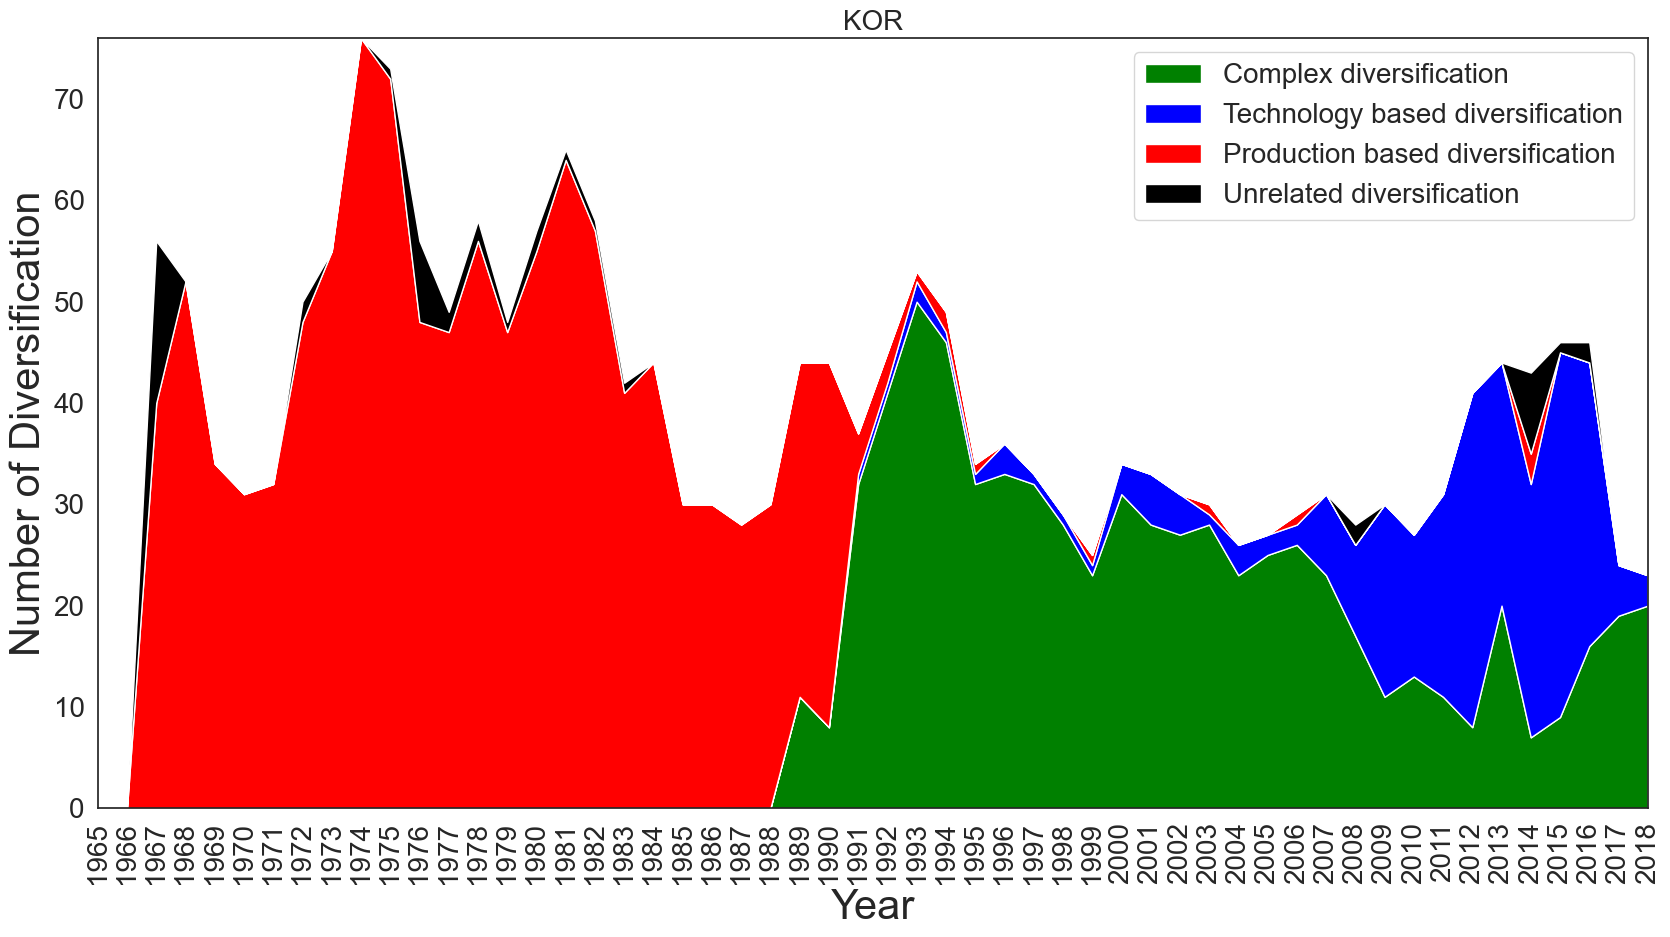

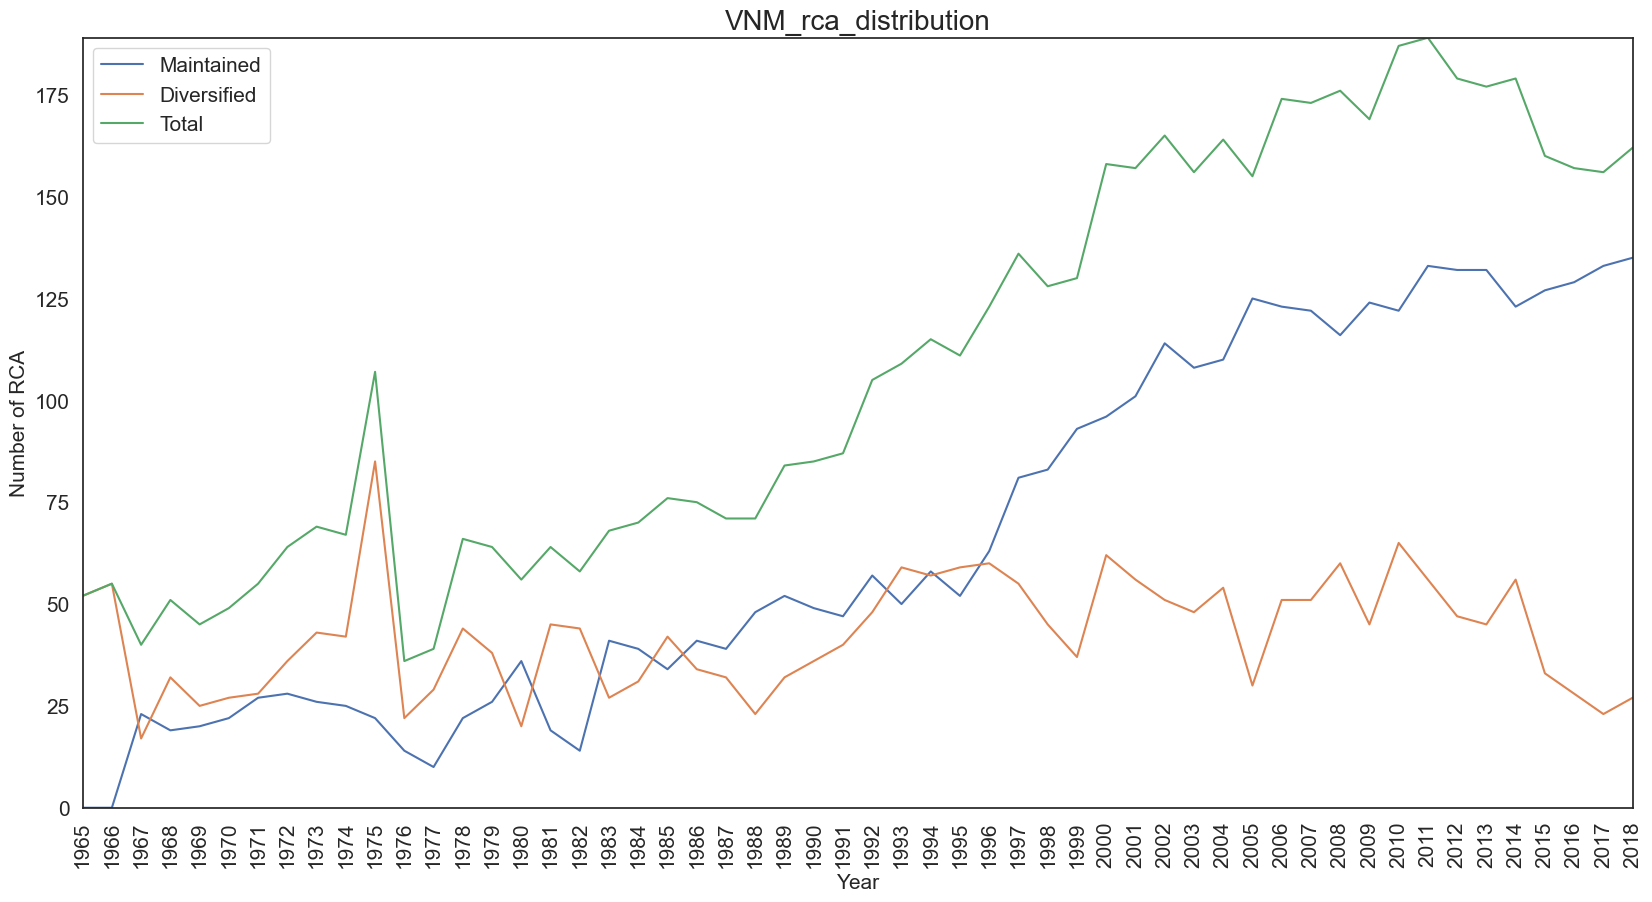

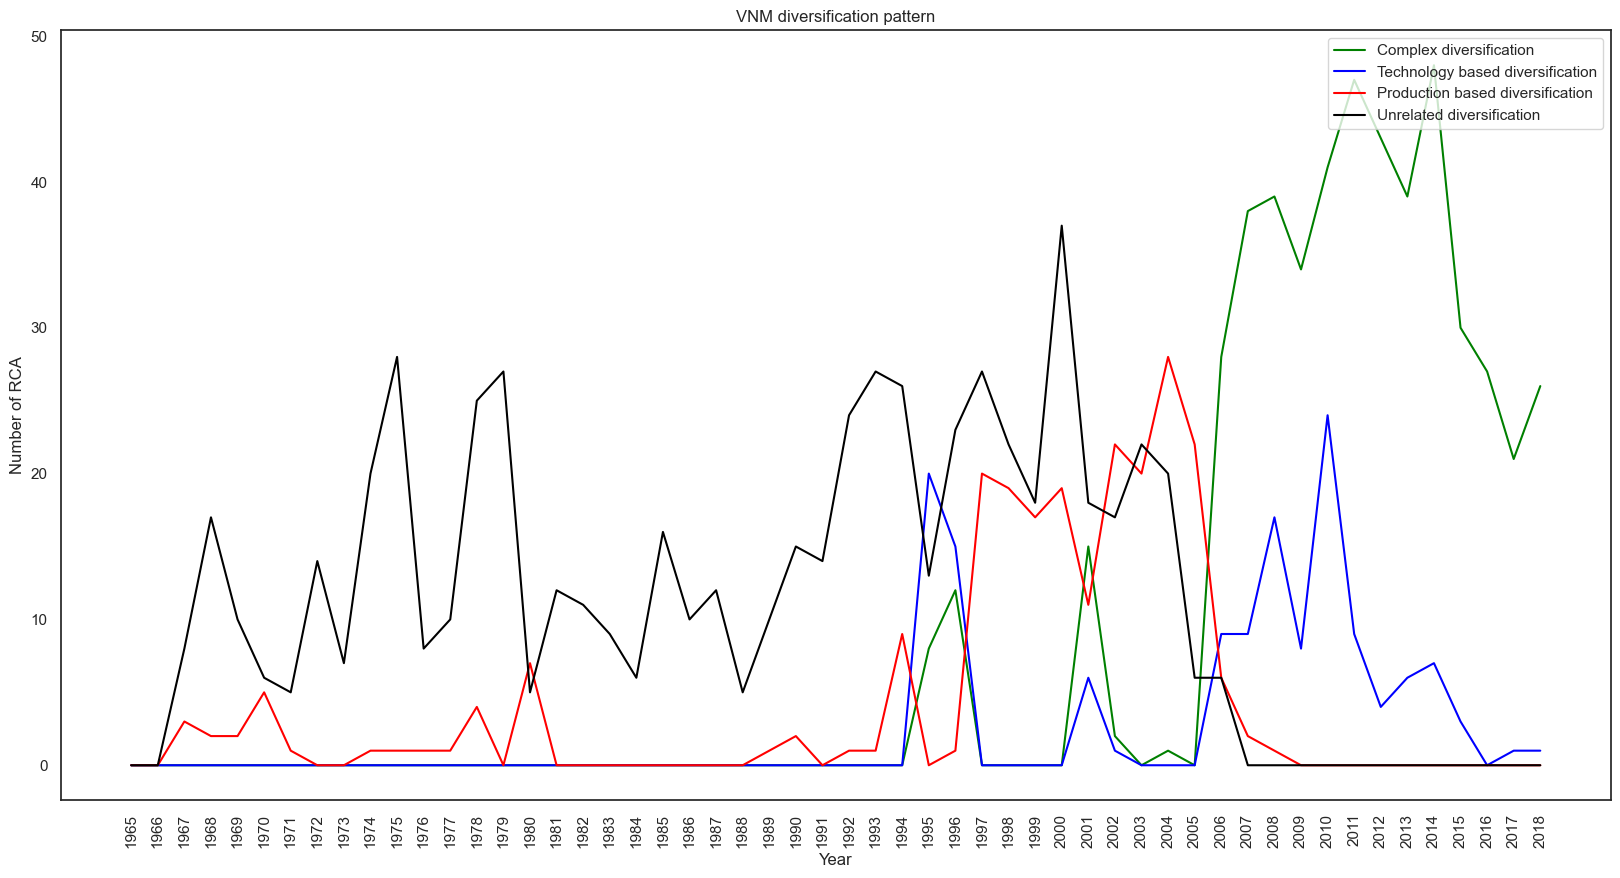

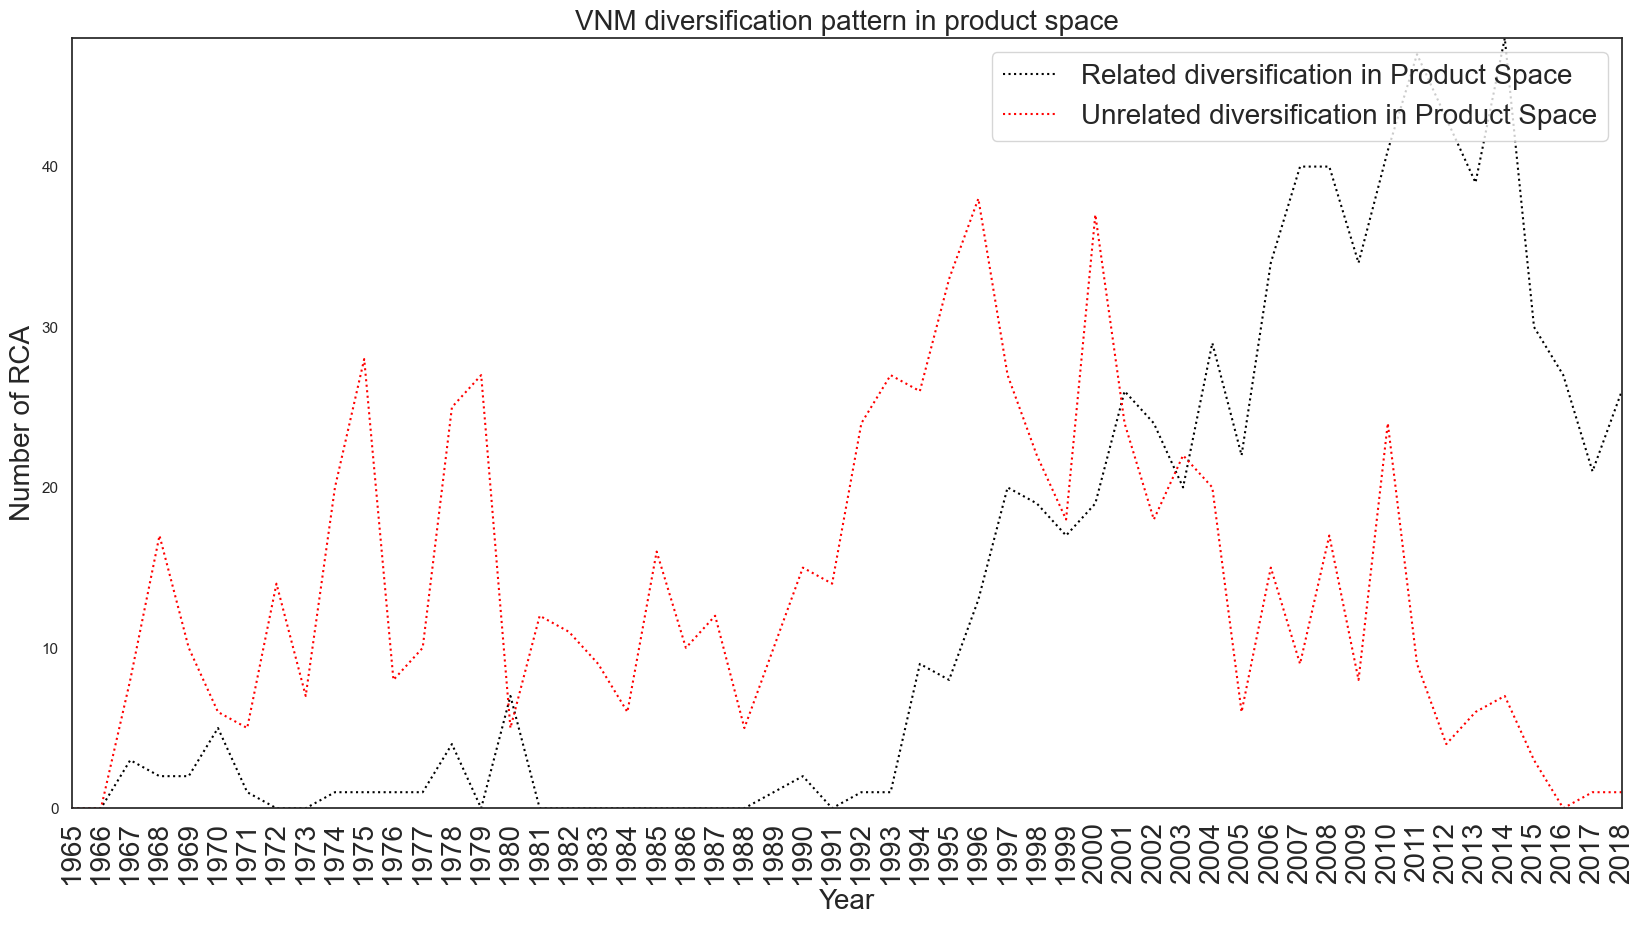

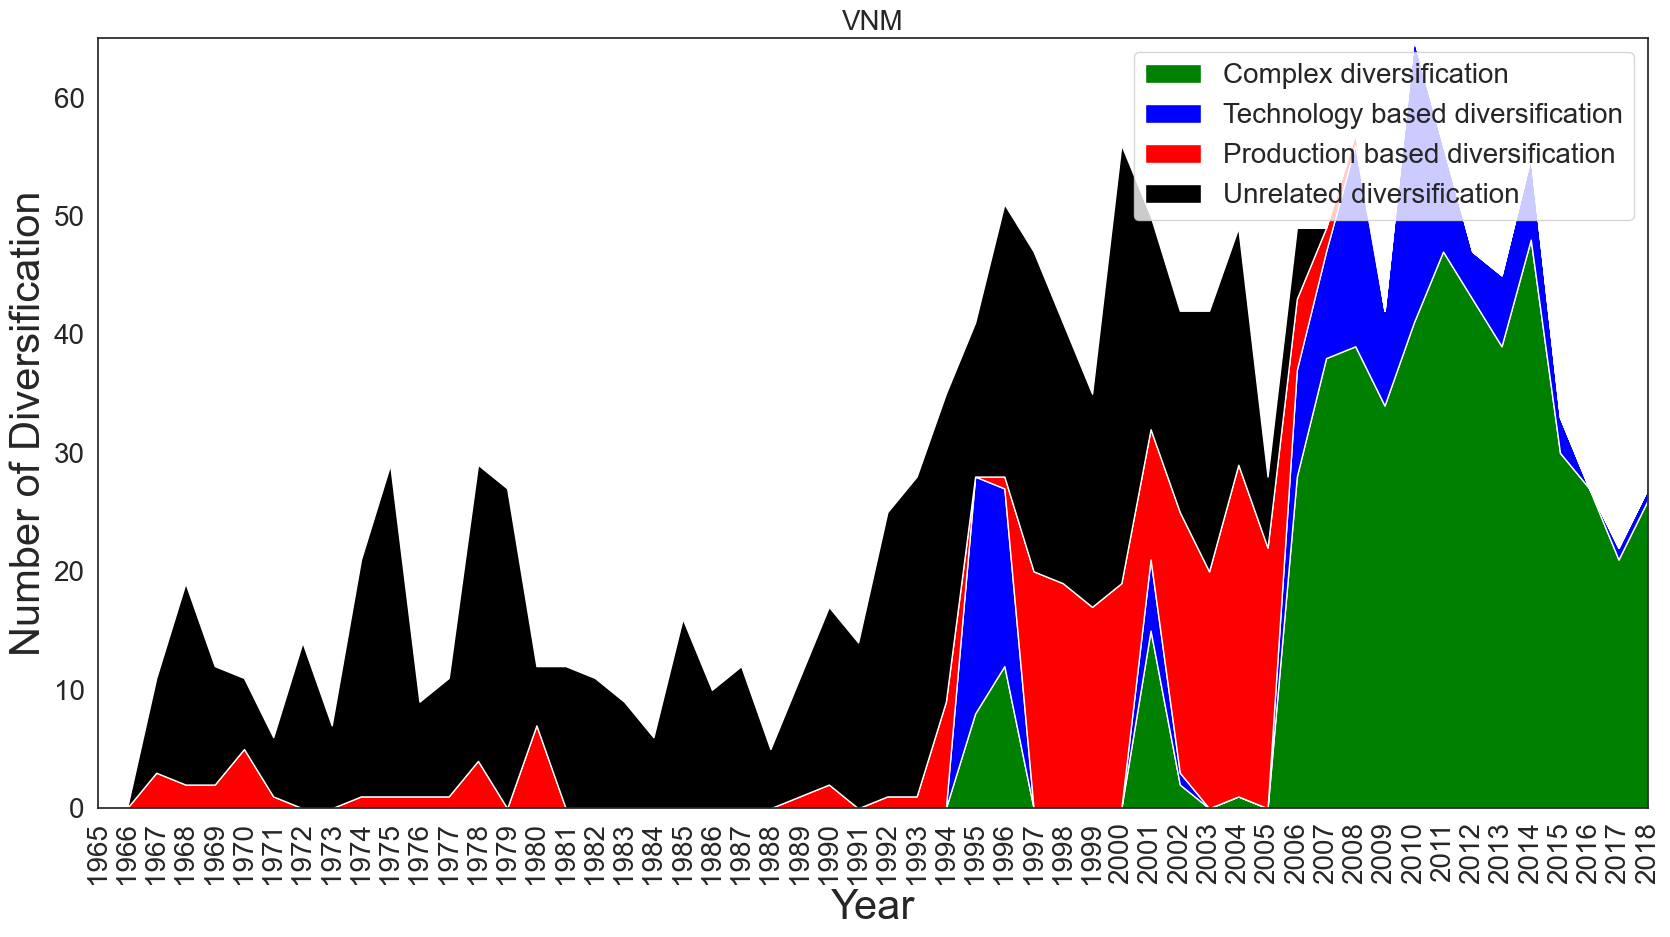

In [ ]:
country_names=list(set([country.name for country in country_list]))
#for temp_country_name in tqdm(country_names):
for temp_country_name in tqdm(['KOR',"VNM"]):
  rca_distribution(temp_country_name)
  diversification_pattern(temp_country_name)
  diversification_pattern_stacked(temp_country_name)

## Diversification Probability

In [ ]:
temp_VNM=[country for country in country_list if country.name=="VNM" if country.year==2018][0]
temp_VNM.GDP_per_capita
temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita>=temp_VNM.GDP_per_capita*0.8 if country.GDP_per_capita<=country.GDP_per_capita*1.2]
len(temp_countries)

In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_VNM=[country for country in country_list if country.name=="VNM" if country.year==2018][0]
temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita<temp_VNM.GDP_per_capita*0.5]
print(len(temp_countries))

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)

In [ ]:
len(temp_list_D)

In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_VNM=[country for country in country_list if country.name=="VNM" if country.year==2018][0]
temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita>=temp_VNM.GDP_per_capita*0.5 if country.GDP_per_capita<=temp_country.GDP_per_capita*1.5]
print(len(temp_countries))

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)

In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_VNM=[country for country in country_list if country.name=="VNM" if country.year==2018][0]
temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita>temp_VNM.GDP_per_capita*1.5]
print(len(temp_countries))

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_VNM=[country for country in country_list if country.name=="VNM" if country.year==2018][0]
temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita<temp_VNM.GDP_per_capita*0.5]
for temp_country in temp_countries:
    if temp_country.diversification_dict:
        if temp_country.diversification_dict['diversified']:
            temp_list_UD.append(len(temp_country.diversification_dict['Unrelated diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_PD.append(len(temp_country.diversification_dict['Production based diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_TD.append(len(temp_country.diversification_dict['Technology based diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_CD.append(len(temp_country.diversification_dict['Complex diversification'])/len(temp_country.diversification_dict['diversified']))

labels=['Unrelated\ndiversification','Production\nbased\ndiversification','Technology\nbased\ndiversification','Complex\ndiversification']
box=ax.boxplot([temp_list_UD,temp_list_PD,temp_list_TD,temp_list_CD],labels=labels,notch=True,whis=0.1,patch_artist=True)

ax.set_xlabel("Diversification Type",fontsize=30)
ax.set_ylabel("Diversification Probability",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

plt.savefig(output_path+"/Diversification_Probability box plot lower than VNM.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita>=temp_VNM.GDP_per_capita*0.5 if country.GDP_per_capita<=temp_country.GDP_per_capita*1.5]
for temp_country in temp_countries:
    if temp_country.diversification_dict:
        if temp_country.diversification_dict['diversified']:
            temp_list_UD.append(len(temp_country.diversification_dict['Unrelated diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_PD.append(len(temp_country.diversification_dict['Production based diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_TD.append(len(temp_country.diversification_dict['Technology based diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_CD.append(len(temp_country.diversification_dict['Complex diversification'])/len(temp_country.diversification_dict['diversified']))

labels=['Unrelated\ndiversification','Production\nbased\ndiversification','Technology\nbased\ndiversification','Complex\ndiversification']
box=ax.boxplot([temp_list_UD,temp_list_PD,temp_list_TD,temp_list_CD],labels=labels,notch=True,whis=0.1,patch_artist=True)

ax.set_xlabel("Diversification Type",fontsize=30)
ax.set_ylabel("Diversification Probability",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

plt.savefig(output_path+"/Diversification_Probability box plot similar to VNM.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.GDP_per_capita if country.GDP_per_capita>temp_VNM.GDP_per_capita*1.5]
for temp_country in temp_countries:
    if temp_country.diversification_dict:
        if temp_country.diversification_dict['diversified']:
            temp_list_UD.append(len(temp_country.diversification_dict['Unrelated diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_PD.append(len(temp_country.diversification_dict['Production based diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_TD.append(len(temp_country.diversification_dict['Technology based diversification'])/len(temp_country.diversification_dict['diversified']))
            temp_list_CD.append(len(temp_country.diversification_dict['Complex diversification'])/len(temp_country.diversification_dict['diversified']))

labels=['Unrelated\ndiversification','Production\nbased\ndiversification','Technology\nbased\ndiversification','Complex\ndiversification']
box=ax.boxplot([temp_list_UD,temp_list_PD,temp_list_TD,temp_list_CD],labels=labels,notch=True,whis=0.1,patch_artist=True)

ax.set_xlabel("Diversification Type",fontsize=30)
ax.set_ylabel("Diversification Probability",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

plt.savefig(output_path+"/Diversification_Probability box plot higher than VNM.jpg",dpi=600,transparent=True,bbox_inches="tight")

## Diversification and National Development

In [ ]:
import math

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

temp_list_1=[]
temp_list_2=[]
temp_diversification_type='Unrelated diversification'
for country in country_list:
    previous_country=[item for item in country_list if item.year==country.year-1 if item.name==country.name]
    if previous_country:
        previous_country=previous_country[0]
        if sum(previous_country.export_dict.values())>0:
            if country.GDP_per_capita and country.diversification_dict and country.diversification_dict[temp_diversification_type]:
                temp_list_2.append(len(country.diversification_dict[temp_diversification_type]))
                temp_list_1.append((country.GDP_per_capita))
ax.scatter(temp_list_1,temp_list_2,color='black',label='Unrelated diversification')

temp_list_1=[]
temp_list_2=[]
temp_diversification_type='Complex diversification'
for country in country_list:
    if country.GDP_per_capita and country.diversification_dict and country.diversification_dict[temp_diversification_type]:
        temp_list_2.append(len(country.diversification_dict[temp_diversification_type]))
        temp_list_1.append((country.GDP_per_capita))
ax.scatter(temp_list_1,temp_list_2,color='green',label='Complex diversification')

temp_list_1=[]
temp_list_2=[]
temp_diversification_type='Technology based diversification'
for country in country_list:
    if country.GDP_per_capita and country.diversification_dict and country.diversification_dict[temp_diversification_type]:
        temp_list_2.append(len(country.diversification_dict[temp_diversification_type]))
        temp_list_1.append((country.GDP_per_capita))
ax.scatter(temp_list_1,temp_list_2,color='blue',label=temp_diversification_type)

temp_list_1=[]
temp_list_2=[]
temp_diversification_type='Production based diversification'
for country in country_list:
    if country.GDP_per_capita and country.diversification_dict and country.diversification_dict[temp_diversification_type]:
        temp_list_2.append(len(country.diversification_dict[temp_diversification_type]))
        temp_list_1.append((country.GDP_per_capita))
ax.scatter(temp_list_1,temp_list_2,color='red',label=temp_diversification_type)

In [ ]:
import math

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]
temp_list_5=[]

for country in country_list:
    previous_country=[item for item in country_list if item.year==country.year-5 if item.name==country.name]
    if previous_country:
        previous_country=previous_country[0]
        if sum(previous_country.export_dict.values())>0:
            if country.GDP_per_capita and country.diversification_dict:
                temp_list_1.append((country.GDP_per_capita))
                temp_list_2.append(len(country.diversification_dict['Unrelated diversification']))
                temp_list_3.append(len(country.diversification_dict['Complex diversification']))
                temp_list_4.append(len(country.diversification_dict['Technology based diversification']))
                temp_list_5.append(len(country.diversification_dict['Production based diversification']))

ax.scatter(temp_list_1,temp_list_2,color='black')
ax.scatter(temp_list_1,temp_list_3,color='green')
ax.scatter(temp_list_1,temp_list_4,color='blue')
ax.scatter(temp_list_1,temp_list_5,color='red')

In [ ]:
import math

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]
temp_list_5=[]
temp_list_6=[]
temp_list_7=[]

temp_df=pd.DataFrame()
for country in country_list:
    previous_country=[item for item in country_list if item.year==country.year-5 if item.name==country.name]
    if previous_country:
        previous_country=previous_country[0]
        if sum(previous_country.export_dict.values())>0:
            if country.GDP_per_capita and country.diversification_dict:
                temp_list_1.append(country.name)
                temp_list_2.append(country.year)
                temp_list_3.append((country.GDP_per_capita))
                temp_list_4.append(len(country.diversification_dict['Unrelated diversification']))
                temp_list_5.append(len(country.diversification_dict['Complex diversification']))
                temp_list_6.append(len(country.diversification_dict['Technology based diversification']))
                temp_list_7.append(len(country.diversification_dict['Production based diversification']))

temp_df['Country']=temp_list_1
temp_df['Year']=temp_list_2
temp_df['GDP_per_capita']=temp_list_3
temp_df['Unrelated diversification']=temp_list_4
temp_df['Complex diversification']=temp_list_5
temp_df['Technology based diversification']=temp_list_6
temp_df['Production based diversification']=temp_list_7

In [ ]:
temp_df=temp_df.sort_values(by=['GDP_per_capita'],ascending=True)
temp_df.reset_index(inplace=True,drop=True)
temp_df.tail()

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

#sns.histplot(data = temp_list_1, color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_2, color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_3, color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_4, color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)

sns.distplot(temp_list_1, kde=False, norm_hist=True, fit=sp.stats.beta,color='black')
sns.distplot(temp_list_2, kde=False, norm_hist=True, fit=sp.stats.beta,color='green')
sns.distplot(temp_list_3, kde=False, norm_hist=True, fit=sp.stats.beta,color='blue')
sns.distplot(temp_list_4, kde=False, norm_hist=True, fit=sp.stats.beta,color='red')


ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Probability")

#sns.distplot(temp_list_1,color='black',alpha=0.3)
#sns.distplot(temp_list_2,color='green',alpha=0.3)
#sns.distplot(temp_list_3,color='blue',alpha=0.3)
#sns.distplot(temp_list_4,color='red',alpha=0.3)


In [ ]:
temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

sns.kdeplot(temp_list_2, color="green",label='Complex diversification')
sns.kdeplot(temp_list_3, color="blue",label='Technology based diversification')
sns.kdeplot(temp_list_4, color="red",label='Production based diversification')
sns.kdeplot(temp_list_1, color="black",label='Unrelated diversification')

ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Probability")
ax.legend(fontsize=20)

#sns.distplot(temp_list_1,color='black',alpha=0.3)
#sns.distplot(temp_list_2,color='green',alpha=0.3)
#sns.distplot(temp_list_3,color='blue',alpha=0.3)
#sns.distplot(temp_list_4,color='red',alpha=0.3)


In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

sns.histplot(data = temp_list_1, color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
sns.histplot(data = temp_list_2, color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
sns.histplot(data = temp_list_3, color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
sns.histplot(data = temp_list_4, color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.set_xlabel("GDP per Capita",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper right",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

#sns.histplot(data = temp_list_1, color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_2, color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_3, color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_4, color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)

sns.kdeplot(temp_list_1, color='black', alpha=0.3, fill=True)
sns.kdeplot(temp_list_2, color="green",alpha=0.3,fill=True)
sns.kdeplot(temp_list_3, color="blue",alpha=0.3,fill=True)
sns.kdeplot(temp_list_4, color="red",alpha=0.3,fill=True)

ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Probability Density")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper right",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density_kde.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

#sns.histplot(data = temp_list_1, color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_2, color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_3, color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
#sns.histplot(data = temp_list_4, color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)

sns.kdeplot(temp_list_1, color='black', alpha=1, fill=False, lw=5)
sns.kdeplot(temp_list_2, color="green",alpha=1,fill=False, lw=5)
sns.kdeplot(temp_list_3, color="blue",alpha=1,fill=False, lw=5)
sns.kdeplot(temp_list_4, color="red",alpha=1,fill=False, lw=5)

ax.set_xlabel("GDP per Capita",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper right",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density__line_kde.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

sns.histplot(data = temp_list_1, color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)
sns.histplot(data = temp_list_2, color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)
sns.histplot(data = temp_list_3, color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)
sns.histplot(data = temp_list_4, color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.set_xlabel("GDP per Capita",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper right",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

sns.histplot(data = [math.log(x) for x in temp_list_1], color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)
sns.histplot(data = [math.log(x) for x in temp_list_2], color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)
sns.histplot(data = [math.log(x) for x in temp_list_3], color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)
sns.histplot(data = [math.log(x) for x in temp_list_4], color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100,linewidth=2)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.set_xlabel("log(GDP per Capita)",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper right",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density_log scale.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df)):
    for i in range(temp_df.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df.loc[index,"GDP_per_capita"])
    for i in range(temp_df.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

bw_adjust=5
sns.kdeplot(data = [math.log(x) for x in temp_list_1], color="black", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)
sns.kdeplot(data = [math.log(x) for x in temp_list_2], color="green", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)
sns.kdeplot(data = [math.log(x) for x in temp_list_3], color="blue", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)
sns.kdeplot(data = [math.log(x) for x in temp_list_4], color="red", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.set_xlabel("log(GDP per Capita)",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper left",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density_log scale2.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
temp_df2=temp_df[temp_df["GDP_per_capita"]<=80000]
temp_df2.reset_index(inplace=True,drop=True)
len(temp_df2)

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

for index in range(len(temp_df2)):
    for i in range(temp_df2.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df2.loc[index,"GDP_per_capita"])
    for i in range(temp_df2.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df2.loc[index,"GDP_per_capita"])
    for i in range(temp_df2.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df2.loc[index,"GDP_per_capita"])
    for i in range(temp_df2.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df2.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

bw_adjust=5
unrelated_kde=sns.kdeplot(data = [math.log(x) for x in temp_list_1], color="black", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)
complex_kde=sns.kdeplot(data = [math.log(x) for x in temp_list_2], color="green", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)
technology_kde=sns.kdeplot(data = [math.log(x) for x in temp_list_3], color="blue", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)
production_kde=sns.kdeplot(data = [math.log(x) for x in temp_list_4], color="red", alpha=1, fill=False, lw=5,bw_adjust=bw_adjust)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.set_xlabel("log(GDP per Capita)",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper left",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density_log scale_max 80000.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_df3=pd.DataFrame()

temp_list_1=[]
temp_list_2=[]

for index in range(len(temp_df2)):
    for i in range(temp_df2.loc[index,'Unrelated diversification']):
        temp_list_1.append(math.log(temp_df2.loc[index,"GDP_per_capita"]))
        temp_list_2.append('Unrelated diversification')
    for i in range(temp_df2.loc[index,'Complex diversification']):
        temp_list_1.append(math.log(temp_df2.loc[index,"GDP_per_capita"]))
        temp_list_2.append('Complex diversification')
    for i in range(temp_df2.loc[index,'Technology based diversification']):
        temp_list_1.append(math.log(temp_df2.loc[index,"GDP_per_capita"]))
        temp_list_2.append('Technology based diversification')
    for i in range(temp_df2.loc[index,'Production based diversification']):
        temp_list_1.append(math.log(temp_df2.loc[index,"GDP_per_capita"]))
        temp_list_2.append('Production based diversification')

temp_df3["GDP per capita (log)"]=temp_list_1
temp_df3["Diversification type"]=temp_list_2

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

ax.set_xlabel("log(GDP per Capita)",fontsize=30)
ax.set_ylabel("Probability Density (Proportion)",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

hue_order=["Complex diversification","Technology based diversification","Production based diversification","Unrelated diversification"]
sns.kdeplot(data=temp_df3,x="GDP per capita (log)",hue="Diversification type",multiple='fill',hue_order=hue_order,palette=['green','blue','red','black'],ax=ax,bw_adjust=bw_adjust)

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper left",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density_log scale_max 80000_stacked.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
import scipy as sp

temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
temp_list_4=[]

temp_df_country=temp_df[temp_df["Country"]=="VNM"]
temp_df_country.reset_index(inplace=True,drop=True)

for index in range(len(temp_df_country)):
    for i in range(temp_df_country.loc[index,'Unrelated diversification']):
        temp_list_1.append(temp_df_country.loc[index,"GDP_per_capita"])
    for i in range(temp_df_country.loc[index,'Complex diversification']):
        temp_list_2.append(temp_df_country.loc[index,"GDP_per_capita"])
    for i in range(temp_df_country.loc[index,'Technology based diversification']):
        temp_list_3.append(temp_df_country.loc[index,"GDP_per_capita"])
    for i in range(temp_df_country.loc[index,'Production based diversification']):
        temp_list_4.append(temp_df_country.loc[index,"GDP_per_capita"])

fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

sns.histplot(data = temp_list_1, color="black",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
sns.histplot(data = temp_list_2, color="green",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
sns.histplot(data = temp_list_3, color="blue",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)
sns.histplot(data = temp_list_4, color="red",stat = "probability",alpha=0.3,kde=True,element='step',bins=100)

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='green', length_includes_head=True,label='Complex diversification')
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label='Technology based diversification')
arr3 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label='Production based diversification')
arr4 = ax.arrow(0,0, 0,0, head_width=0, color='black', length_includes_head=True,label='Unrelated diversification')

ax.set_xlabel("GDP per Capita",fontsize=30)
ax.set_ylabel("Probability Density",fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend([arr1,arr2,arr3,arr4],['Complex diversification','Technology based diversification','Production based diversification','Unrelated diversification'],loc="upper right",fontsize=20)

plt.savefig(output_path+"/Diversification_Probability Density.jpg",dpi=600,transparent=True,bbox_inches="tight")

In [ ]:
정다운

## Scenario

In [ ]:
temp_country=[country for country in country_list if country.name=='VNM' if country.year==2018][0]
sorted(temp_country.rca_dict.items(), key=lambda item:-item[1])

In [ ]:
temp_country=[country for country in country_list if country.name=='VNM' if country.year==2018][0]
sorted(temp_country.rta_dict.items(), key=lambda item:-item[1])

In [ ]:
"""
fig=plt.figure(figsize=(20,10))
ax=plt.subplot(111)

temp_list1=[]
temp_list2=[]

for year in temp_years:
    try:
      temp_list1.append(np.sum(vnm_patent_df.loc[year]))
      temp_df=patent_df[patent_df['LOCATION']=='KOR']
      temp_df=temp_df[temp_df["TIME"]==year-36]
      temp_list2.append(np.sum(temp_df["Value"]))
    except:
      temp_list1.append(0)
      temp_list2.append(0)

bars=ax.bar(temp_years,temp_list1,color='red',align='edge',width=-0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list1[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)

bars=ax.bar(temp_years,temp_list2,color='blue',align='edge',width=0.25,alpha=0.5)
ax.tick_params(
    axis="x",width=1,direction="in",labelsize=10
)
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1,format(temp_list2[i],".2f"),ha='center',fontsize=10,fontweight="bold",rotation=90)


ax.set_xticks(temp_years)
ax.set_xticklabels(temp_years,rotation=90)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Patents")

arr1 = ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="Resident",alpha=0.5)
arr2 = ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="Non-Resident",alpha=0.5)
ax.legend([arr1,arr2],["Vietnam patents at the year $t$","Korea patents at the year $t-37$"],loc="upper left",fontsize=20)
ax.spines['top'].set_visible(False)
plt.savefig(output_path+"/Patents of VNM vs. KOR (before 37yr).jpg",dpi=300,transparent=True,bbox_inches="tight")
"""

In [ ]:
df=pd.read_csv(input+r'\country_sitcproduct4digit_year.csv')
df['sitc_product_code']=df['sitc_product_code'].astype(str)
df=df[df["year"].isin(year_list)]

pci_dict={}
for year in year_list:
    pci_dict[year]={}
    temp_df=df[df["year"]==year]
    temp_df.reset_index(inplace=True,drop=True)
    pci_dict[year]=dict(zip(temp_df["sitc_product_code"],temp_df["pci"]))


In [ ]:
sitc_dictionary_df=pd.read_csv(r'E:\이게 WB 과제 진짜 마지막\Input\sitc_product.tab',delimiter='\t')
temp_sitc_name_dict=dict(zip(
    sitc_dictionary_df[sitc_dictionary_df['level']=='4digit']['sitc_product_code'],
    sitc_dictionary_df[sitc_dictionary_df['level']=='4digit']['sitc_product_name_short_en']
))

# 정수 코드 아닌애들 제거
error_list=[]
for key in temp_sitc_name_dict.keys():
    try:
        int(key)
    except:
        error_list.append(key)
temp_sitc_name_dict={int(n):temp_sitc_name_dict[n] for n in temp_sitc_name_dict.keys() if n not in error_list}
"""
temp_dict={}
for key in temp_sitc_name_dict.keys():
    temp_value=temp_sitc_name_dict[key]
    if len(str(key))==2:
        key=str(00)+str(key)
    if len(str(key))==3:
        key=str(0)+str(key)
    else:
        key=str(key)
    temp_dict[key]=temp_value
temp_sitc_name_dict=temp_dict
"""
temp_sitc_name_dict


In [ ]:
TCI_dict_df=pd.read_csv(r'E:\이게 WB 과제 진짜 마지막\Input\TCI_dict_230902.csv')
TCI_dict_df["IPC code"]=TCI_dict_df["IPC code"].astype(str)
TCI_dict={}
for year in year_list:
    TCI_dict[year]={}
    temp_df=TCI_dict_df[TCI_dict_df["Year"]==year]
    temp_df.reset_index(inplace=True,drop=True)
    TCI_dict[year]=dict(zip(temp_df["IPC code"],temp_df["TCI"]))

Product Complexity - Production Density

In [ ]:
temp_countries=[country for country in country_list if country.name in ["KOR","VNM","USA","CHN","JPN"]]
#temp_countries=[country for country in country_list if country.name in ["VNM"]]
for temp_country in tqdm(temp_countries):
    temp_year=temp_country.year
    if temp_year>=1965:
        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in pci_dict[temp_year].keys() if str(pci_dict[temp_year][sitc])!='nan' if sitc in temp_country.coevolutionary_density_dict.keys()]
        temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            else:
                colors.append('blue')

        ax.scatter([temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                [(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                alpha=[1 for sitc in temp_sitcs],
                color=colors
                )

        ax.set_xlabel("Production Density",fontsize=20)
        ax.set_ylabel("Product Compleixty (Max - Min Scale)",fontsize=20)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        temp_title="%s's Product Complexity - Production Density %s"%(str(temp_country.name),str(temp_year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
        clear_output()
        #except:
        #    pass

Production Density - Coevolutionary Density from technology

In [ ]:
temp_countries=[country for country in country_list if country.name in ["KOR","VNM","USA","CHN","JPN","IDN","IND"]]
#temp_countries=[country for country in country_list if country.name in ["KOR","VNM"]]
for temp_country in tqdm(temp_countries):
    temp_year=temp_country.year
    if temp_year>=1965:

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if str(pci_dict[temp_year][sitc])!='nan']
        temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry %s"%(str(temp_country.name),str(temp_year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
        clear_output()

    #except:
    #    pass

Technology Complexity - Coevolutionary Density from production

In [ ]:
temp_sheet_names=["A","B","C","D","E","F","G","H"]
temp_ipc_dict={}
for item in temp_sheet_names:
    ipc_dict_df=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name=item)
    for index in range(len(ipc_dict_df)):
        if len(ipc_dict_df.loc[index,"코드"])==4:
            temp_ipc_dict[ipc_dict_df.loc[index,"코드"]]=ipc_dict_df.loc[index,"영문 타이틀"]

In [ ]:
temp_countries=[country for country in country_list if country.name in ["KOR","VNM","IDN","IND","CHN"]]
#temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [1980,1985,1990,1995,2000]]
#temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [1985]]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        if temp_year==1980:
            temp_ipcs=[ipc for ipc in temp_country.technology_density_dict.keys() if ipc in temp_country.coevolutionary_density_dict.keys() if temp_country.coevolutionary_density_dict[ipc] if ipc in TCI_dict[temp_year].keys() if str(TCI_dict[temp_year][ipc])!='nan' if ipc in temp_country.coevolutionary_density_dict.keys() if ipc!='B62H'] # if ipc!='B62H'
        else:
            temp_ipcs=[ipc for ipc in temp_country.technology_density_dict.keys() if ipc in temp_country.coevolutionary_density_dict.keys() if temp_country.coevolutionary_density_dict[ipc] if ipc in TCI_dict[temp_year].keys() if str(TCI_dict[temp_year][ipc])!='nan' if ipc in temp_country.coevolutionary_density_dict.keys()] # if ipc!='B62H'


        temp_max=max([TCI_dict[temp_year][ipc] for ipc in temp_ipcs])
        temp_min=min([TCI_dict[temp_year][ipc] for ipc in temp_ipcs])

        colors=[]
        for ipc in temp_ipcs:
            if temp_country.rta_dict[ipc]>1:
                colors.append('red')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[ipc] for ipc in temp_ipcs],
                [(TCI_dict[temp_year][ipc]-temp_min)/(temp_max-temp_min) for ipc in temp_ipcs],
                alpha=[1 for ipc in temp_ipcs],
                color=colors
                )

        ax.set_ylabel("Technology Complexity (Max - Min Scale)")
        ax.set_xlabel("Coevolutionary Density from Production")
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        temp_title="%s's Technology Complexity - Coevolutionary Density from Production for technology %s"%(str(temp_country.name),str(temp_year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RTA of IPC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RTA of IPC code =< 1")
        )
        ax.legend(temp_arr_list,["RTA of IPC code > 1",'RTA of IPC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
        clear_output()

    except:
        pass

한국의 성공사례 (1980)

In [ ]:
temp_data={}

temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [year for year in range(1960,1970)]]

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)
temp_data['1960s']=[len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)]


In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [year for year in range(1970,1980)]]

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)
temp_data['1970s']=[len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)]


In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [year for year in range(1980,1990)]]

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)
temp_data['1980s']=[len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)]


In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [year for year in range(1990,2000)]]

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)
temp_data['1990s']=[len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)]

In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [year for year in range(2000,2010)]]

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)
temp_data['2000s']=[len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)]

In [ ]:
temp_list_UD=[]
temp_list_PD=[]
temp_list_TD=[]
temp_list_CD=[]
temp_list_D=[]

temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [year for year in range(2010,2019)]]

for temp_country in temp_countries:
    if temp_country.diversification_dict:
        temp_list_D+=temp_country.diversification_dict['diversified']
        temp_list_UD+=temp_country.diversification_dict['Unrelated diversification']
        temp_list_PD+=temp_country.diversification_dict['Production based diversification']
        temp_list_TD+=temp_country.diversification_dict['Technology based diversification']
        temp_list_CD+=temp_country.diversification_dict['Complex diversification']

len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)
temp_data['2010s']=[len(temp_list_UD)/len(temp_list_D),len(temp_list_PD)/len(temp_list_D),len(temp_list_TD)/len(temp_list_D),len(temp_list_CD)/len(temp_list_D)]

In [ ]:
temp_data

In [ ]:
diversification_types = ["Pure diversification","Product based diversification","Technology based diversification","Complex diversification"]

temp_list1=[]
temp_list2=[]
temp_list3=[]
temp_list4=[]

for temp_period in temp_data.keys():
    temp_list1.append(temp_data[temp_period][0])
    temp_list2.append(temp_data[temp_period][1])
    temp_list3.append(temp_data[temp_period][2])
    temp_list4.append(temp_data[temp_period][3])

temp_df=pd.DataFrame({
    diversification_types[3]:temp_list4,
    diversification_types[2]:temp_list3,
    diversification_types[1]:temp_list2,
    diversification_types[0]:temp_list1
    }
)

temp_df.index=temp_data.keys()
ax = temp_df.plot(kind="bar",stacked=True,figsize=(10,10),color=['green','blue','red','black'])
ax.legend(loc='lower right')

ax.set_xlabel("Period")
ax.set_ylabel("Average Ratio of Diversification Type")
temp_title="Average Ratio of Diversification Type"
plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_countries=[country for country in country_list if country.name=="KOR" if country.year in [1980]]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        if temp_year==1980:
            temp_ipcs=[ipc for ipc in temp_country.technology_density_dict.keys() if ipc in temp_country.coevolutionary_density_dict.keys() if temp_country.coevolutionary_density_dict[ipc] if ipc in TCI_dict[temp_year].keys() if str(TCI_dict[temp_year][ipc])!='nan' if ipc in temp_country.coevolutionary_density_dict.keys() if ipc!='B62H'] # if ipc!='B62H'
        else:
            temp_ipcs=[ipc for ipc in temp_country.technology_density_dict.keys() if ipc in temp_country.coevolutionary_density_dict.keys() if temp_country.coevolutionary_density_dict[ipc] if ipc in TCI_dict[temp_year].keys() if str(TCI_dict[temp_year][ipc])!='nan' if ipc in temp_country.coevolutionary_density_dict.keys()] # if ipc!='B62H'

        temp_max=max([TCI_dict[temp_year][ipc] for ipc in temp_ipcs])
        temp_min=min([TCI_dict[temp_year][ipc] for ipc in temp_ipcs])

        colors=[]
        for ipc in temp_ipcs:
            if temp_country.rta_dict[ipc]>1:
                colors.append('red')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[ipc] for ipc in temp_ipcs],
                [(TCI_dict[temp_year][ipc]-temp_min)/(temp_max-temp_min) for ipc in temp_ipcs],
                alpha=[1 for ipc in temp_ipcs],
                color=colors
                )

        ax.set_ylabel("Technology Complexity (Max - Min Scale)",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Production",fontsize=20)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        temp_median=np.median([temp_country.coevolutionary_density_dict[ipc] for ipc in temp_ipcs])
        ax.plot([temp_median,1],[0.5,0.5],color='red',linewidth=3)
        ax.plot([temp_median,1],[1,1],color='red',linewidth=3)
        ax.plot([temp_median,temp_median],[0.5,1],color='red',linewidth=3)
        ax.plot([1,1],[0.5,1],color='red',linewidth=3)

        temp_title="%s's Technology Complexity - Coevolutionary Density from Production for technology %s"%(str(temp_country.name),str(temp_year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RTA of IPC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RTA of IPC code =< 1")
        )
        ax.legend(temp_arr_list,["RTA of IPC code > 1",'RTA of IPC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
        clear_output()

    except:
        pass

In [ ]:
temp_list=[ipc for ipc in temp_ipcs if temp_country.coevolutionary_density_dict[ipc]>temp_median and (TCI_dict[temp_year][ipc]-temp_min)/(temp_max-temp_min)>0.5 if temp_country.rta_dict[ipc]<=1]
temp_next_country=[country for country in country_list if country.name=="KOR" if country.year==1987][0]
temp_next_rtas=[ipc for ipc in temp_next_country.rta_dict.keys() if temp_next_country.rta_dict[ipc]>1]
temp_df=pd.DataFrame()
temp_df["value"]=[len([x for x in temp_next_rtas if x in temp_list])/len(temp_next_rtas)]
temp_df.to_csv(output_path+'/percentage.csv',index=True)
print([len([x for x in temp_next_rtas if x in temp_list])/len(temp_next_rtas)])

In [ ]:
temp_df=pd.DataFrame()
temp_list_1=[]
temp_list_2=[]
for item in [x for x in temp_next_rtas if x in temp_list]:
    temp_list_1.append(item)
    temp_list_2.append(temp_ipc_dict[item])

temp_df["IPC"]=temp_list_1
temp_df["Description"]=temp_list_2
temp_df["Complexity"]=[TCI_dict[1980][x] for x in temp_list_1]
temp_df=temp_df.sort_values('IPC',ascending=True)
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/temp_df_korea_1980_1985.csv')

In [ ]:
temp_country=[country for country in country_list if country.name=="KOR" if country.year in [1980]][0]

simulation_country=COUNTRY(temp_country.name,temp_country.year)
simulation_country.rca_dict=temp_country.rca_dict
simulation_country.rta_dict=temp_country.rta_dict

for ipc in list(temp_df['IPC']):
  simulation_country.rta_dict[ipc]=1.01

country=simulation_country
temp_year=country.year
index=year_list.index(temp_year)

temp_Product_PM=[item for item in Product_PM_list if item.year==temp_year][0]
temp_Technology_PM=[item for item in Technology_PM_list if item.year==temp_year][0]
temp_CO_PM=[item for item in CO_PM_list if item.year==temp_year][0]

temp_Product_PM_df=temp_Product_PM.df
temp_Product_PM_df=temp_Product_PM_df.fillna(0)

for i in temp_Product_PM_df.index:
    temp_Product_PM_df.loc[i][i]=0

temp_countries=[temp_country for temp_country in country_list if temp_country.year==temp_year]
temp_countries=sorted(temp_countries,key=lambda item:item.name)
M=np.zeros(shape=(len(temp_countries),len(temp_Product_PM.df.index)))
for i in range(len(temp_countries)):
    for j in range(len(list(temp_Product_PM.df.index))):
        if temp_countries[i].rca_dict[list(temp_Product_PM.df.index)[j]]>1:
            M[i][j]=1

M=pd.DataFrame(M,index=[temp_country.name for temp_country in temp_countries],columns=list(temp_Product_PM.df.index))

country.production_density_dict={}
for temp_sitc in country.rca_dict.keys():
    if np.sum(temp_Product_PM_df.loc[temp_sitc])==0:
        country.production_density_dict[temp_sitc]=0
    else:
        country.production_density_dict[temp_sitc]=np.sum(M.loc[country.name]*temp_Product_PM_df.loc[temp_sitc])/np.sum(temp_Product_PM_df.loc[temp_sitc])

temp_countries=[temp_country for temp_country in country_list if temp_country.year==temp_year]
temp_countries=sorted(temp_countries,key=lambda item:item.name)
M=np.zeros(shape=(len(temp_countries),len(temp_Technology_PM.df.index)))
for i in range(len(temp_countries)):
    for j in range(len(list(temp_Technology_PM.df.index))):
        if temp_countries[i].rta_dict[list(temp_Technology_PM.df.index)[j]]>1:
            M[i][j]=1
M=pd.DataFrame(M,index=[temp_country.name for temp_country in temp_countries],columns=list(temp_Technology_PM.df.index))

temp_Technology_PM_df=temp_Technology_PM.df
temp_Technology_PM_df=temp_Technology_PM_df.fillna(0)

for i in temp_Technology_PM_df.index:
    temp_Technology_PM_df.loc[i][i]=0

country.technology_density_dict={}
for temp_ipc in country.rta_dict.keys():
    if np.sum(temp_Technology_PM_df.loc[temp_ipc])==0:
        country.technology_density_dict[temp_ipc]=0
    else:
        country.technology_density_dict[temp_ipc]=np.sum(M.loc[country.name]*temp_Technology_PM_df.loc[temp_ipc])/np.sum(temp_Technology_PM_df.loc[temp_ipc])

index=year_list.index(temp_year)
country.coevolutionary_density_dict={}
temp_df=CO_PM_list[index].df
temp_df=temp_df.fillna(0)

# Technology --> Production
for temp_sitc in country.rca_dict.keys():
    nominator=np.sum(temp_df.loc[temp_sitc][[ipc for ipc in country.rta_dict.keys() if country.rta_dict[ipc]>1]])
    denominator=np.sum(temp_df.loc[temp_sitc])
    if denominator==0:
        country.coevolutionary_density_dict[temp_sitc]=0
    else:
        country.coevolutionary_density_dict[temp_sitc]=nominator/denominator

# Production --> Technology
for temp_ipc in country.rta_dict.keys():
    nominator=np.sum(temp_df.loc[[sitc for sitc in country.rca_dict.keys() if country.rca_dict[sitc]>1]][temp_ipc])
    denominator=np.sum(temp_df[temp_ipc])
    if denominator==0:
        country.coevolutionary_density_dict[temp_ipc]=0
    else:
        country.coevolutionary_density_dict[temp_ipc]=nominator/denominator

In [ ]:
temp_countries=[country]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]
        temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    alpha=1,
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(temp_year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
        clear_output()

    except:
        pass

In [ ]:
temp_countries=[country]
for temp_country in tqdm(temp_countries):
    #try:
    temp_year=temp_country.year

    fig=plt.figure(figsize=(10,10))
    ax=plt.subplot(111)

    temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]

    temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
    temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

    colors=[]
    for sitc in temp_sitcs:
        if temp_country.rca_dict[sitc]>1:
            colors.append('red')
        else:
            colors.append('blue')

    ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                alpha=1,
                color=colors
            )

    ax.set_ylabel("Production Density",fontsize=20)
    ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
    #ax.set_xlim(0,0.2)
    #ax.set_ylim(0,0.5)

    #x_average=np.average([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
    #y_average=np.average([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])
    # Median 값으로 조정 (230425)
    x_average=np.median([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
    y_average=np.median([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])

    ax.axvline(x=x_average,color='black',linewidth=2,linestyle='dotted')
    ax.axhline(y=y_average,color='black',linewidth=2,linestyle='dotted')

    temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(temp_year))
    #plt.title(temp_title)

    temp_arr_list=[]
    temp_arr_list.append(
        ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
    )
    temp_arr_list.append(
        ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
    )
    ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)

    ax.text(0.04,0.325,"P-D",fontsize=40,fontweight='bold')
    ax.text(0.1,0.325,"C-D",fontsize=40,fontweight='bold')
    ax.text(0.1,0.20,"T-D",fontsize=40,fontweight='bold')

    plt.savefig(output_path+"/%s large.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
    clear_output()

    #except:
    #    pass

In [ ]:
temp_country1=[country for country in country_list if country.name=="KOR" if country.year==1985][0]
A=np.array([country.coevolutionary_density_dict[sitc] for sitc in country.rca_dict.keys()])
B=np.array([temp_country1.coevolutionary_density_dict[sitc] for sitc in country.rca_dict.keys()])
temp_list=[]
temp_list.append(((A-B)**2).mean(axis=0))
temp_df=pd.DataFrame()
temp_df["value"]=temp_list
temp_df.to_csv(output_path+'/mse.csv')

In [ ]:
temp_type_dict={}
temp_type_dict["KOR"]={}

In [ ]:
sitc_dictionary_df=pd.read_csv(r'E:\이게 WB 과제 진짜 마지막\Input\sitc_product.tab',delimiter='\t')
temp_sitc_name_dict=dict(zip(
    sitc_dictionary_df[sitc_dictionary_df['level']=='4digit']['sitc_product_code'],
    sitc_dictionary_df[sitc_dictionary_df['level']=='4digit']['sitc_product_name_short_en']
))


# 정수 코드 아닌애들 제거
error_list=[]
for key in temp_sitc_name_dict.keys():
    try:
        int(key)
    except:
        error_list.append(key)
temp_sitc_name_dict={int(n):temp_sitc_name_dict[n] for n in temp_sitc_name_dict.keys() if n not in error_list}

In [ ]:
# Star들 CD
temp_list=[sitc for sitc in temp_sitcs if temp_country.coevolutionary_density_dict[sitc]>x_average and temp_country.production_density_dict[sitc]>y_average if temp_country.rca_dict[sitc]<=1 if pci_dict[temp_year][sitc]>0.5]
#temp_list=[sitc for sitc in temp_sitcs if (temp_country.coevolutionary_density_dict[sitc]-temp_min_1)/(temp_max_1-temp_min_1)>0.5 and (temp_country.production_density_dict[sitc]-temp_min_2)/(temp_max_2-temp_min_2)>0.5 if temp_country.rca_dict[sitc]<=1 if pci_dict[temp_year][sitc]>0.5]

temp_df=pd.DataFrame()
temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
for item in [x for x in temp_list]:
    try:
        temp_list_2.append(temp_sitc_name_dict[int(item)])
        temp_list_1.append(item)
        temp_list_3.append(pci_dict[temp_year][item])
    except:
        pass

temp_df["sitc"]=temp_list_1
temp_df["Description"]=temp_list_2
temp_df["Product Complexity"]=temp_list_3
temp_df["Coevolutionary Density"]=[temp_country.coevolutionary_density_dict[sitc] for sitc in temp_list_1]
temp_df["Production Density"]=[temp_country.production_density_dict[sitc] for sitc in temp_list_1]

temp_df=temp_df.sort_values('Product Complexity',ascending=False)
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/temp_df_KOR_1980_Group CD.csv')
temp_type_dict["KOR"]["CD"]=temp_df["sitc"]
len(temp_df), np.average(temp_list_3)

In [ ]:
temp_list=[sitc for sitc in temp_sitcs if temp_country.coevolutionary_density_dict[sitc]<=x_average and temp_country.production_density_dict[sitc]>y_average if temp_country.rca_dict[sitc]<=1 if pci_dict[temp_year][sitc]>0.5]

temp_df=pd.DataFrame()
temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
for item in [x for x in temp_list]:
    try:
        temp_list_2.append(temp_sitc_name_dict[int(item)])
        temp_list_1.append(item)
        temp_list_3.append(pci_dict[temp_year][item])
    except:
        pass


temp_df["sitc"]=temp_list_1
temp_df["Description"]=temp_list_2
temp_df["Product Complexity"]=temp_list_3
temp_df["Coevolutionary Density"]=[temp_country.coevolutionary_density_dict[sitc] for sitc in temp_list_1]
temp_df["Production Density"]=[temp_country.production_density_dict[sitc] for sitc in temp_list_1]

temp_df=temp_df.sort_values('Product Complexity',ascending=False)
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/temp_df_KOR_1980_Group PD.csv')
temp_type_dict["KOR"]["PD"]=temp_df["sitc"]
len(temp_df), np.average(temp_list_3)

In [ ]:
temp_list=[sitc for sitc in temp_sitcs if temp_country.coevolutionary_density_dict[sitc]>x_average and temp_country.production_density_dict[sitc]<=y_average if temp_country.rca_dict[sitc]<=1 if pci_dict[temp_year][sitc]>0.5]
temp_df=pd.DataFrame()
temp_list_1=[]
temp_list_2=[]
temp_list_3=[]
for item in [x for x in temp_list]:
    try:
        temp_list_2.append(temp_sitc_name_dict[int(item)])
        temp_list_1.append(item)
        temp_list_3.append(pci_dict[temp_year][item])
    except:
        pass

temp_df["sitc"]=temp_list_1
temp_df["Description"]=temp_list_2
temp_df["Product Complexity"]=temp_list_3
temp_df["Coevolutionary Density"]=[temp_country.coevolutionary_density_dict[sitc] for sitc in temp_list_1]
temp_df["Production Density"]=[temp_country.production_density_dict[sitc] for sitc in temp_list_1]

temp_df=temp_df.sort_values('Product Complexity',ascending=False)
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/temp_df_KOR_1980_Group TD.csv')
temp_type_dict["KOR"]["TD"]=temp_df["sitc"]
len(temp_df), np.average(temp_list_3)

In [ ]:
for item in temp_type_dict["KOR"].keys():
    print(len(temp_type_dict['KOR'][item]))

In [ ]:
temp_smooth_df=pd.DataFrame()
temp_years=[year for year in range(1980,2019)]
temp_smooth_df["year"]=temp_years

temp_y_list=[]
temp_list=[]
for year in temp_years:
    temp_KOR=[country for country in country_list if country.year==year if country.name=="KOR"][0]
    temp_list+=[sitc for sitc in list(temp_type_dict['KOR']['CD']) if temp_KOR.rca_dict[sitc]>1]
    temp_list=list(set(temp_list))
    temp_y_list.append(len(temp_list)/len(list(temp_type_dict['KOR']['CD'])))
temp_smooth_df["CD"]=temp_y_list

temp_y_list=[]
temp_list=[]
for year in temp_years:
    temp_KOR=[country for country in country_list if country.year==year if country.name=="KOR"][0]
    temp_list+=[sitc for sitc in list(temp_type_dict['KOR']['PD']) if temp_KOR.rca_dict[sitc]>1]
    temp_list=list(set(temp_list))
    temp_y_list.append(len(temp_list)/len(list(temp_type_dict['KOR']['PD'])))
temp_smooth_df["PD"]=temp_y_list

temp_y_list=[]
temp_list=[]
for year in temp_years:
    temp_KOR=[country for country in country_list if country.year==year if country.name=="KOR"][0]
    temp_list+=[sitc for sitc in list(temp_type_dict['KOR']['TD']) if temp_KOR.rca_dict[sitc]>1]
    temp_list=list(set(temp_list))
    temp_y_list.append(len(temp_list)/len(list(temp_type_dict['KOR']['TD'])))
temp_smooth_df["TD"]=temp_y_list

In [ ]:
fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

ax.plot(temp_smooth_df.rolling(window=3).mean()[2:22]["year"],temp_smooth_df.rolling(window=3).mean()[2:22]["CD"],label="C-D quadrant",color='green')
ax.plot(temp_smooth_df.rolling(window=3).mean()[2:22]["year"],temp_smooth_df.rolling(window=3).mean()[2:22]["PD"],label="P-D quadrant",color='red')
ax.plot(temp_smooth_df.rolling(window=3).mean()[2:22]["year"],temp_smooth_df.rolling(window=3).mean()[2:22]["TD"],label="T-D quadrant",color='blue')

ax.set_xticks(temp_smooth_df.rolling(window=3).mean()[2:22]["year"])
ax.set_xticklabels(temp_smooth_df.rolling(window=3).mean()[2:22]["year"].astype(int),rotation=90)
ax.legend(fontsize=30)

ax.set_ylabel('Diversified products/Products in each quadrant',fontsize=30)
ax.set_xlabel('Year',fontsize=30)
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=20)

plt.savefig(output_path+"/Diversification probability each quadrant.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
temp_countries=[country]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]
        #temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        #temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    alpha=1,
                    #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        #ax.set_xlim(0,0.2)
        #ax.set_ylim(0,0.5)

        #x_average=np.average([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        #y_average=np.average([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])
        # Median 값으로 조정 (230425)
        x_average=np.median([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        y_average=np.median([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])

        ax.axvline(x=x_average,color='black',linewidth=2,linestyle='dotted')
        ax.axhline(y=y_average,color='black',linewidth=2,linestyle='dotted')

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(temp_year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s large 1.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")

    except:
        pass

In [ ]:
next_year=1985
next_country=[country for country in country_list if country.name=='KOR' if country.year==next_year][0]
next_rtas=[sitc for sitc in next_country.rca_dict.keys() if next_country.rca_dict[sitc]>1]

for item in temp_type_dict["KOR"].keys():
    print(item,
          len(set(temp_type_dict['KOR'][item]).intersection(set(next_rtas)))/len(temp_type_dict['KOR'][item]))

temp_countries=[country]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]
        #temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        #temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            elif sitc in next_country.rca_dict.keys():
                if next_country.rca_dict[sitc]>1:
                    colors.append('red')
                else:
                    colors.append('blue')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    alpha=1,
                    #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        #ax.set_xlim(0,0.2)
        #ax.set_ylim(0,0.5)

        #x_average=np.average([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        #y_average=np.average([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])
        # Median 값으로 조정 (230425)
        x_average=np.median([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        y_average=np.median([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])

        ax.axvline(x=x_average,color='black',linewidth=2,linestyle='dotted')
        ax.axhline(y=y_average,color='black',linewidth=2,linestyle='dotted')

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(next_country.year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s large.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")

    except:
        pass

In [ ]:
next_year=1990
next_country=[country for country in country_list if country.name=='KOR' if country.year==next_year][0]
next_rtas=[sitc for sitc in next_country.rca_dict.keys() if next_country.rca_dict[sitc]>1]

for item in temp_type_dict["KOR"].keys():
    print(item,
          len(set(temp_type_dict['KOR'][item]).intersection(set(next_rtas)))/len(temp_type_dict['KOR'][item]))

temp_countries=[country]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]
        #temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        #temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            elif sitc in next_country.rca_dict.keys():
                if next_country.rca_dict[sitc]>1:
                    colors.append('red')
                else:
                    colors.append('blue')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    alpha=1,
                    #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        #ax.set_xlim(0,0.2)
        #ax.set_ylim(0,0.5)

        #x_average=np.average([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        #y_average=np.average([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])
        # Median 값으로 조정 (230425)
        x_average=np.median([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        y_average=np.median([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])

        ax.axvline(x=x_average,color='black',linewidth=2,linestyle='dotted')
        ax.axhline(y=y_average,color='black',linewidth=2,linestyle='dotted')

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(next_country.year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s large.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")

    except:
        pass

In [ ]:
next_year=1995
next_country=[country for country in country_list if country.name=='KOR' if country.year==next_year][0]
next_rtas=[sitc for sitc in next_country.rca_dict.keys() if next_country.rca_dict[sitc]>1]

for item in temp_type_dict["KOR"].keys():
    print(item,
          len(set(temp_type_dict['KOR'][item]).intersection(set(next_rtas)))/len(temp_type_dict['KOR'][item]))

temp_countries=[country]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]
        #temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        #temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            elif sitc in next_country.rca_dict.keys():
                if next_country.rca_dict[sitc]>1:
                    colors.append('red')
                else:
                    colors.append('blue')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    alpha=1,
                    #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        #ax.set_xlim(0,0.2)
        #ax.set_ylim(0,0.5)

        #x_average=np.average([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        #y_average=np.average([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])
        # Median 값으로 조정 (230425)
        x_average=np.median([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        y_average=np.median([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])

        ax.axvline(x=x_average,color='black',linewidth=2,linestyle='dotted')
        ax.axhline(y=y_average,color='black',linewidth=2,linestyle='dotted')

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(next_country.year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s large.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")

    except:
        pass

In [ ]:
next_year=2000
next_country=[country for country in country_list if country.name=='KOR' if country.year==next_year][0]
next_rtas=[sitc for sitc in next_country.rca_dict.keys() if next_country.rca_dict[sitc]>1]

for item in temp_type_dict["KOR"].keys():
    print(item,
          len(set(temp_type_dict['KOR'][item]).intersection(set(next_rtas)))/len(temp_type_dict['KOR'][item]))

temp_countries=[country]
for temp_country in tqdm(temp_countries):
    try:
        temp_year=temp_country.year

        fig=plt.figure(figsize=(10,10))
        ax=plt.subplot(111)

        temp_sitcs=[sitc for sitc in temp_country.production_density_dict.keys() if sitc in temp_country.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>0.5]
        #temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
        #temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

        colors=[]
        for sitc in temp_sitcs:
            if temp_country.rca_dict[sitc]>1:
                colors.append('red')
            elif sitc in next_country.rca_dict.keys():
                if next_country.rca_dict[sitc]>1:
                    colors.append('red')
                else:
                    colors.append('blue')
            else:
                colors.append('blue')

        ax.scatter([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs],
                    [temp_country.production_density_dict[sitc] for sitc in temp_sitcs],
                    alpha=1,
                    #alpha=[(pci_dict[temp_year][sitc]-temp_min)/(temp_max-temp_min) for sitc in temp_sitcs],
                    color=colors
                )

        ax.set_ylabel("Production Density",fontsize=20)
        ax.set_xlabel("Coevolutionary Density from Technology",fontsize=20)
        #ax.set_xlim(0,0.2)
        #ax.set_ylim(0,0.5)

        #x_average=np.average([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        #y_average=np.average([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])
        # Median 값으로 조정 (230425)
        x_average=np.median([temp_country.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
        y_average=np.median([temp_country.production_density_dict[sitc] for sitc in temp_sitcs])

        ax.axvline(x=x_average,color='black',linewidth=2,linestyle='dotted')
        ax.axhline(y=y_average,color='black',linewidth=2,linestyle='dotted')

        temp_title="%s's Production Density - Coevolutionary Density from Technology for industry (Simulation) %s"%(str(temp_country.name),str(next_country.year))
        #plt.title(temp_title)

        temp_arr_list=[]
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='red', length_includes_head=True,label="RCA of SITC code > 1")
        )
        temp_arr_list.append(
            ax.arrow(0,0, 0,0, head_width=0, color='blue', length_includes_head=True,label="RCA of SITC code =< 1")
        )
        ax.legend(temp_arr_list,["RCA of SITC code > 1",'RCA of SITC code \u2264 1'],loc="lower right",fontsize=15)
        plt.savefig(output_path+"/%s large.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")

    except:
        pass

베트남 다각화

In [ ]:
country_list=[]
file_list = os.listdir(class_directory+'/Country_w_density/')
for f in tqdm(file_list):
  with open(class_directory+f'/Country_w_density/%s'%(f), 'rb') as file:
    try:
      country = pickle.load(file)
      country_list.append(country)
    except:
      print(f)
      pass

Product_PM_list=[]
file_list = os.listdir(class_directory+'/Product_PM/')
for f in file_list:
  with open(class_directory+f'/Product_PM/%s'%(f), 'rb') as file:
    try:
      Product_PM = pickle.load(file)
      Product_PM_list.append(Product_PM)
    except:
      print(f)

Technology_PM_list=[]
file_list = os.listdir(class_directory+'/Technology_PM/')
for f in file_list:
  with open(class_directory+f'/Technology_PM/%s'%(f), 'rb') as file:
    try:
      Technology_PM = pickle.load(file)
      Technology_PM_list.append(Technology_PM)
    except:
      print(f)

CO_PM_list=[]
file_list = os.listdir(class_directory+'/CO_PM/')
for f in file_list:
  with open(class_directory+f'/CO_PM/%s'%(f), 'rb') as file:
    try:
      CO_PM = pickle.load(file)
      CO_PM_list.append(CO_PM)
    except:
      print(f)

temp_country=[country for country in country_list if country.name=='VNM' if country.year==2018][0]

  8%|▊         | 442/5841 [00:00<00:07, 738.27it/s]

100%|██████████| 5841/5841 [00:07<00:00, 738.72it/s]


In [ ]:
df=pd.read_csv(input+r'\country_sitcproduct4digit_year.csv')
df['sitc_product_code']=df['sitc_product_code'].astype(str)
df=df[df["year"].isin(year_list)]

pci_dict={}
for year in year_list:
    pci_dict[year]={}
    temp_df=df[df["year"]==year]
    temp_df.reset_index(inplace=True,drop=True)
    pci_dict[year]=dict(zip(temp_df["sitc_product_code"],temp_df["pci"]))

sitc_dictionary_df=pd.read_csv(r'E:\이게 WB 과제 진짜 마지막\Input\sitc_product.tab',delimiter='\t')
temp_sitc_name_dict=dict(zip(
    sitc_dictionary_df[sitc_dictionary_df['level']=='4digit']['sitc_product_code'],
    sitc_dictionary_df[sitc_dictionary_df['level']=='4digit']['sitc_product_name_short_en']
))

# 정수 코드 아닌애들 제거
error_list=[]
for key in temp_sitc_name_dict.keys():
    try:
        int(key)
    except:
        error_list.append(key)
temp_sitc_name_dict={int(n):temp_sitc_name_dict[n] for n in temp_sitc_name_dict.keys() if n not in error_list}

TCI_dict_df=pd.read_csv(r'E:\이게 WB 과제 진짜 마지막\Input\TCI_dict_230902.csv')
TCI_dict_df["IPC code"]=TCI_dict_df["IPC code"].astype(str)
TCI_dict={}
for year in year_list:
    TCI_dict[year]={}
    temp_df=TCI_dict_df[TCI_dict_df["Year"]==year]
    temp_df.reset_index(inplace=True,drop=True)
    TCI_dict[year]=dict(zip(temp_df["IPC code"],temp_df["TCI"]))

temp_sheet_names=["A","B","C","D","E","F","G","H"]
temp_ipc_dict={}
for item in temp_sheet_names:
    ipc_dict_df=pd.read_excel(r'E:\이게 WB 과제 진짜 마지막\Input\IPC 분류표 23.1월 버전.xlsx',sheet_name=item)
    for index in range(len(ipc_dict_df)):
        if len(ipc_dict_df.loc[index,"코드"])==4:
            temp_ipc_dict[ipc_dict_df.loc[index,"코드"]]=ipc_dict_df.loc[index,"영문 타이틀"]

In [ ]:
temp_VNM_2018=[country for country in country_list if country.name=='VNM' if country.year==2018][0]

In [ ]:
temp_year=2018

In [ ]:
temp_sitcs=[sitc for sitc in temp_VNM_2018.production_density_dict.keys() if sitc in temp_VNM_2018.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>=0.5]
diversification_targets=[sitc for sitc in temp_sitcs if temp_VNM_2018.rca_dict[sitc]<=1]
len(diversification_targets)

248

In [ ]:
temp_diversification_targets_df=pd.DataFrame()
temp_diversification_targets_df['SITC codes']=diversification_targets
temp_diversification_targets_df['production distance']=[1-temp_VNM_2018.production_density_dict[sitc] for sitc in diversification_targets]
temp_diversification_targets_df['technology distance']=[1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in diversification_targets]
temp_diversification_targets_df['PCI']=[pci_dict[2018][sitc] for sitc in diversification_targets]
temp_diversification_targets_df.to_csv(output_path+'/temp_diversification_targets_df.csv',index=False)
temp_diversification_targets_df.head()

SITC codes  production distance  technology distance       PCI
0       2331             0.852194             0.935613  1.463269
1       2512             0.858932             0.936452  0.823294
2       2516             0.835376             0.937389  0.658919
3       2667             0.790377             0.920613  0.571401
4       5112             0.817852             0.930708  0.587419

In [ ]:
temp_add_num = 28

temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

len(temp_production_diversification_sitc),len(temp_technology_diversification_sitc), len(temp_complex_diversification_sitc)

(16, 16, 12)

In [ ]:
print(np.average([pci_dict[2018][sitc] for sitc in temp_production_diversification_sitc]))
print(np.average([pci_dict[2018][sitc] for sitc in temp_technology_diversification_sitc]))
print(np.average([pci_dict[2018][sitc] for sitc in temp_complex_diversification_sitc]))

0.8630173750000001
0.8208584375000001
0.8515056666666666


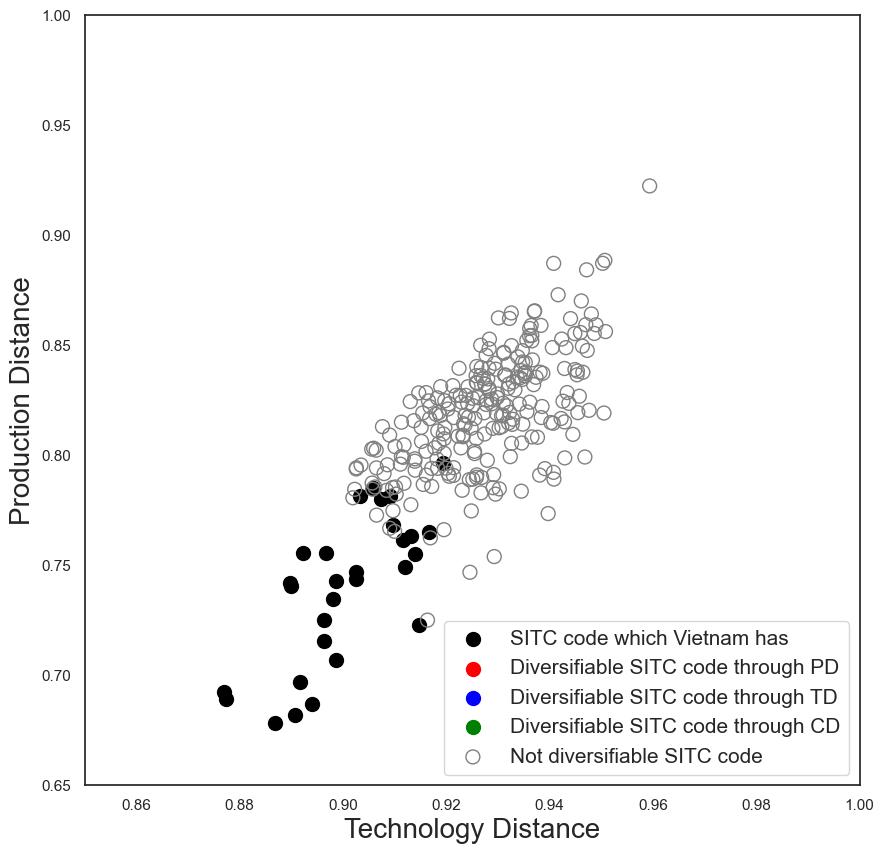

In [ ]:
temp_add_num = 0

temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

temp_VNM_2018=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]

temp_year=temp_VNM_2018.year

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_sitcs=[sitc for sitc in temp_VNM_2018.production_density_dict.keys() if sitc in temp_VNM_2018.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>=0.5]
temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

# 보유하고 있는 것
temp_list=[sitc for sitc in temp_sitcs if temp_VNM_2018.rca_dict[sitc]>1]
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            color='black',
            label="SITC code which Vietnam has"
        )

# production based diversification
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_production_diversification_sitc],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_production_diversification_sitc],
            alpha=1,
            s=100,
            #facecolors='none',
            color='red',
            label="Diversifiable SITC code through PD"
        )

# technology based diversification
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_technology_diversification_sitc],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_technology_diversification_sitc],
            alpha=1,
            s=100,
            #facecolors='none',
            color='blue',
            label='Diversifiable SITC code through TD'
        )

# complex based diversification
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_complex_diversification_sitc],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_complex_diversification_sitc],
            alpha=1,
            s=100,
            #facecolors='none',
            color='green',
            label="Diversifiable SITC code through CD"
        )

# 없는것
temp_list=[sitc for sitc in temp_sitcs if temp_VNM_2018.rca_dict[sitc]<=1]
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            facecolors='none',
            color='grey',
            label="Not diversifiable SITC code"
        )

ax.set_ylabel("Production Distance",fontsize=20)
ax.set_xlabel("Technology Distance",fontsize=20)

temp_title="%s's Production Distance - Coevolutionary Distance from Technology for industry %s"%(str(temp_VNM_2018.name),str(temp_add_num))
#plt.title(temp_title)

ax.legend(fontsize=15,loc='lower right')
ax.set_xlim(0.85,1)
ax.set_ylim(0.65,1)
plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
clear_output()

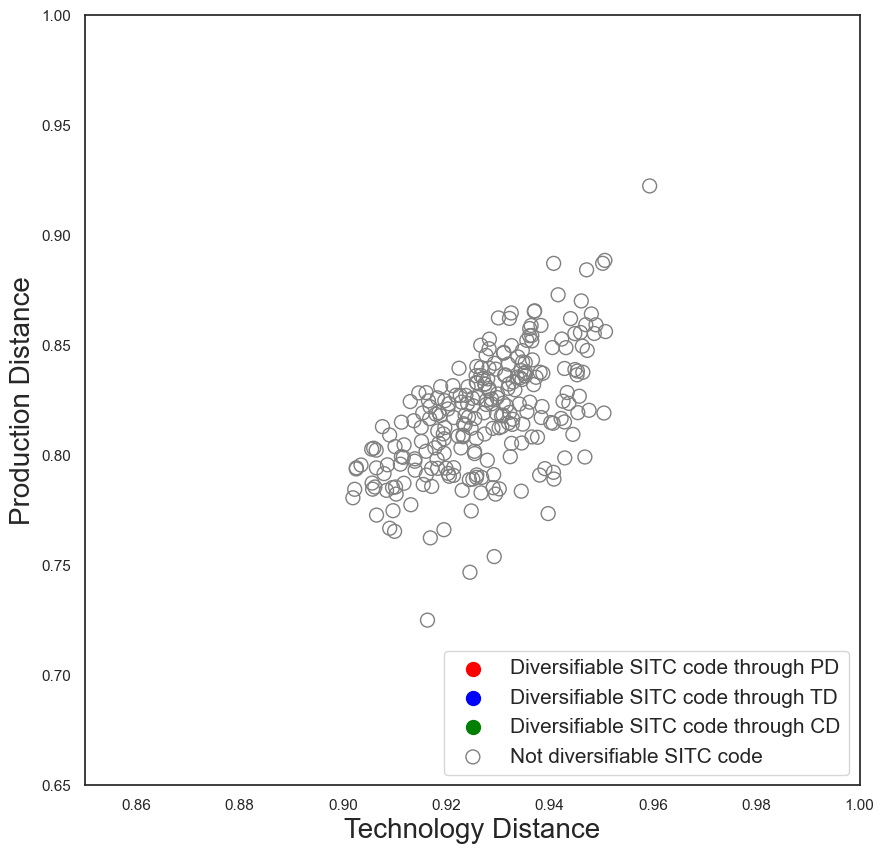

In [ ]:
temp_add_num = 0

temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

temp_VNM_2018=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]

temp_year=temp_VNM_2018.year

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_sitcs=[sitc for sitc in temp_VNM_2018.production_density_dict.keys() if sitc in temp_VNM_2018.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>=0.5]
temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

# production based diversification
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_production_diversification_sitc],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_production_diversification_sitc],
            alpha=1,
            s=100,
            #facecolors='none',
            color='red',
            label="Diversifiable SITC code through PD"
        )

# technology based diversification
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_technology_diversification_sitc],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_technology_diversification_sitc],
            alpha=1,
            s=100,
            #facecolors='none',
            color='blue',
            label='Diversifiable SITC code through TD'
        )

# complex based diversification
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_complex_diversification_sitc],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_complex_diversification_sitc],
            alpha=1,
            s=100,
            #facecolors='none',
            color='green',
            label="Diversifiable SITC code through CD"
        )

# 없는것
temp_list=[sitc for sitc in temp_sitcs if temp_VNM_2018.rca_dict[sitc]<=1]
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            facecolors='none',
            color='grey',
            label="Not diversifiable SITC code"
        )

ax.set_ylabel("Production Distance",fontsize=20)
ax.set_xlabel("Technology Distance",fontsize=20)

temp_title="%s's Production Distance - Coevolutionary Distance from Technology for industry wo black %s"%(str(temp_VNM_2018.name),str(temp_add_num))
#plt.title(temp_title)

ax.legend(fontsize=15,loc='lower right')
ax.set_xlim(0.85,1)
ax.set_ylim(0.65,1)
plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
clear_output()

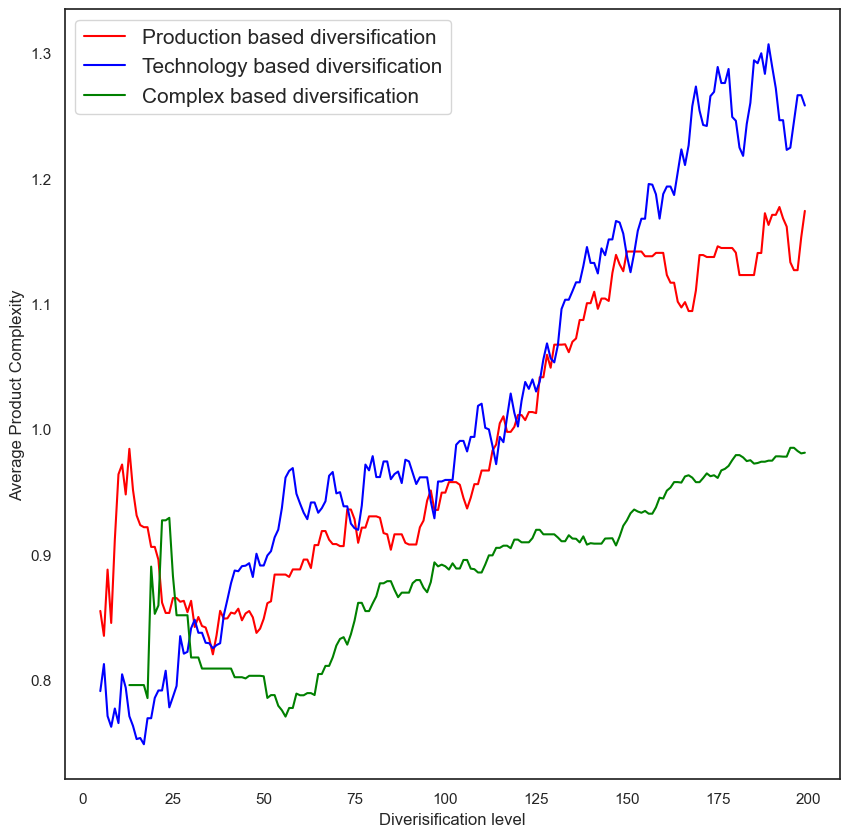

In [ ]:
temp_list1=[]
temp_list2=[]
temp_list3=[]
temp_add_nums=[item for item in range(5,200)]
for temp_add_num in temp_add_nums:
    temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
    temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
    temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
    temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
    temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

    temp_list1.append(np.average([pci_dict[2018][sitc] for sitc in temp_production_diversification_sitc]))
    temp_list2.append(np.average([pci_dict[2018][sitc] for sitc in temp_technology_diversification_sitc]))
    temp_list3.append(np.average([pci_dict[2018][sitc] for sitc in temp_complex_diversification_sitc]))

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
ax.plot(temp_add_nums,temp_list1,label='Production based diversification',color='red')
ax.plot(temp_add_nums,temp_list2,label='Technology based diversification',color='blue')
ax.plot(temp_add_nums,temp_list3,label='Complex based diversification',color='green')

ax.set_xlabel("Diverisification level")
ax.set_ylabel("Average Product Complexity")
ax.legend(fontsize=15)
plt.savefig(output_path+"/Diversifiaction level - complextity.jpg",dpi=300,transparent=True,bbox_inches="tight")

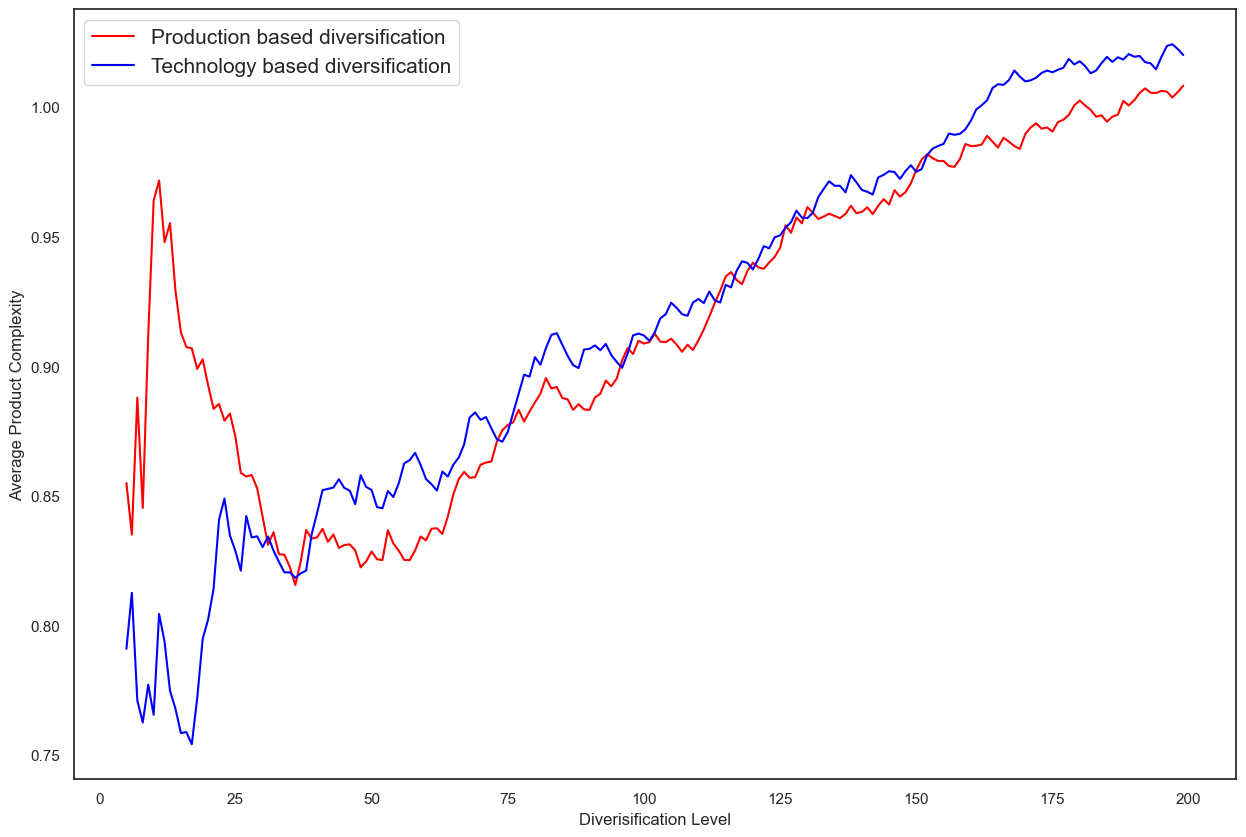

In [ ]:
temp_list1=[]
temp_list2=[]
#temp_list3=[]
temp_add_nums=[item for item in range(5,200)]
for temp_add_num in temp_add_nums:
    temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
    temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
    #temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
    #temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
    #temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

    temp_list1.append(np.average([pci_dict[2018][sitc] for sitc in temp_production_diversification_sitc]))
    temp_list2.append(np.average([pci_dict[2018][sitc] for sitc in temp_technology_diversification_sitc]))
    #temp_list3.append(np.average([pci_dict[2018][sitc] for sitc in temp_complex_diversification_sitc]))

fig=plt.figure(figsize=(15,10))
ax=plt.subplot(111)
ax.plot(temp_add_nums,temp_list1,label='Production based diversification',color='red')
ax.plot(temp_add_nums,temp_list2,label='Technology based diversification',color='blue')
#ax.plot(temp_add_nums,temp_list3,label='Complex based diversification',color='green')

ax.set_xlabel("Diverisification Level")
ax.set_ylabel("Average Product Complexity")
ax.legend(fontsize=15)
plt.savefig(output_path+"/Diversifiaction level - complextity_no complex.jpg",dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
tech_median=np.median([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])
pro_median=np.median([1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_sitcs])

In [ ]:
tech_median, pro_median

(0.9259423662286227, 0.8159729758811082)

In [ ]:
temp_list=[]
for index in range(len(temp_diversification_targets_df)):
    if (temp_diversification_targets_df.loc[index,'production distance']<=pro_median) and (temp_diversification_targets_df.loc[index,'technology distance']<=tech_median):
        temp_list.append("CD")
    elif (temp_diversification_targets_df.loc[index,'production distance']<=pro_median) and (temp_diversification_targets_df.loc[index,'technology distance']>tech_median):
        temp_list.append("PD")
    elif (temp_diversification_targets_df.loc[index,'production distance']>pro_median) and (temp_diversification_targets_df.loc[index,'technology distance']<=tech_median):
        temp_list.append("TD")
    else:
        temp_list.append('UD')

temp_diversification_targets_df['diversification type']=temp_list
temp_diversification_targets_df.to_csv(output_path+'/temp_diversification_targets_df.csv',index=False)


In [ ]:
temp_diversification_targets_df.head()

SITC codes  production distance  technology distance       PCI  \
0       2331             0.852194             0.935613  1.463269   
1       2512             0.858932             0.936452  0.823294   
2       2516             0.835376             0.937389  0.658919   
3       2667             0.790377             0.920613  0.571401   
4       5112             0.817852             0.930708  0.587419   

  diversification type  
0                   UD  
1                   UD  
2                   UD  
3                   CD  
4                   UD

In [ ]:
for temp_type in ['CD',"PD","TD","UD"]:
    temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']==temp_type]
    print(temp_type, np.average(temp_df['PCI']), len(temp_df))

CD 0.8856302857142858 77
PD 0.9560790312499999 32
TD 1.01854721875 32
UD 1.2271795233644858 107


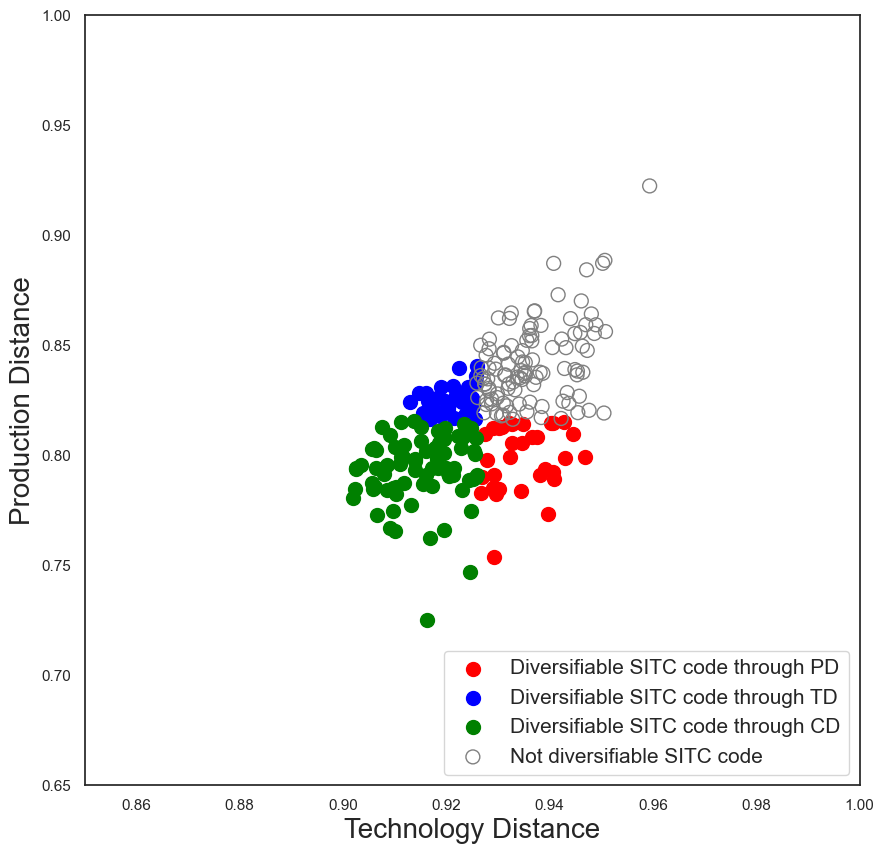

In [ ]:
temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

temp_VNM_2018=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]

temp_year=temp_VNM_2018.year

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_sitcs=[sitc for sitc in temp_VNM_2018.production_density_dict.keys() if sitc in temp_VNM_2018.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>=0.5]
temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

# production based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="PD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='red',
            label="Diversifiable SITC code through PD"
        )

# technology based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="TD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='blue',
            label='Diversifiable SITC code through TD'
        )

# complex based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="CD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='green',
            label="Diversifiable SITC code through CD"
        )

# 없는것
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="UD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            facecolors='none',
            color='grey',
            label="Not diversifiable SITC code"
        )

ax.set_ylabel("Production Distance",fontsize=20)
ax.set_xlabel("Technology Distance",fontsize=20)

temp_title="%s's Production Distance - Coevolutionary Distance from Technology for industry %s"%(str(temp_VNM_2018.name),str("median level"))
#plt.title(temp_title)

ax.legend(fontsize=15,loc='lower right')
ax.set_xlim(0.85,1)
ax.set_ylim(0.65,1)
plt.savefig(output_path+"/%s.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
clear_output()

In [ ]:
temp_scatter_position_dict={}

for sitc in temp_VNM_2018.production_density_dict.keys():
        temp_x= 1-temp_VNM_2018.coevolutionary_density_dict[sitc]
        temp_y= 1-temp_VNM_2018.production_density_dict[sitc]
        temp_scatter_position_dict[sitc]= (temp_x,temp_y)

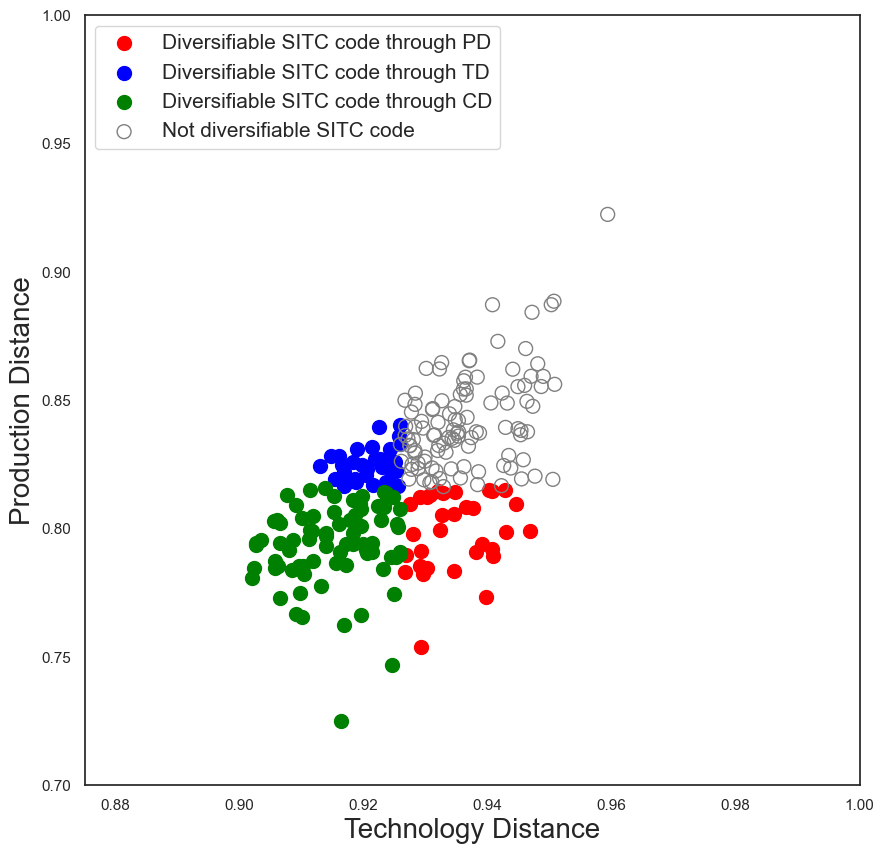

In [ ]:
temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

temp_VNM_2018=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]

temp_year=temp_VNM_2018.year

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_sitcs=[sitc for sitc in temp_VNM_2018.production_density_dict.keys() if sitc in temp_VNM_2018.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>=0.5]
temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

# production based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="PD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='red',
            label="Diversifiable SITC code through PD"
        )

# technology based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="TD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='blue',
            label='Diversifiable SITC code through TD'
        )

# complex based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="CD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='green',
            label="Diversifiable SITC code through CD"
        )

# 없는것
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="UD"]['SITC codes'])
ax.scatter([1-temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_list],
            [1-temp_VNM_2018.production_density_dict[sitc] for sitc in temp_list],
            alpha=1,
            s=100,
            facecolors='none',
            color='grey',
            label="Not diversifiable SITC code"
        )

ax.set_ylabel("Production Distance",fontsize=20)
ax.set_xlabel("Technology Distance",fontsize=20)

temp_title="%s's Production Distance - Coevolutionary Distance from Technology for industry %s"%(str(temp_VNM_2018.name),str("median level"))
#plt.title(temp_title)

ax.legend(fontsize=15,loc='upper left')
ax.set_xlim(0.875,1)
ax.set_ylim(0.7,1)
plt.savefig(output_path+"/%s Large.jpg"%str(temp_title),dpi=300,transparent=True,bbox_inches="tight")
clear_output()

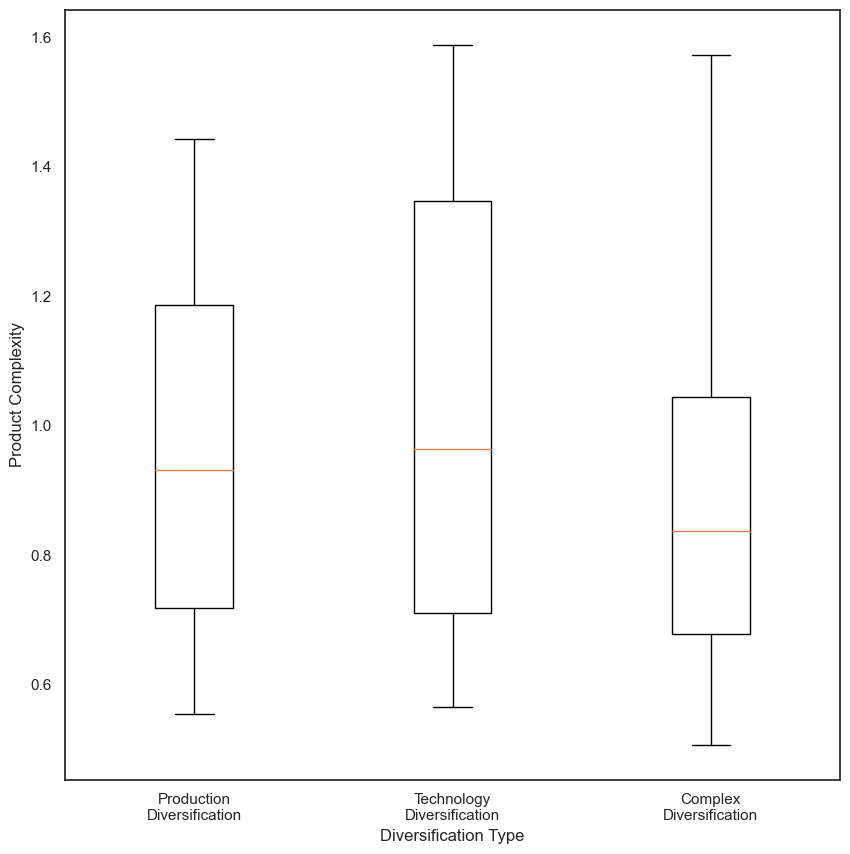

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='PD']
temp_list1=list(temp_df['PCI'])

temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='TD']
temp_list2=list(temp_df["PCI"])

temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='CD']
temp_list3=list(temp_df["PCI"])

ax.boxplot([temp_list1,temp_list2,temp_list3])
ax.set_xlabel('Diversification Type')
ax.set_ylabel("Product Complexity")
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Production\nDiversification','Technology\nDiversification','Complex\nDiversification'])

plt.savefig(output_path+"/Box Plot Diversification type - complexity.jpg",dpi=300,transparent=True,bbox_inches="tight")

Target Technologies selection

In [ ]:
# temp_sim_korea의 rta 갯수만큼 product_based로 확보할 수 있는 ipc code

temp_sim_korea=[country for country in country_list if country.name=='KOR' if country.year==1987][0]
temp_VNM_2018=[country for country in country_list if country.name=='VNM' if country.year==2018][0]

In [ ]:
import math

temp_list1=[]
temp_list2=[]
temp_list3=[]
temp_list4=[]

for ipc in temp_VNM_2018.rta_dict.keys():
    if temp_VNM_2018.rta_dict[ipc]<=1:
        temp_list1.append(ipc)
        temp_list2.append(temp_VNM_2018.rta_dict[ipc])
        temp_list3.append(1-temp_VNM_2018.coevolutionary_density_dict[ipc])
        temp_list4.append(1-temp_VNM_2018.technology_density_dict[ipc])

temp_df=pd.DataFrame()
temp_df['IPC code']=temp_list1
temp_list=[]

for item in temp_list1:
    if item in temp_ipc_dict.keys():
        temp_list.append(temp_ipc_dict[item])
    else:
        temp_list.append(None)
temp_df['Description']=temp_list
temp_df['RTA']=temp_list2
temp_df['coevolutionary distance']=temp_list3
temp_df['technology distance']=temp_list4
temp_df['distance_sum']=[math.sqrt(temp_list3[i]*temp_list3[i]+temp_list4[i]*temp_list4[i]) for i in range(len(temp_list3))]
temp_df['Technology Complexity']=[TCI_dict[2018][x] for x in temp_list1]
temp_df.head()

IPC code                                        Description  RTA  \
0     A61G  TRANSPORT, PERSONAL CONVEYANCES, OR ACCOMMODAT...  0.0   
1     B60P  VEHICLES ADAPTED FOR LOAD TRANSPORTATION OR TO...  0.0   
2     D21D  TREATMENT OF THE MATERIALS BEFORE PASSING TO T...  0.0   
3     G21K  TECHNIQUES FOR HANDLING PARTICLES OR IONISING ...  0.0   
4     G06D           DIGITAL FLUID-PRESSURE COMPUTING DEVICES  0.0   

   coevolutionary distance  technology distance  distance_sum  \
0                 0.830216             0.917437      1.237316   
1                 0.842792             0.937047      1.260299   
2                 0.910584             0.955877      1.320176   
3                 0.861742             0.941001      1.275963   
4                 0.801236             0.958759      1.249479   

   Technology Complexity  
0               0.287568  
1               0.258473  
2              -0.993884  
3               0.152319  
4              -0.169389

In [ ]:
temp_max=max(temp_df['distance_sum'])
temp_min=min(temp_df['distance_sum'])
temp_max, temp_min

(1.345706523566611, 1.1789146074242305)

In [ ]:
temp_df['distance_sum_s']=(temp_df['distance_sum']-temp_min)/(temp_max-temp_min)

In [ ]:
temp_targets_df=temp_df[(temp_df['Technology Complexity']>0.5) & (temp_df['distance_sum_s']<=0.15) & (temp_df['RTA']<=1)]
len(temp_targets_df)

12

In [ ]:
temp_targets_df.sort_values(by='distance_sum').to_csv(output_path+'/Target_tech_for_Vietnam.csv')

베트남 시뮬레이션

In [ ]:
country_list=[]
file_list = os.listdir(class_directory+'/Country_w_density/')
for f in tqdm(file_list):
  with open(class_directory+f'/Country_w_density/%s'%(f), 'rb') as file:
    try:
      country = pickle.load(file)
      country_list.append(country)
    except:
      print(f)
      pass

Product_PM_list=[]
file_list = os.listdir(class_directory+'/Product_PM/')
for f in file_list:
  with open(class_directory+f'/Product_PM/%s'%(f), 'rb') as file:
    try:
      Product_PM = pickle.load(file)
      Product_PM_list.append(Product_PM)
    except:
      print(f)

Technology_PM_list=[]
file_list = os.listdir(class_directory+'/Technology_PM/')
for f in file_list:
  with open(class_directory+f'/Technology_PM/%s'%(f), 'rb') as file:
    try:
      Technology_PM = pickle.load(file)
      Technology_PM_list.append(Technology_PM)
    except:
      print(f)

CO_PM_list=[]
file_list = os.listdir(class_directory+'/CO_PM/')
for f in file_list:
  with open(class_directory+f'/CO_PM/%s'%(f), 'rb') as file:
    try:
      CO_PM = pickle.load(file)
      CO_PM_list.append(CO_PM)
    except:
      print(f)

  2%|▏         | 140/5841 [00:00<00:08, 699.65it/s]

100%|██████████| 5841/5841 [00:07<00:00, 731.98it/s]


In [ ]:
# temp_sim_korea의 rta 갯수만큼 product_based로 확보할 수 있는 ipc code
temp_sim_korea=[country for country in country_list if country.name=='KOR' if country.year==1987][0]
temp_VNM_2018=[country for country in country_list if country.name=='VNM' if country.year==2018][0]

In [ ]:
len([temp_sim_korea.technology_density_dict[ipc] for ipc in temp_sim_korea.rta_dict.keys() if temp_sim_korea.rta_dict[ipc]>1])

70

In [ ]:
temp_value1=([1-temp_sim_korea.technology_density_dict[ipc] for ipc in temp_sim_korea.rta_dict.keys() if temp_sim_korea.rta_dict[ipc]>1])
temp_value2=([1-temp_sim_korea.coevolutionary_density_dict[ipc] for ipc in temp_sim_korea.rta_dict.keys() if temp_sim_korea.rta_dict[ipc]>1])

In [ ]:
temp_mean=np.mean([math.sqrt(temp_value1[i]*temp_value1[i]+temp_value2[i]*temp_value2[i]) for i in range(len(temp_value1))])
temp_max=np.max([math.sqrt(temp_value1[i]*temp_value1[i]+temp_value2[i]*temp_value2[i]) for i in range(len(temp_value1))])

temp_mean, temp_max

(1.1337419355355407, 1.1827425975895973)

여기서 입력

In [ ]:
# temp_sim_korea의 rta 갯수만큼 product_based로 확보할 수 있는 ipc code

temp_sim_korea=[country for country in country_list if country.name=='KOR' if country.year==1987][0]
temp_VNM_2018=[country for country in country_list if country.name=='VNM' if country.year==2018][0]
#temp_tech_add_num=len([ipc for ipc in temp_sim_korea.rta_dict.keys() if temp_sim_korea.rta_dict[ipc]>1])-len([ipc for ipc in temp_VNM_2018.rta_dict.keys() if temp_VNM_2018.rta_dict[ipc]>1])
temp_tech_add_num=12

In [ ]:
len([ipc for ipc in temp_sim_korea.rta_dict.keys() if temp_sim_korea.rta_dict[ipc]>1]),len([ipc for ipc in temp_VNM_2018.rta_dict.keys() if temp_VNM_2018.rta_dict[ipc]>1])

(70, 42)

In [ ]:
import math

temp_list1=[]
temp_list2=[]
temp_list3=[]
temp_list4=[]

for ipc in temp_VNM_2018.rta_dict.keys():
    if temp_VNM_2018.rta_dict[ipc]<=1:
        temp_list1.append(ipc)
        temp_list2.append(temp_VNM_2018.rta_dict[ipc])
        temp_list3.append(1-temp_VNM_2018.coevolutionary_density_dict[ipc])
        temp_list4.append(1-temp_VNM_2018.technology_density_dict[ipc])

temp_df=pd.DataFrame()
temp_df['IPC code']=temp_list1
temp_list=[]

for item in temp_list1:
    if item in temp_ipc_dict.keys():
        temp_list.append(temp_ipc_dict[item])
    else:
        temp_list.append(None)
temp_df['Description']=temp_list
temp_df['RTA']=temp_list2
temp_df['coevolutionary distance']=temp_list3
temp_df['technology distance']=temp_list4
temp_df['distance_sum']=[math.sqrt(temp_list3[i]*temp_list3[i]+temp_list4[i]*temp_list4[i]) for i in range(len(temp_list3))]
temp_df['Technology Complexity']=[TCI_dict[2018][x] for x in temp_list1]
temp_df.head()

IPC code                                        Description  RTA  \
0     A61G  TRANSPORT, PERSONAL CONVEYANCES, OR ACCOMMODAT...  0.0   
1     B60P  VEHICLES ADAPTED FOR LOAD TRANSPORTATION OR TO...  0.0   
2     D21D  TREATMENT OF THE MATERIALS BEFORE PASSING TO T...  0.0   
3     G21K  TECHNIQUES FOR HANDLING PARTICLES OR IONISING ...  0.0   
4     G06D           DIGITAL FLUID-PRESSURE COMPUTING DEVICES  0.0   

   coevolutionary distance  technology distance  distance_sum  \
0                 0.830216             0.917437      1.237316   
1                 0.842792             0.937047      1.260299   
2                 0.910584             0.955877      1.320176   
3                 0.861742             0.941001      1.275963   
4                 0.801236             0.958759      1.249479   

   Technology Complexity  
0               0.287568  
1               0.258473  
2              -0.993884  
3               0.152319  
4              -0.169389

In [ ]:
#temp_df.to_csv(output_path+'/target tech VNM.csv')

In [ ]:
len(temp_df)

590

In [ ]:
temp_df=temp_df[temp_df['Technology Complexity']>=0.5]
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/target tech VNM_complexity_0.5.csv')
temp_df.head()

IPC code                                        Description       RTA  \
0     A61P  SPECIFIC THERAPEUTIC ACTIVITY OF CHEMICAL COMP...  0.000000   
1     A45F  TRAVELLING OR CAMP EQUIPMENT; SACKS OR PACKS C...  0.000000   
2     G06Q  INFORMATION AND COMMUNICATION TECHNOLOGY [ICT]...  0.771076   
3     C12P  FERMENTATION OR ENZYME-USING PROCESSES TO SYNT...  0.000000   
4     F21V  FUNCTIONAL FEATURES OR DETAILS OF LIGHTING DEV...  0.000000   

   coevolutionary distance  technology distance  distance_sum  \
0                 0.808529             0.911552      1.218460   
1                 0.818107             0.922957      1.233349   
2                 0.782574             0.899971      1.192631   
3                 0.796642             0.906499      1.206805   
4                 0.798135             0.921546      1.219125   

   Technology Complexity  
0               0.689012  
1               0.658815  
2               2.750235  
3               1.564437  
4               0.533225

In [ ]:
len(temp_df)

98

In [ ]:
temp_df.sort_values(by=['coevolutionary distance']).head(temp_tech_add_num).to_csv(output_path+'/target tech sorted by coevol distance_VNM.csv')

In [ ]:
temp_df.sort_values(by=['technology distance']).head(temp_tech_add_num).to_csv(output_path+'/target tech sorted by tech distance_VNM.csv')

In [ ]:
temp_df.sort_values(by=['Technology Complexity']).head(temp_tech_add_num).to_csv(output_path+'/target tech sorted by tech complexity_VNM.csv')

In [ ]:
temp_df.sort_values(by=['distance_sum']).head(temp_tech_add_num)

IPC code                                        Description       RTA  \
62     H04W  WIRELESS COMMUNICATION NETWORKS (broadcast com...  0.635805   
36     H04L  TRANSMISSION OF DIGITAL INFORMATION, e.g. TELE...  0.611096   
80     H02J  CIRCUIT ARRANGEMENTS OR SYSTEMS FOR SUPPLYING ...  0.767314   
2      G06Q  INFORMATION AND COMMUNICATION TECHNOLOGY [ICT]...  0.771076   
90     A61K  PREPARATIONS FOR MEDICAL, DENTAL OR TOILETRY P...  0.000000   
85     H05K  PRINTED CIRCUITS; CASINGS OR CONSTRUCTIONAL DE...  0.291047   
14     H04N           PICTORIAL COMMUNICATION, e.g. TELEVISION  0.745691   
6      H01L  SEMICONDUCTOR DEVICES NOT COVERED BY CLASS H10...  0.000000   
67     C07D  HETEROCYCLIC COMPOUNDS (macromolecular compoun...  0.000000   
63     C09K  MATERIALS FOR APPLICATIONS NOT OTHERWISE PROVI...  0.000000   
57     G09B  EDUCATIONAL OR DEMONSTRATION APPLIANCES; APPLI...  0.000000   
26     E21B  EARTH OR ROCK DRILLING (mining, quarrying E21C...  0.000000   

    coevolutionary distance  technology distance  distance_sum  \
62                 0.772526             0.896458      1.183399   
36                 0.781439             0.897975      1.190381   
80                 0.764359             0.913704      1.191260   
2                  0.782574             0.899971      1.192631   
90                 0.785199             0.903043      1.196672   
85                 0.770885             0.916947      1.197938   
14                 0.778298             0.913106      1.199796   
6                  0.774492             0.919822      1.202460   
67                 0.788679             0.907882      1.202607   
63                 0.778109             0.917388      1.202935   
57                 0.796155             0.902250      1.203295   
26                 0.779807             0.917045      1.203774   

    Technology Complexity  
62               2.097068  
36               2.097473  
80               1.194574  
2                2.750235  
90               1.675089  
85               0.534962  
14               1.938637  
6                0.669296  
67               1.468352  
63               0.965906  
57               1.267665  
26               1.532337

In [ ]:
temp_df.sort_values(by=['distance_sum']).head(temp_tech_add_num).to_csv(output_path+'/target tech sorted by sum distance_VNM.csv')

In [ ]:
temp_list=list(temp_df.sort_values(by=['distance_sum']).head(temp_tech_add_num)['IPC code'])
len(temp_list)

12

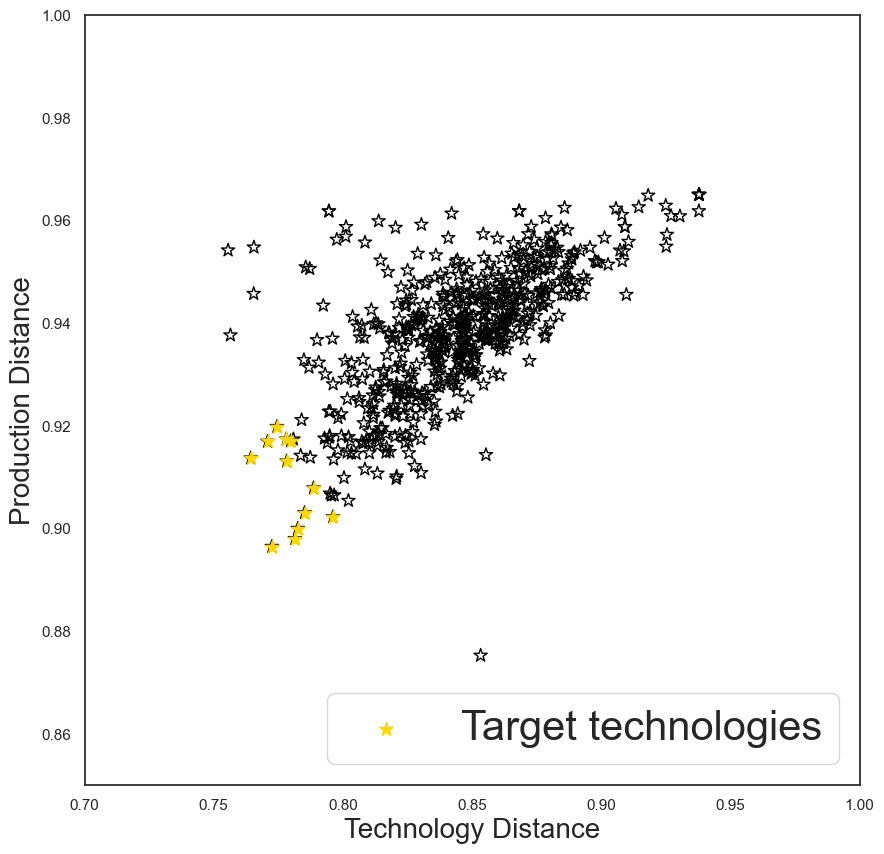

In [ ]:
temp_VNM_2018=[country for country in country_list if country.name=='VNM' if country.year==2018][0]

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_ipcs=[ipc for ipc in temp_VNM_2018.rta_dict.keys() if temp_VNM_2018.rta_dict[ipc]<=1]
len(temp_ipcs)

ax.scatter(
    [1-temp_VNM_2018.coevolutionary_density_dict[ipc] for ipc in temp_ipcs],
    [1-temp_VNM_2018.technology_density_dict[ipc] for ipc in temp_ipcs],
    alpha=1,
    s=100,
    facecolors='none',
    color='black',
    marker='*',
    #label='Technologies which RTA \u2264 1'
)

ax.scatter(
    [1-temp_VNM_2018.coevolutionary_density_dict[ipc] for ipc in temp_list],
    [1-temp_VNM_2018.technology_density_dict[ipc] for ipc in temp_list],
    alpha=1,
    s=100,
    color='Gold',
    marker='*',
    label='Target technologies'
)

ax.set_ylabel("Production Distance",fontsize=20)
ax.set_xlabel("Technology Distance",fontsize=20)

ax.legend(fontsize=30,loc='lower right')
ax.set_xlim(0.7,1)
ax.set_ylim(0.85,1)
plt.savefig(output_path+"/Target Tech %s.jpg"%str(temp_tech_add_num),dpi=300,transparent=True,bbox_inches="tight")
clear_output()


In [ ]:
temp_df=pd.DataFrame()
temp_list_1=[]
temp_list_2=[]
for item in [x for x in temp_list]:
    try:
        temp_list_2.append(temp_ipc_dict[item])
        temp_list_1.append(item)
    except:
        pass

temp_df["IPC"]=temp_list_1
temp_df["Description"]=temp_list_2
temp_df["Complexity"]=[TCI_dict[temp_year][x] for x in temp_list_1]
temp_df=temp_df.sort_values('IPC',ascending=True)
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/temp_df_VNM_2018.csv')
len(temp_df)

12

In [ ]:
temp_df=temp_df.sort_values('Complexity',ascending=False)
temp_df.reset_index(inplace=True,drop=True)
temp_df.to_csv(output_path+'/temp_df_VNM_2018_complexity_order.csv')
temp_df.head()

IPC                                        Description  Complexity
0  G06Q  INFORMATION AND COMMUNICATION TECHNOLOGY [ICT]...    2.750235
1  H04L  TRANSMISSION OF DIGITAL INFORMATION, e.g. TELE...    2.097473
2  H04W  WIRELESS COMMUNICATION NETWORKS (broadcast com...    2.097068
3  H04N           PICTORIAL COMMUNICATION, e.g. TELEVISION    1.938637
4  A61K  PREPARATIONS FOR MEDICAL, DENTAL OR TOILETRY P...    1.675089

In [ ]:
temp_country=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]
len([item for item in temp_country.rta_dict.keys() if temp_country.rta_dict[item]>1])

42

In [ ]:
for ipc in list(temp_df['IPC']):
  temp_VNM_2018.rta_dict[ipc]=1.01

In [ ]:
len([x for x in temp_VNM_2018.rta_dict.keys() if temp_VNM_2018.rta_dict[x]>1])

54

In [ ]:
temp_year=temp_VNM_2018.year
index=year_list.index(temp_year)

temp_Product_PM=[item for item in Product_PM_list if item.year==temp_year][0]
temp_Technology_PM=[item for item in Technology_PM_list if item.year==temp_year][0]
temp_CO_PM=[item for item in CO_PM_list if item.year==temp_year][0]

temp_countries=[temp_country for temp_country in country_list if temp_country.year==temp_year]
temp_countries=sorted(temp_countries,key=lambda item:item.name)
M=np.zeros(shape=(len(temp_countries),len(temp_Technology_PM.df.index)))
for i in range(len(temp_countries)):
    for j in range(len(list(temp_Technology_PM.df.index))):
        if temp_countries[i].rta_dict[list(temp_Technology_PM.df.index)[j]]>1:
            M[i][j]=1

M=pd.DataFrame(M,index=[temp_country.name for temp_country in temp_countries],columns=list(temp_Technology_PM.df.index))

In [ ]:
for j in temp_VNM_2018.rta_dict.keys():
    if temp_VNM_2018.rta_dict[j]>1:
        M.loc['VNM',j]=1

In [ ]:
np.average(list(temp_VNM_2018.technology_density_dict.values()))

0.06132621934374646

In [ ]:
for temp_ipc in temp_VNM_2018.rta_dict.keys():
    if np.sum(temp_Technology_PM_df.loc[temp_ipc])==0:
        temp_VNM_2018.technology_density_dict[temp_ipc]=0
    else:
        temp_VNM_2018.technology_density_dict[temp_ipc]=np.sum(M.loc[temp_VNM_2018.name]*temp_Technology_PM_df.loc[temp_ipc])/np.sum(temp_Technology_PM_df.loc[temp_ipc])

In [ ]:
np.average(list(temp_VNM_2018.technology_density_dict.values()))

0.07491901641386395

In [ ]:
np.average(list(temp_VNM_2018.coevolutionary_density_dict.values()))

0.11715257426318172

In [ ]:
index=year_list.index(temp_year)

temp_df=CO_PM_list[index].df
temp_df=temp_df.fillna(0)

# Technology --> Production
for temp_sitc in temp_VNM_2018.coevolutionary_density_dict.keys():
    if temp_sitc in temp_VNM_2018.rca_dict.keys():
        nominator=np.sum(temp_df.loc[temp_sitc][[ipc for ipc in temp_VNM_2018.rta_dict.keys() if temp_VNM_2018.rta_dict[ipc]>1]])
        denominator=np.sum(temp_df.loc[temp_sitc])
        if denominator==0:
            temp_VNM_2018.coevolutionary_density_dict[temp_sitc]=0
        else:
            temp_VNM_2018.coevolutionary_density_dict[temp_sitc]=nominator/denominator

# Production --> Technology
for temp_ipc in temp_VNM_2018.coevolutionary_density_dict.keys():
    if temp_ipc in temp_VNM_2018.rta_dict.keys():
        nominator=np.sum(temp_df.loc[[sitc for sitc in temp_VNM_2018.rca_dict.keys() if temp_VNM_2018.rca_dict[sitc]>1]][temp_ipc])
        denominator=np.sum(temp_df[temp_ipc])
        if denominator==0:
            temp_VNM_2018.coevolutionary_density_dict[temp_ipc]=0
        else:
            temp_VNM_2018.coevolutionary_density_dict[temp_ipc]=nominator/denominator

In [ ]:
np.average(list(temp_VNM_2018.coevolutionary_density_dict.values()))

0.12316484662416326

In [ ]:
temp_country = temp_VNM_2018

In [ ]:
#temp_country=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]
len([item for item in temp_country.rta_dict.keys() if temp_country.rta_dict[item]>1])

54

In [ ]:
pro_median, tech_median

(0.8159729758811082, 0.9259423662286227)

In [ ]:
1-tech_median

0.07405763377137731

In [ ]:
temp_add=np.median([temp_VNM_2018.coevolutionary_density_dict[sitc] for sitc in temp_sitcs])-(1-tech_median)

In [ ]:
temp_diversification_targets_df=pd.read_csv(output_path+'/temp_diversification_targets_df.csv')

In [ ]:
temp_list=[]
for index in range(len(temp_diversification_targets_df)):

    if (temp_diversification_targets_df.loc[index,'production distance']<=pro_median) and (temp_diversification_targets_df.loc[index,'technology distance']-temp_add<=(tech_median)):
        temp_list.append("CD")
    elif (temp_diversification_targets_df.loc[index,'production distance']<=pro_median) and (temp_diversification_targets_df.loc[index,'technology distance']-temp_add>(tech_median)):
        temp_list.append("PD")
    elif (temp_diversification_targets_df.loc[index,'production distance']>pro_median) and (temp_diversification_targets_df.loc[index,'technology distance']-temp_add<=(tech_median)):
        temp_list.append("TD")
    else:
        temp_list.append('UD')

temp_diversification_targets_df['diversification type']=temp_list
temp_diversification_targets_df.to_csv(output_path+'/temp_diversification_targets_df_simulation %s.csv'%str(temp_tech_add_num),index=False)

In [ ]:
temp_diversification_targets_df

SITC codes  production distance  technology distance       PCI  \
0          2331             0.852194             0.935613  1.463269   
1          2512             0.858932             0.936452  0.823294   
2          2516             0.835376             0.937389  0.658919   
3          2667             0.790377             0.920613  0.571401   
4          5112             0.817852             0.930708  0.587419   
..          ...                  ...                  ...       ...   
243        8981             0.792178             0.940770  0.606527   
244        8983             0.810992             0.918376  1.026986   
245        8989             0.789073             0.925163  0.986148   
246        8996             0.862366             0.930113  1.123213   
247        8998             0.746749             0.924601  0.648351   

    diversification type  
0                     TD  
1                     TD  
2                     TD  
3                     CD  
4                     TD  
..                   ...  
243                   CD  
244                   CD  
245                   CD  
246                   TD  
247                   CD  

[248 rows x 5 columns]

In [ ]:
temp_diversification_targets_df['SITC codes']=temp_diversification_targets_df['SITC codes'].astype(str)

In [ ]:
for temp_type in ['CD',"PD","TD","UD"]:
    temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']==temp_type]
    print(temp_type, np.average(temp_df['PCI']), len(temp_df))

CD 0.908221287037037 108
PD 0.700162 1
TD 1.1545649838709677 124
UD 1.3823774666666668 15


In [ ]:
len(temp_complex_diversification_sitc)

171

In [ ]:
temp_complex_diversification_sitc=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='CD']['SITC codes'])

In [ ]:
len(temp_complex_diversification_sitc)

108

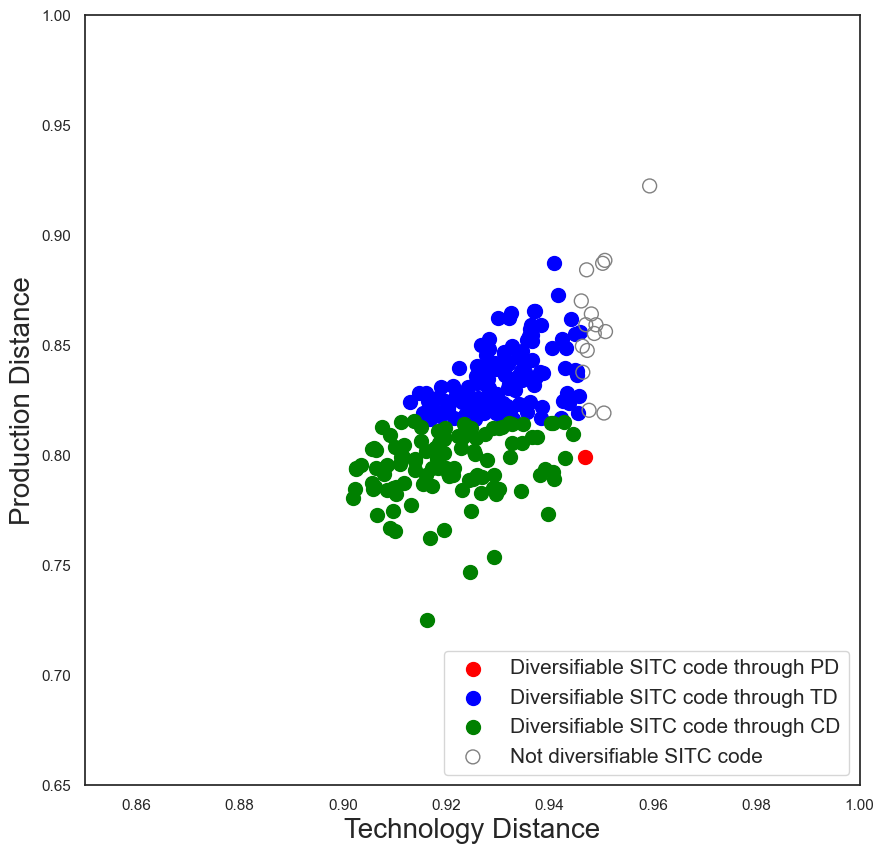

In [ ]:
temp_production_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['production distance']).head(temp_add_num)['SITC codes'])
temp_technology_diversification_sitc=list(temp_diversification_targets_df.sort_values(by=['technology distance']).head(temp_add_num)['SITC codes'])
temp_complex_diversification_sitc=list(set(temp_production_diversification_sitc).intersection(set(temp_technology_diversification_sitc)))
temp_production_diversification_sitc=list(set(temp_production_diversification_sitc).difference(set(temp_complex_diversification_sitc)))
temp_technology_diversification_sitc=list(set(temp_technology_diversification_sitc).difference(set(temp_complex_diversification_sitc)))

#temp_VNM_2018=[country for country in country_list if country.name=="VNM" if country.year in [2018]][0]

#temp_year=temp_VNM_2018.year

fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

#temp_sitcs=[sitc for sitc in temp_VNM_2018.production_density_dict.keys() if sitc in temp_VNM_2018.coevolutionary_density_dict.keys() if sitc in pci_dict[temp_year].keys() if pci_dict[temp_year][sitc]!='nan' if pci_dict[temp_year][sitc]>=0.5]
#temp_max=max([pci_dict[temp_year][sitc] for sitc in temp_sitcs])
#temp_min=min([pci_dict[temp_year][sitc] for sitc in temp_sitcs])

# production based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="PD"]['SITC codes'])
ax.scatter([temp_scatter_position_dict[sitc][0] for sitc in temp_list],
            [temp_scatter_position_dict[sitc][1] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='red',
            label="Diversifiable SITC code through PD"
        )

# technology based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="TD"]['SITC codes'])
ax.scatter([temp_scatter_position_dict[sitc][0] for sitc in temp_list],
            [temp_scatter_position_dict[sitc][1] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='blue',
            label='Diversifiable SITC code through TD'
        )

# complex based diversification
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="CD"]['SITC codes'])
ax.scatter([temp_scatter_position_dict[sitc][0] for sitc in temp_list],
            [temp_scatter_position_dict[sitc][1] for sitc in temp_list],
            alpha=1,
            s=100,
            #facecolors='none',
            color='green',
            label="Diversifiable SITC code through CD"
        )

# 없는것
temp_list=list(temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=="UD"]['SITC codes'])
ax.scatter([temp_scatter_position_dict[sitc][0] for sitc in temp_list],
            [temp_scatter_position_dict[sitc][1] for sitc in temp_list],
            alpha=1,
            s=100,
            facecolors='none',
            color='grey',
            label="Not diversifiable SITC code"
        )

ax.set_ylabel("Production Distance",fontsize=20)
ax.set_xlabel("Technology Distance",fontsize=20)

temp_title="VNMs's Production Distance - Coevolutionary Distance from Technology for industry %s tech num %s"%(str(temp_tech_add_num),str("median level"))
#plt.title(temp_title)

ax.legend(fontsize=15,loc='lower right')
ax.set_xlim(0.85,1)
ax.set_ylim(0.65,1)
plt.savefig(output_path+"/%s %s simulation.jpg"%(str(temp_title),str(temp_tech_add_num)),dpi=300,transparent=True,bbox_inches="tight")
clear_output()

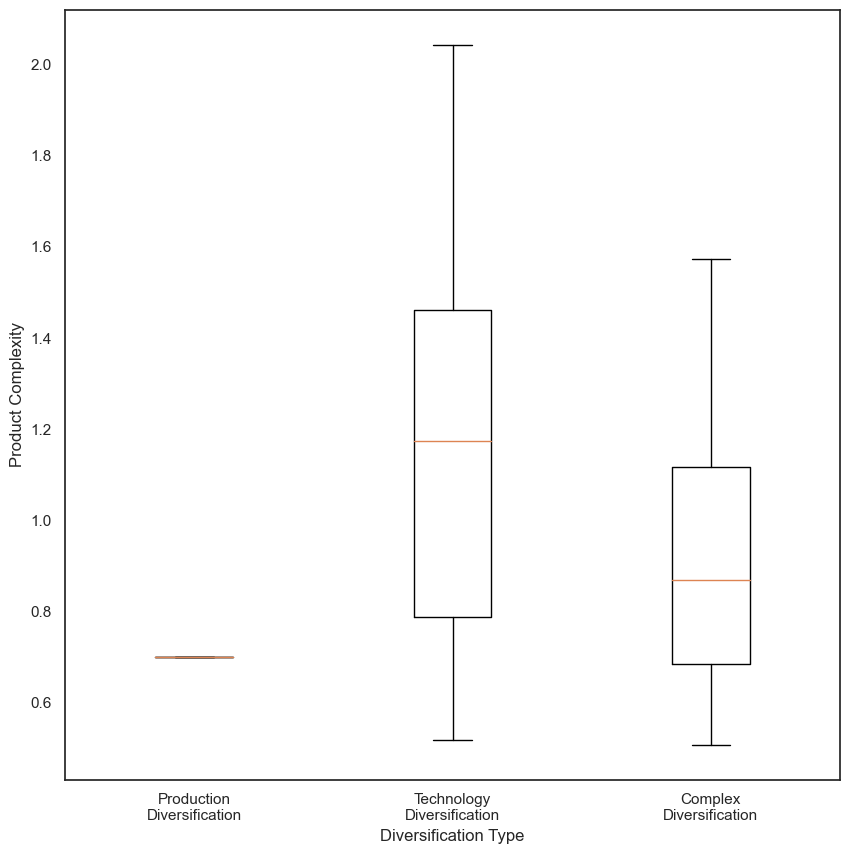

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=plt.subplot(111)

temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='PD']
temp_list1=list(temp_df['PCI'])

temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='TD']
temp_list2=list(temp_df["PCI"])

temp_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']=='CD']
temp_list3=list(temp_df["PCI"])

ax.boxplot([temp_list1,temp_list2,temp_list3])
ax.set_xlabel('Diversification Type')
ax.set_ylabel("Product Complexity")
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Production\nDiversification','Technology\nDiversification','Complex\nDiversification'])

plt.savefig(output_path+"/Box Plot Diversification type - complexity %s .jpg"%str(temp_tech_add_num),dpi=300,transparent=True,bbox_inches="tight")

In [ ]:
정다운

NameError: name '정다운' is not defined

### 베트남 포텐셜

In [ ]:
temp_diversification_targets_df=pd.read_csv(output_path+'/temp_diversification_targets_df.csv')
temp_diversification_targets_df1=pd.read_csv(output_path+'/temp_diversification_targets_df_simulation 1.csv')
temp_diversification_targets_df2=pd.read_csv(output_path+'/temp_diversification_targets_df_simulation 3.csv')
temp_diversification_targets_df3=pd.read_csv(output_path+'/temp_diversification_targets_df_simulation 5.csv')
temp_diversification_targets_df4=pd.read_csv(output_path+'/temp_diversification_targets_df_simulation 8.csv')
temp_diversification_targets_df5=pd.read_csv(output_path+'/temp_diversification_targets_df_simulation 10.csv')
temp_diversification_targets_df6=pd.read_csv(output_path+'/temp_diversification_targets_df_simulation 12.csv')

In [ ]:
temp_present_df=temp_diversification_targets_df[temp_diversification_targets_df['diversification type']!="UD"]
temp_potential_df1=temp_diversification_targets_df1[temp_diversification_targets_df1['diversification type']!="UD"]
temp_potential_df2=temp_diversification_targets_df2[temp_diversification_targets_df2['diversification type']!="UD"]
temp_potential_df3=temp_diversification_targets_df3[temp_diversification_targets_df3['diversification type']!="UD"]
temp_potential_df4=temp_diversification_targets_df4[temp_diversification_targets_df4['diversification type']!="UD"]
temp_potential_df5=temp_diversification_targets_df5[temp_diversification_targets_df5['diversification type']!="UD"]
temp_potential_df6=temp_diversification_targets_df6[temp_diversification_targets_df6['diversification type']!="UD"]

len(temp_present_df), len(temp_potential_df1), len(temp_potential_df2), len(temp_potential_df3), len(temp_potential_df4), len(temp_potential_df5), len(temp_potential_df6)

(141, 161, 180, 193, 213, 222, 233)

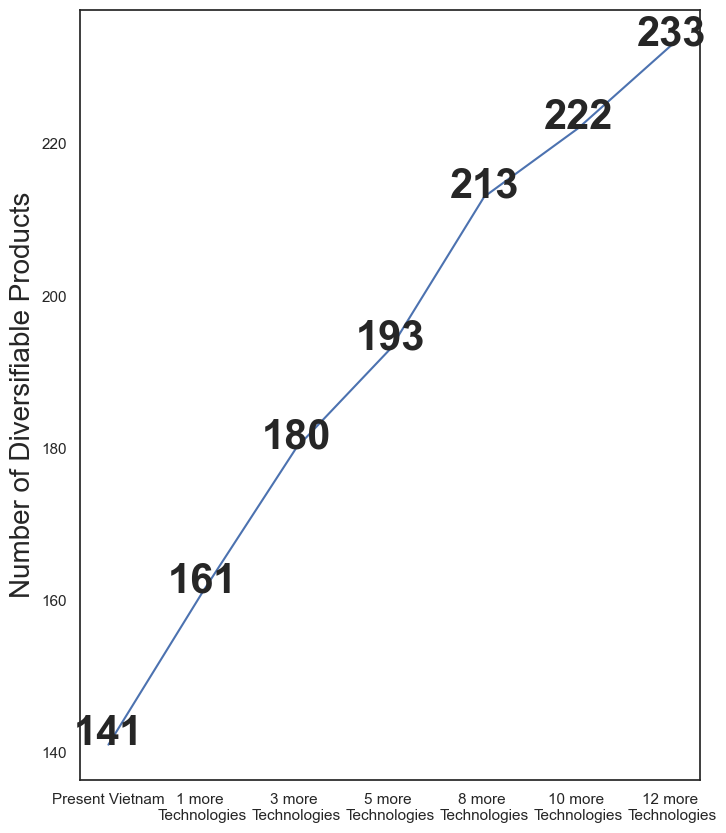

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = plt.subplot(111)

temp_list=[len(temp_present_df), len(temp_potential_df1), len(temp_potential_df2), len(temp_potential_df3),len(temp_potential_df4),len(temp_potential_df5),len(temp_potential_df6)]

ax.plot([i for i in range(len(temp_list))],temp_list)

ax.set_ylabel("Number of Diversifiable Products",fontsize=20)
#Potential diversification target products \n
ax.set_xticks([i for i in range(len(temp_list))])
ax.set_xticklabels(['Present Vietnam',
                    '1 more \nTechnologies',
                    '3 more \nTechnologies',
                    '5 more \nTechnologies',
                    '8 more \nTechnologies',
                    '10 more \nTechnologies',
                    '12 more \nTechnologies'
                    ],
                    #'28 more \nTechnologies'],
                    rotation=00)
for i, item in enumerate(temp_list):
  ax.text(i,item,str(int(temp_list[i])),ha='center',fontsize=30,fontweight="bold",rotation=0)

temp_title="Number of Diversifiable Products"
plt.savefig(output_path+"/"+temp_title+".jpg",transparent=True,bbox_inches="tight",dpi=600)

In [ ]:
temp_present_diversification_list=list(temp_present_df['SITC codes'])
temp_potential_diversification_list1=list(temp_potential_df1['SITC codes'])
temp_potential_diversification_list2=list(temp_potential_df2['SITC codes'])
temp_potential_diversification_list3=list(temp_potential_df3['SITC codes'])
temp_potential_diversification_list4=list(temp_potential_df4['SITC codes'])
temp_potential_diversification_list5=list(temp_potential_df5['SITC codes'])
temp_potential_diversification_list6=list(temp_potential_df6['SITC codes'])
#temp_potential_diversification_list32=list(temp_potential_df32['SITC codes'])

In [ ]:
# Change of Distribution

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

temp_list=[]
temp_list.append([pci_dict[2018][str(item)] for item in temp_present_diversification_list])
temp_list.append([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list1)])
temp_list.append([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list2)])
temp_list.append([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list3)])
temp_list.append([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list4)])
temp_list.append([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list5)])
ax.boxplot(temp_list)

ax.set_ylabel("Product Complexity",fontsize=20)
#Potential diversification target products \n
ax.set_xticklabels(['Present Vietnam',
                    '1 more \nTechnologies',
                    '5 more \nTechnologies',
                    '10 more \nTechnologies',
                    '15 more \nTechnologies',
                    '20 more \nTechnologies'])
temp_title="Boxplot of Complexity"
plt.savefig(output_path+"/"+temp_title+".jpg",transparent=True,bbox_inches="tight",dpi=600)

In [ ]:
# Change of Distribution
"""
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

temp_list=[]
temp_list.append([pci_dict[2018][str(item)] for item in temp_present_diversification_list])
#temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list5).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list10).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list15).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list20).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list25).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list32).difference(set(temp_present_diversification_list)))])

ax.boxplot(temp_list)

ax.set_ylabel("Product Complexity",fontsize=20)
#Potential diversification target products \n
ax.set_xticklabels(['Present Vietnam',
                    '5 more \nTechnologies',
                    '10 more \nTechnologies',
                    '15 more \nTechnologies',
                    '20 more \nTechnologies',
                    '25 more \nTechnologies',
                    '32 more \nTechnologies'])
temp_title="Boxplot of Complexity"
plt.savefig(output_path+"/"+temp_title+" 2.jpg",transparent=True,bbox_inches="tight",dpi=600)
"""

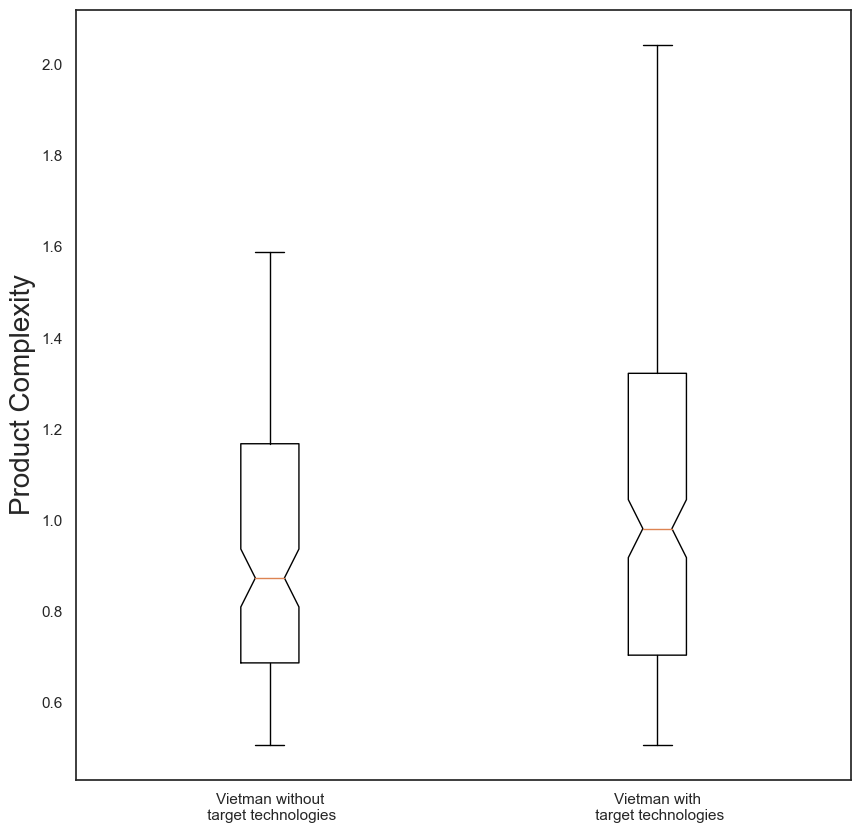

In [ ]:
# Change of Distribution

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

temp_list=[]
temp_list.append([pci_dict[2018][str(item)] for item in temp_present_diversification_list])
#temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list14).difference(set(temp_present_diversification_list)))])
temp_list.append([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list6))])

ax.boxplot(temp_list,notch=True)

ax.set_ylabel("Product Complexity",fontsize=20)
#Potential diversification target products \n
ax.set_xticklabels(['Vietman without\n target technologies',
                    'Vietman with\n target technologies'])
temp_title="Boxplot of Complexity"
plt.savefig(output_path+"/"+temp_title+" 3.jpg",transparent=True,bbox_inches="tight",dpi=600)

In [ ]:
# Change of Distribution

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

sns.kdeplot([pci_dict[2018][str(item)] for item in temp_present_diversification_list],color='red',label='Present Vietnam',bw_adjust=3)
#sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list).difference(set(temp_present_diversification_list)))],label='Potential diversification target products with Technology',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list5)],label='5 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list10)],label='10 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list15)],label='15 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list20)],label='20 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list25)],label='25 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(temp_potential_diversification_list32)],label='32 more Technologies',bw_adjust=3)

ax.legend(loc='upper right')
ax.set_xlabel("Product Complexity",fontsize=20)
temp_title="Probability Density (KDE) of Complexity"
plt.savefig(output_path+"/"+temp_title+".jpg",transparent=True,bbox_inches="tight",dpi=600)

In [ ]:
# Change of Distribution

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

sns.kdeplot([pci_dict[2018][str(item)] for item in temp_present_diversification_list],color='red',label='Present Vietnam',bw_adjust=3)
#sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list).difference(set(temp_present_diversification_list)))],label='Potential diversification target products with Technology',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list5).difference(temp_present_diversification_list))],label='5 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list10).difference(temp_present_diversification_list))],label='10 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list15).difference(temp_present_diversification_list))],label='15 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list20).difference(temp_present_diversification_list))],label='20 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list25).difference(temp_present_diversification_list))],label='25 more Technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list32).difference(temp_present_diversification_list))],label='32 more Technologies',bw_adjust=3)

ax.legend(loc='upper right')
ax.set_xlabel("Product Complexity",fontsize=20)
temp_title="Probability Density (KDE) of Complexity"
plt.savefig(output_path+"/"+temp_title+" 2.jpg",transparent=True,bbox_inches="tight",dpi=600)

In [ ]:
# Change of Distribution

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

sns.kdeplot([pci_dict[2018][str(item)] for item in temp_present_diversification_list],color='red',label='Vietman without target technologies',bw_adjust=3)
sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list32))],label='32 more Technologies',bw_adjust=3)
#sns.kdeplot([pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list28).difference(temp_present_diversification_list))],label='Vietman with target technologies',bw_adjust=3)


ax.legend(loc='upper right')
ax.set_xlabel("Product Complexity",fontsize=20)
temp_title="Probability Density (KDE) of Complexity"
plt.savefig(output_path+"/"+temp_title+" 3.jpg",transparent=True,bbox_inches="tight",dpi=600)

In [ ]:
temp_present_df=pd.DataFrame()
temp_present_df['sitc code']=temp_present_diversification_list
temp_present_df['product name']=[temp_sitc_name_dict[int(item)] for item in temp_present_diversification_list]
temp_present_df['pci']=[pci_dict[2018][str(item)] for item in temp_present_diversification_list]
temp_present_df=temp_present_df.sort_values(by=['pci'],ascending=False)
temp_present_df.reset_index(inplace=True,drop=True)
temp_present_df.to_csv(output_path+'/VNM present diversification.csv')

In [ ]:
temp_new_df=pd.DataFrame()
temp_new_df['sitc code']=list(set(temp_potential_diversification_list6).difference(set(temp_present_diversification_list)))
temp_new_df['product name']=[temp_sitc_name_dict[int(item)] for item in list(set(temp_potential_diversification_list6).difference(set(temp_present_diversification_list)))]
temp_new_df['pci']=[pci_dict[2018][str(item)] for item in list(set(temp_potential_diversification_list6).difference(set(temp_present_diversification_list)))]
temp_new_df=temp_new_df.sort_values(by=['pci'],ascending=False)
temp_new_df.reset_index(inplace=True,drop=True)
temp_new_df.to_csv(output_path+'/VNM new diversification.csv')

In [ ]:
len(temp_present_df), len(temp_new_df)

(141, 92)

In [ ]:
temp_list=[]
for item in list(set(temp_potential_diversification_list6).difference(set(temp_present_diversification_list))):
    temp_list.append(pci_dict[2018][str(item)])

np.median(temp_list)

1.2063605000000002

In [ ]:
temp_list=[]
for item in list(set(temp_potential_diversification_list6).union(set(temp_present_diversification_list))):
    temp_list.append(pci_dict[2018][str(item)])

np.median(temp_list)

0.980915

In [ ]:
len(temp_list)

92

In [ ]:
temp_list=[]
for item in list(set(temp_present_diversification_list)):
    temp_list.append(pci_dict[2018][str(item)])

np.median(temp_list)

0.872606

In [ ]:
temp_list=[]
for item in list(temp_present_diversification_list):
    temp_list.append(pci_dict[2018][str(item)])

np.average(temp_list)